# Аналитика авторынка Казахстана.   Выполнил: Колыванова С.В.
   
   

## Цели и задачи проекта

В датасете **kz_2019_final_all_dirt.csv** представлены данные о продажах автомобилей на территории Казахстана в январе-сентябре 2019 года всеми официальными автодилерами, которые собрала статистическая компания-агрегатор.
Данные содержат ошибки и в текущем виде не пригодны для анализа.
Задача – очистить данные до состояния, когда их можно
анализировать и провести исследовательский анализ данных.
Провести анализ рынка автомобилей Казахстана.Проанализироавть продажи дилера **Меркур-авто** и подготовить выводы и рекомендации.(По информации от заказчика:доход дилера от Порше и Ауди 3% с машины, Вольксваген - 5%)

## Описание данных

`Год` – год продажи (2019)

`Месяц` – месяц продажи (январь - сентябрь)

`Компания` – название автоцентра

`Бренд` – название продаваемой марки автомобиля

`Модель` – название модели автомобиля

`Модификация` – модификация модели автомобиля

`Год выпуска` – год производства автомобиля

`Страна-производитель` – страна, где произведен автомобиль

`Вид топлива` – бензин, дизель, электричество, гибрид

`Объём двиг л` – объем двигателя автомобиля в литрах

`Коробка передач`– тип коробки переключения передач

`Тип привода` – тип привода авомобиля(передний,задний и т.д)

`Сегмент` – сегмент, к которому относится авто

`Регион` – регион продажи

`Наименование дилерского центра` – совпадает с компанией

`Тип клиента` – юридическое или физическое лицо 

`Форма расчета` – наличный и безналичный расчет 

`Количество` – количество автомобилей в заказе

`Цена USD`– цена автомобиля

`Продажа USD` – цена заказа (цена авто умноженная на количество и за вычетом скидок если есть)

`Область` – область продажи

`Сегментация 2013` – сегмент автомобиля актуальный

`Класс 2013` – класс автомобиля актуальный

`Сегментация Eng` – английская сегментация 

`Локализация производства` – совпадает со страной производителем

        
        
        
            
        
        

## План

1. Загрузка данных и знакомство с ними

2.Предобработка данных

- Привести данные в столбцах к корректным типам
- Избавиться от лишних столбцов
- Избавиться от неявных дубликатов в столбцах 
- Решить что сделать с пропусками данных (оставить или удалить)
- Разобраться с аномалиями 
- Добавить категориальные столбцы по необходимости

3.Исследовательский анализ данных

- Провести анализ по столбцам.
- Выявить особенности признаков
- Сделать промежуточные выводы

4.Провести анализ рынка Казахстана

- Топ-10 марок на рынке Казахстана: в денежном и натуральном выражении 

- Продажи на рынке Казахстана всех марок в денежном и натуральном выражении

- Динамика продаж в целом по рынку: в денежном и натуральном выражении (помесячно)

- Динамика продаж по категориям (помесячно): тип топлива, класс, сегмент

- Продажи по регионам

- Продажи по автоцентрам

- Сводные таблицы: объем продаж по бренду и классу авто
    
5.Расчет показателей для Меркур Авто

**Прибыль и выручка**

- За период: общая прибыль, прибыль по брендам, средняя стоимость продажи за период,
  средняя стоимость в разбивке по маркам
  
- Помесячно: ежемесячная, ежемемесячная прибыль по брендам, ежемесячная средняя
  стоимость продажи, ежемесячная стоимость продажи в разбивке по маркам
  
**Рынок**

- Емкость рынка

- Емкость сегментов рынка (по маркам и типам авто)

**Доля рынка**

- Посчитать общую долю рынка дилера: в количественном и стоимостном выражении

- Посчитать долю рынка дилера по маркам

- Посчитать долю рынка дилера по типам машин

**Конкуренты**

- Лидеры рынка

- Ближайшие конкуренты дилера (тот же регион, та же марка, тот же класс машин)

6.Выводы и рекомендации

# Загрузка данных,знакомство с данными

In [1]:
#импортируем бибилиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import  mode
import seaborn as sns
import re

import plotly.express as px

from plotly import graph_objects as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import datetime as dt
from datetime import datetime
import math




In [2]:
pd.set_option('max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_style('darkgrid')
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('kz_2019_final_all_dirt.csv',index_col=0)

In [5]:
start_shape = df.shape

Посмотрим на данные:что они из себя представляют,есть ли дубликаты  и пропуски

In [6]:
def inform(df):
    display(df.head()) # вывод первых 5 строк таблицы
    display(df.tail())
    df.info() # получение информации
    print ('Количество дубликатов -', df.duplicated().sum()) # проверка на дубликаты
    print ('Число пропусков -',df.isna().sum())# число пропусков
    display(df.describe()) #описательные статистики
    return df

In [7]:
inform(df)

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Март,Mercur Auto,Audi,A3,Audi A3 TFSI,2017,Германия,Бензин,1.4,S-tronic,NaN,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,31250.000000,31250.000000,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,S-Тronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,30581.000000,30581.000000,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Июнь,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,S-Тroic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Астана,Физ. Лицо,наличный,1.0,35087.719000,35087.719000,г.Алматы,Легковые автомобили,C класс,C,Импорт
3,2019,Июль,Mercur Auto,Audi,A3,TFSI,2017,Германия,Бензин,1.4,S-troic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,26608.232900,26608.232900,г.Алматы,Легковые автомобили,C класс,C,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,A4 Allroad TFSI,2017,Германия,Бензин,2,S-troic,quattro,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.0,48343.982648,48343.982648,г.Алматы,Легковые автомобили,D класс,D,Импорт


,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
32849,2019,Сентябрь,ТК КАМАЗ,KAMAZ,АКН-10,АКН-10ОД,2017,Российская Федерация,Дизель,NaN,MT,NaN,Грузовой автомобиль,Астана,Акмолинский Автоцентр КАМАЗ,Юр. Лицо,безналичный,1.0,63359.976443,63359.976443,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики,O,Импорт
32850,2019,Сентябрь,ТК КАМАЗ,KAMAZ,АКН-10,АКН-10ОД,2017,Российская Федерация,Дизель,NaN,MT,NaN,Грузовой автомобиль,Астана,Акмолинский Автоцентр КАМАЗ,Юр. Лицо,безналичный,1.0,63359.976443,63359.976443,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики,O,Импорт
32851,2019,Сентябрь,Eurasia Motor Premium,Cadillac,XT5,Platinum,2016,Белоруссия,Бензин,3.6,8AT,AWD,Среднеразмерные SUV Premium,Алматы,Cadillac Almaty,Физ. Лицо,безналичный,1.0,66115.702479,66115.702479,г.Алматы,Внедорожники,Полноразмерные SUV,K3,Импорт
32852,2019,Июль,Хино Моторс Казахстан,Hino,500,HINO 470400,2018,Япония,Дизель,4.0,МТ,2WD,Коммерчерческиая техника,Алматы,Hino Motors Kazakhstan,Юр. Лицо,безналичный,1.0,38053.050187,38053.050187,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,N,Импорт
32853,2019,Сентябрь,Хино Моторс Казахстан,Hino,500,HINO 47040A,2018,Япония,Дизель,4.0,МТ,2WD,Коммерчерческиая техника,Алматы,Hino Motors Kazakhstan,Юр. Лицо,безналичный,1.0,75690.000000,75690.000000,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,N,Импорт


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             32854 non-null  int64  
 1   Месяц                           32854 non-null  object 
 2   Компания                        32854 non-null  object 
 3   Бренд                           32854 non-null  object 
 4   Модель                          32854 non-null  object 
 5   Модификация                     29729 non-null  object 
 6   Год выпуска                     32700 non-null  object 
 7   Страна-производитель            32854 non-null  object 
 8   Вид топлива                     31942 non-null  object 
 9   Объём двиг, л,                  30968 non-null  object 
 10  Коробка передач                 31662 non-null  object 
 11  Тип привода                     30589 non-null  object 
 12  Сегмент                         

,Год,Количество,"Цена, USD","Продажа, USD"
count,32854.0,32849.000000,32854.000000,3.285400e+04
mean,2019.0,1.338153,29745.856890,3.529557e+04
std,0.0,2.088050,22364.077937,4.607861e+04
min,2019.0,1.000000,4571.358913,0.000000e+00
25%,2019.0,1.000000,15141.580725,1.635447e+04
50%,2019.0,1.000000,22819.022589,2.553389e+04
75%,2019.0,1.000000,34568.063195,3.741071e+04
max,2019.0,91.000000,498787.514716,1.980922e+06


,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Март,Mercur Auto,Audi,A3,Audi A3 TFSI,2017,Германия,Бензин,1.4,S-tronic,NaN,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,31250.000000,31250.000000,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,S-Тronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,30581.000000,30581.000000,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Июнь,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,S-Тroic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Астана,Физ. Лицо,наличный,1.0,35087.719000,35087.719000,г.Алматы,Легковые автомобили,C класс,C,Импорт
3,2019,Июль,Mercur Auto,Audi,A3,TFSI,2017,Германия,Бензин,1.4,S-troic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,26608.232900,26608.232900,г.Алматы,Легковые автомобили,C класс,C,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,A4 Allroad TFSI,2017,Германия,Бензин,2,S-troic,quattro,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.0,48343.982648,48343.982648,г.Алматы,Легковые автомобили,D класс,D,Импорт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32849,2019,Сентябрь,ТК КАМАЗ,KAMAZ,АКН-10,АКН-10ОД,2017,Российская Федерация,Дизель,NaN,MT,NaN,Грузовой автомобиль,Астана,Акмолинский Автоцентр КАМАЗ,Юр. Лицо,безналичный,1.0,63359.976443,63359.976443,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики,O,Импорт
32850,2019,Сентябрь,ТК КАМАЗ,KAMAZ,АКН-10,АКН-10ОД,2017,Российская Федерация,Дизель,NaN,MT,NaN,Грузовой автомобиль,Астана,Акмолинский Автоцентр КАМАЗ,Юр. Лицо,безналичный,1.0,63359.976443,63359.976443,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики,O,Импорт
32851,2019,Сентябрь,Eurasia Motor Premium,Cadillac,XT5,Platinum,2016,Белоруссия,Бензин,3.6,8AT,AWD,Среднеразмерные SUV Premium,Алматы,Cadillac Almaty,Физ. Лицо,безналичный,1.0,66115.702479,66115.702479,г.Алматы,Внедорожники,Полноразмерные SUV,K3,Импорт
32852,2019,Июль,Хино Моторс Казахстан,Hino,500,HINO 470400,2018,Япония,Дизель,4.0,МТ,2WD,Коммерчерческиая техника,Алматы,Hino Motors Kazakhstan,Юр. Лицо,безналичный,1.0,38053.050187,38053.050187,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,N,Импорт


Обнаружено на начальном этапе  дубликатов - 13356.Однако есть сведения, что таковыми они не являются, а образовались в результате перевода Excel файла в CSV(не учитывались столбцы с конфеденциальеной информацией,также у нас нет продаж по дням, о менеджере сопрпрвождавшем сделку и т.п.).Удалять их не будем.

Удаляем столбцы: 'Наименование дилерского центра','Модификация','Сегмент','Сегментация Eng','Форма расчета','Локализация производства' (они либо бесполезны, либо много пропусков).Столбец 'тип платежа' удалять пока не будем.Его наличие не вияет на остальные данные,однако в дальнейщем его можно использовать в анализе.

In [8]:
df = df.drop(columns =['Наименование дилерского центра','Модификация','Сегмент','Сегментация Eng','Форма расчета','Локализация производства'])
df

,Год,Месяц,Компания,Бренд,Модель,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Регион,Тип клиента,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013
0,2019,Март,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-tronic,NaN,Алматы,Физ. Лицо,1.0,31250.000000,31250.000000,г.Алматы,Легковые автомобили,C класс
1,2019,Май,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.4,S-Тronic,FWD,Алматы,Физ. Лицо,1.0,30581.000000,30581.000000,г.Алматы,Легковые автомобили,C класс
2,2019,Июнь,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.4,S-Тroic,FWD,Алматы,Физ. Лицо,1.0,35087.719000,35087.719000,г.Алматы,Легковые автомобили,C класс
3,2019,Июль,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-troic,передний,Алматы,Физ. Лицо,1.0,26608.232900,26608.232900,г.Алматы,Легковые автомобили,C класс
4,2019,Июль,Mercur Auto,Audi,A4,2017,Германия,Бензин,2,S-troic,quattro,Алматы,Юр. Лицо,1.0,48343.982648,48343.982648,г.Алматы,Легковые автомобили,D класс
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32849,2019,Сентябрь,ТК КАМАЗ,KAMAZ,АКН-10,2017,Российская Федерация,Дизель,NaN,MT,NaN,Астана,Юр. Лицо,1.0,63359.976443,63359.976443,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики
32850,2019,Сентябрь,ТК КАМАЗ,KAMAZ,АКН-10,2017,Российская Федерация,Дизель,NaN,MT,NaN,Астана,Юр. Лицо,1.0,63359.976443,63359.976443,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики
32851,2019,Сентябрь,Eurasia Motor Premium,Cadillac,XT5,2016,Белоруссия,Бензин,3.6,8AT,AWD,Алматы,Физ. Лицо,1.0,66115.702479,66115.702479,г.Алматы,Внедорожники,Полноразмерные SUV
32852,2019,Июль,Хино Моторс Казахстан,Hino,500,2018,Япония,Дизель,4.0,МТ,2WD,Алматы,Юр. Лицо,1.0,38053.050187,38053.050187,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Год                   32854 non-null  int64  
 1   Месяц                 32854 non-null  object 
 2   Компания              32854 non-null  object 
 3   Бренд                 32854 non-null  object 
 4   Модель                32854 non-null  object 
 5   Год выпуска           32700 non-null  object 
 6   Страна-производитель  32854 non-null  object 
 7   Вид топлива           31942 non-null  object 
 8   Объём двиг, л,        30968 non-null  object 
 9   Коробка передач       31662 non-null  object 
 10  Тип привода           30589 non-null  object 
 11  Регион                32854 non-null  object 
 12  Тип клиента           27124 non-null  object 
 13  Количество            32849 non-null  float64
 14  Цена, USD             32854 non-null  float64
 15  Продажа, USD       

**ВЫВОД:**
- Обнаружено на начальном этапе дубликатов - 13356.Однако есть сведения, что таковыми они не являются, а образовались в результате перевода Excel файла в CSV(не учитывались столбцы с конфеденциальеной информацией,также у нас нет продаж по дням, о менеджере сопрпрвождавшем сделку и т.п.).Принято решение - не удалять

- Удаляем столбцы: 'Наименование дилерского центра','Модификация','Сегмент','Сегментация Eng','Форма расчета','Локализация производства' (они либо бесполезны, либо много пропусков)

- По столбцам следует посмотреть и провести следующее:



|Столбец |Тип данных|Тип данных итог |Примечание|
|-------:|-------------:|:------------|:--------------|
|Год|string| integer| Объединяем с месяцем в дату продажи|
|Месяц| string| integer|
|Компания| string| string| Дилер|
|Бренд | string| string| Марка автомобиля|
|Модель| string| string| Модель автомобиля|
|Модификация| string| **удалить**|
|Год выпуска| string| integer|Год производства автомобиля|
|Страна производитель| string| string |кодируем страну в Alpha3|
|Вид топлива| string| category|
|Объем двигателя|string|float|
|Коробка передач|string |string| Тип коробки переключения передач
|Тип привода|string |category |Тип привода: передний, задний, полный
|Сегмент| string |**удалить**|
|Регион|string| string |Регион продажи (частично дублирует область)
|Наименование дилерского центра|string |**удалить**|
|Тип клиента| string| string| Юрлицо / физлицо|
|Форма расчета| string |**удалить**|много пропусков + дилеры за этим не следят|
|Количество| float| integer| количество машин в заказе|
|Цена, USD|float |float| цена машины|
|Продажа, USD| float| float|цена заказа итог|
|Область |string| string |Область продажи|
|Сегментация 2013| string| category| Сегменты автомобилей|
|Класс 2013| string| category |Класс автомобилей|
|Сегиентация Eng| string|**удалить**|
|Локализация производства| string| **удалить**|



# Предобработка данных

## Обработка пропусков

Посмотрим на долю пропусков

In [10]:
pd.DataFrame(round(df.isna().mean()*100,4)).style.background_gradient('coolwarm')

,0
Год,0.000000
Месяц,0.000000
Компания,0.000000
Бренд,0.000000
Модель,0.000000
Год выпуска,0.468700
Страна-производитель,0.000000
Вид топлива,2.775900
"Объём двиг, л,",5.740500
Коробка передач,3.628200


В столбце 'Тип клиента' доля пропусков составила 17.44%.Их можно оставить или заменить например на "неизвестно"

In [11]:
df['Тип клиента'].unique()

array(['Физ. Лицо', 'Юр. Лицо', nan, ' '], dtype=object)

In [12]:
df['Тип клиента'] = df['Тип клиента'].fillna('неизвестно')

In [13]:
df = df.replace({'Тип клиента':{' ':'неизвестно'}})


In [14]:
df['Тип клиента'].unique()

array(['Физ. Лицо', 'Юр. Лицо', 'неизвестно'], dtype=object)

Посмотрим, что за записи содержат пропуски.

In [15]:
df_n = df[df.isnull().any(axis=1)]
df_n

,Год,Месяц,Компания,Бренд,Модель,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Регион,Тип клиента,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013
0,2019,Март,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-tronic,NaN,Алматы,Физ. Лицо,1.0,31250.000000,31250.000000,г.Алматы,Легковые автомобили,C класс
173,2019,Май,Автоцентр-Бавария,BMW,i3,2017,Германия,Электрический,NaN,AT,RWD,Алматы,неизвестно,1.0,48273.550117,48273.550117,г.Алматы,Легковые автомобили,B класс
1154,2019,Март,СемАЗ,Foton,BJ1032V3JB3-S,2015,Республика Казахстан,NaN,NaN,NaN,NaN,Семей,неизвестно,10.0,62391.521704,623915.217037,Восточно-Казахстанская область,Коммерческие автомобили,Малотоннажные грузовики
1155,2019,Февраль,СемАЗ,Foton,BJ3143DKPGA-1,2015,Республика Казахстан,NaN,NaN,NaN,NaN,Семей,неизвестно,4.0,92953.770447,371815.081790,Восточно-Казахстанская область,Коммерческие автомобили,Крупнотоннажные грузовики
1156,2019,Март,СемАЗ,Foton,BJ3143DKPGA-1,2015,Республика Казахстан,NaN,NaN,NaN,NaN,Семей,неизвестно,1.0,22208.077054,22208.077054,Восточно-Казахстанская область,Коммерческие автомобили,Крупнотоннажные грузовики
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32846,2019,Сентябрь,ТК КАМАЗ,KAMAZ,АКН-10,2017,Российская Федерация,Дизель,NaN,MT,NaN,Астана,Юр. Лицо,1.0,63359.976443,63359.976443,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики
32847,2019,Сентябрь,ТК КАМАЗ,KAMAZ,АКН-10,2017,Российская Федерация,Дизель,NaN,MT,NaN,Астана,Юр. Лицо,1.0,63359.976443,63359.976443,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики
32848,2019,Сентябрь,ТК КАМАЗ,KAMAZ,АКН-10,2017,Российская Федерация,Дизель,NaN,MT,NaN,Астана,Юр. Лицо,1.0,63359.976443,63359.976443,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики
32849,2019,Сентябрь,ТК КАМАЗ,KAMAZ,АКН-10,2017,Российская Федерация,Дизель,NaN,MT,NaN,Астана,Юр. Лицо,1.0,63359.976443,63359.976443,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики


In [16]:
df_n.groupby(['Компания']).agg({'Модель': 'count'}).sort_values(by='Модель', ascending=False).reset_index()

,Компания,Модель
0,ТК КАМАЗ,888
1,Renault Россия,455
2,Mercur Auto,343
3,БИПЭК АВТО,237
4,Jaguar Land Rover,162
5,СВС,160
6,Автомир ГК,111
7,СемАЗ,70
8,Autokapital,59
9,Allur Auto,55


In [17]:
df_kamaz =df.query("Компания =='ТК КАМАЗ'").info()
df_kamaz

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 10401 to 32850
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Год                   888 non-null    int64  
 1   Месяц                 888 non-null    object 
 2   Компания              888 non-null    object 
 3   Бренд                 888 non-null    object 
 4   Модель                888 non-null    object 
 5   Год выпуска           888 non-null    object 
 6   Страна-производитель  888 non-null    object 
 7   Вид топлива           888 non-null    object 
 8   Объём двиг, л,        0 non-null      object 
 9   Коробка передач       888 non-null    object 
 10  Тип привода           0 non-null      object 
 11  Регион                888 non-null    object 
 12  Тип клиента           888 non-null    object 
 13  Количество            888 non-null    float64
 14  Цена, USD             888 non-null    float64
 15  Продажа, USD     

Видно,что 2640 записей в интересующих нас столбцах имеют пропуски.Причем среди Компаний-дилеров "отличился" ТК КАМАЗ:Отсутствуют полностью данные о объеме двигателя и типе привода

Доля пропусков в столбцах 'Вид топлива','Объём двиг, л,','Коробка передач','Тип привода','Год выпуска','Количество' не превышает 6.9% Это относительно немного.Удалим эти пропуски.(Хотя если покопаться, можно попытаться их заполнить)

In [18]:
df.dropna(subset=['Вид топлива','Объём двиг, л,','Коробка передач','Тип привода','Год выпуска','Количество'], inplace = True)

In [19]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
Год,0.000000
Месяц,0.000000
Компания,0.000000
Бренд,0.000000
Модель,0.000000
Год выпуска,0.000000
Страна-производитель,0.000000
Вид топлива,0.000000
"Объём двиг, л,",0.000000
Коробка передач,0.000000


In [20]:
print(f'Потери данных составили: {(start_shape[0] - df.shape[0]) / start_shape[0]:.2%}')

Потери данных составили: 8.04%


## Изменение названий столбцов

Приведем все-таки названия столбцов к общепринятому виду и дадим им английские названия

In [21]:
df.columns = df.columns.str.lower()
df.columns

Index(['год', 'месяц', 'компания', 'бренд', 'модель', 'год выпуска',
       'страна-производитель', 'вид топлива', 'объём двиг, л,',
       'коробка передач', 'тип привода', 'регион', 'тип клиента', 'количество',
       'цена, usd', 'продажа, usd', 'область', 'сегментация 2013',
       'класс 2013'],
      dtype='object')

In [22]:
df = df.rename(columns={'год':'year', 'месяц':'month', 'компания':'company', 'бренд':'brand', 'модель':'model', 'год выпуска':'year_of_release',
       'страна-производитель':'country','вид топлива':'fuel_type', 'объём двиг, л,':'engine_volume',
       'коробка передач':'transmission', 'тип привода':'drive_type', 'регион':'region', 'тип клиента':'customer_type', 'количество':'quantity',
       'цена, usd':'price', 'продажа, usd':'sale', 'область':'area', 'сегментация 2013':'segment',
       'класс 2013':'class'})

Проверим, все ли получилось

In [23]:
df.columns


Index(['year', 'month', 'company', 'brand', 'model', 'year_of_release',
       'country', 'fuel_type', 'engine_volume', 'transmission', 'drive_type',
       'region', 'customer_type', 'quantity', 'price', 'sale', 'area',
       'segment', 'class'],
      dtype='object')

## Кодируем страны в столбце страна производства в alpha3 (RUS, KAZ, USA и т.д.) и  вид топлива

**Страна-изгоговитель**(`country`)

In [24]:
df.country.unique()

array(['Германия', 'США', 'Республика Казахстан', 'Российская Федерация',
       'Белоруссия', 'Турция', 'Япония', 'Корея', 'Вьетнам', 'UK',
       'Таиланд', 'Узбекистан', 'Австрия', 'Нидерланды', 'Венгрия',
       'Швеция'], dtype=object)

Согласно кодировки стран в alpha3:
[https://infotables.ru/strany-i-goroda/1174-iso-kody-stran-3166]

'Германия' - DEU

'США' - USA

'Республика Казахстан' - KAZ

'Российская Федерация' - RUS

'Белоруссия' - BLR

'Турция' - TUR

'Япония' - JPN

'Корея' - KOR

'Вьетнам' - VNM

'UK' - GBR

'Таиланд' - THA

'Узбекистан' - UZB

'Австрия' - AUT

'Нидерланды' - NLD

'Венгрия' - HUN

'Швеция' - SWE

**Вид топлива**(`fuel_type`)

In [25]:
df.fuel_type.unique()

array(['Бензин', 'Дизель', 'гибрид', 'Электрический', 'дизель ',
       'Газовый'], dtype=object)

In [26]:
dict_1 = {"country":{'Германия': 'DEU' ,'США':'USA', 'Республика Казахстан':'KAZ', 'Российская Федерация':'RUS', 'Белоруссия':'BLR', 'Турция':'TUR','Япония':'JPN', 'Корея':'KOR', 'Вьетнам':'VNM',
                                 'UK':'GBR', 'Таиланд':'THA', 'Узбекистан':'UZB','Австрия':'AUT','Нидерланды':'NLD','Венгрия':'HUN','Швеция':'SWE'},
         "fuel_type":{'Бензин':'PET','Дизель':'DIZ','гибрид':'HYB','Электрический':'EL','Газовый':'GAS','дизель ':'DIZ'}}

In [27]:
df = df.replace(dict_1)

In [28]:
df.country.unique()

array(['DEU', 'USA', 'KAZ', 'RUS', 'BLR', 'TUR', 'JPN', 'KOR', 'VNM',
       'GBR', 'THA', 'UZB', 'AUT', 'NLD', 'HUN', 'SWE'], dtype=object)

In [29]:
df.fuel_type.unique()

array(['PET', 'DIZ', 'HYB', 'EL', 'GAS'], dtype=object)

In [30]:
df.fuel_type.value_counts()

PET    29535
DIZ      590
GAS       70
HYB       18
EL         1
Name: fuel_type, dtype: int64

## Перевод столбца с количеством проданных ватомобилей (`quantity`) в тип `int`

In [31]:
df['quantity']= pd.to_numeric(df['quantity'], errors='raise')


In [32]:
df['quantity'].value_counts()

1.0     27930
2.0       879
3.0       389
4.0       218
5.0       154
6.0       105
7.0        95
8.0        58
9.0        40
11.0       39
12.0       38
10.0       38
15.0       25
16.0       24
13.0       23
14.0       21
18.0       19
21.0       13
20.0       13
17.0       11
25.0        9
19.0        8
30.0        8
29.0        7
23.0        7
22.0        7
26.0        5
40.0        3
39.0        3
28.0        3
46.0        2
34.0        2
33.0        2
24.0        2
56.0        2
31.0        2
35.0        2
37.0        2
91.0        1
41.0        1
38.0        1
27.0        1
36.0        1
32.0        1
Name: quantity, dtype: int64

Видно,что есть продажи с большим количеством автомобилей(от 3 до 91).Возможно это юр.лица.В дальнейшем поранализируем это.

## Значения в столбцах цена и сумма продажи(в долларах США)(`price`и`sale`)

Округлим значения в этих столбцах до двух знаков после запятой

In [33]:
df[['price','sale']] = df[['price','sale']].astype(float).round(2)

## Дата продажи.создадим из столбцов год и месяц единый столбец дата продажи `date` 

In [34]:
df['month'].unique()

array(['Май', 'Июнь', 'Июль', 'Январь', 'Февраль', 'Март', 'Апрель',
       'Август', 'Сентябрь'], dtype=object)

In [35]:
df['year'].unique()

array([2019], dtype=int64)

Сопоставим названию месяца его номер.И создадим столбец с датой

In [36]:
dict_2 = {'Январь': '01', 'Февраль': '02', 'Март': '03','Апрель': '04','Май': '05', 'Июнь': '06',
            'Июль': '07',  'Август': '08', 'Сентябрь': '09'}

df['date'] =df['year'].astype(str) + '-' + df['month'].map(dict_2)

In [37]:
df['date'].unique()

array(['2019-05', '2019-06', '2019-07', '2019-01', '2019-02', '2019-03',
       '2019-04', '2019-08', '2019-09'], dtype=object)

In [38]:

df['date'].head(10)


1     2019-05
2     2019-06
3     2019-07
4     2019-07
5     2019-06
6     2019-01
7     2019-01
8     2019-01
9     2019-01
10    2019-01
Name: date, dtype: object

In [39]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')

In [40]:
df['date'].head(10)

1    2019-05-01
2    2019-06-01
3    2019-07-01
4    2019-07-01
5    2019-06-01
6    2019-01-01
7    2019-01-01
8    2019-01-01
9    2019-01-01
10   2019-01-01
Name: date, dtype: datetime64[ns]

Таким образом у нас присутствуют данные за период с января по сентябрь 2019 глда

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30214 entries, 1 to 32853
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             30214 non-null  int64         
 1   month            30214 non-null  object        
 2   company          30214 non-null  object        
 3   brand            30214 non-null  object        
 4   model            30214 non-null  object        
 5   year_of_release  30214 non-null  object        
 6   country          30214 non-null  object        
 7   fuel_type        30214 non-null  object        
 8   engine_volume    30214 non-null  object        
 9   transmission     30214 non-null  object        
 10  drive_type       30214 non-null  object        
 11  region           30214 non-null  object        
 12  customer_type    30214 non-null  object        
 13  quantity         30214 non-null  float64       
 14  price            30214 non-null  float

## Название компании- дилера (`company`).Проверка на неявные дубликаты

Посмотрим на уникальные значения

In [42]:
df['company'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Sivi Finance Consulting', 'Eurasia Motor Premium',
       'Daewoo Bus Kazakhstan', 'Caspian Motors', 'Каспиан Моторс',
       'ТК Рос-Авто', 'Astana Motors', 'Hyundai Com Trans Kazakhstan ',
       'Nissan Manufacturing RUS', 'СВС', 'Allur Auto',
       'Jaguar Land Rover', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'Autokapital', 'MMC RUS', 'ММС Рус', 'УзАвто-Казахстан',
       'Renault Россия', 'Алматы АТО', 'Scania Central Asia',
       'Subaru Kazakhstan', 'SMC', 'Scandinavian Motors',
       'Хино Моторс Казахстан', 'Hino Motors Kazakhstan'], dtype=object)

In [43]:
df['company'].value_counts()

Toyota Motor Kazakhstan          10425
Astana Motors                     5744
БИПЭК АВТО                        3358
Вираж                             3358
УзАвто-Казахстан                  1727
Allur Auto                        1304
Nissan Manufacturing RUS          1022
Renault Россия                     633
Mercur Auto                        597
Лифан Моторс Рус                   566
Subaru Kazakhstan                  520
ММС Рус                            279
Автоцентр-Бавария                  197
Каспиан Моторс                     168
Autokapital                         97
MMC RUS                             33
Хино Моторс Казахстан               31
Hyundai Com Trans Kazakhstan        26
Eurasia Motor Premium               24
СВС                                 24
Scandinavian Motors                 22
Caspian Motors                      15
Daewoo Bus Kazakhstan               15
ТК Рос-Авто                         15
Scania Central Asia                  4
Sivi Finance Consulting  

Видно, что есть неявные дубликаты(встречаются названия одной и той же компании на русском и английском языке):
    
    'Caspian Motors' и 'Каспиан Моторс'
    
    'MMC RUS' и 'ММС Рус'
    
    'Хино Моторс Казахстан' и 'Hino Motors Kazakhstan'
Исходя из того, что эти названия чаще встречаются на кириллице приведем их  к этому значению.      

In [44]:
df = df.replace({'company':{'Caspian Motors':'Каспиан Моторс','MMC RUS':'ММС Рус','Hino Motors Kazakhstan':'Хино Моторс Казахстан'}})

In [45]:
df['company'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Sivi Finance Consulting', 'Eurasia Motor Premium',
       'Daewoo Bus Kazakhstan', 'Каспиан Моторс', 'ТК Рос-Авто',
       'Astana Motors', 'Hyundai Com Trans Kazakhstan ',
       'Nissan Manufacturing RUS', 'СВС', 'Allur Auto',
       'Jaguar Land Rover', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'Autokapital', 'ММС Рус', 'УзАвто-Казахстан', 'Renault Россия',
       'Алматы АТО', 'Scania Central Asia', 'Subaru Kazakhstan', 'SMC',
       'Scandinavian Motors', 'Хино Моторс Казахстан'], dtype=object)

## Объем двигателя(`engine_volume`).Приведем к виду:объем в литрах и типу flot



Приведем в порядок столбец объем двигателя (заменим запятую на точку, уберем буквы,миллилитры переведем в литры) и округлим до 1 знака после запятой.

In [46]:
df['engine_volume'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', '0', '1.8', '1.596', '1596',
       '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1,4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1,6 T-GDI', '3.7', '5.6',
       '10.3', '8.7', '1600', '1.998', '1.598', '1.248', '2.359', '2359',
       '1999', '3.8', '3800', '1.591', '1.368', '3.342', '3.47', '3470',
       '2000', '1.999', '1.69', '1690', '1.774', '1598', '1774', '4.6',
       '3,5', '5.7', '10.5', '4', '12', '1.2', '3.6', '6.5', '5.5', '4.5',
       '1.25', '1.3', '0.002', '0.0016', '1998', '13', '16', '1400',
       '2.3', '1.33', '2,4G', '2.693', '2693', '2.235', '2235', '2.0',
       '14860', '14.8', '6.7', '1,2T', '4.88', 4.88, 4.0, 2.0, 6.6, 2.8,
       3.6], dtype=object)

In [47]:
def process_volume(volume):
    if isinstance(volume, str):
        # Удаляем все символы, кроме цифр, точек и запятых
        volume = re.sub(r'[^\d.,]', '', volume)

        # Преобразуем запятые в точки и оставляем только одну десятичную цифру
        volume = re.sub(',', '.', volume)

        # Если значение указано в миллилитрах (более 3 цифр до десятичной точки)
        if '.' not in volume and len(volume) > 3:
            volume = float(volume) / 1000
        else:
            volume = float(volume)

        volume = round(volume, 1)

    elif isinstance(volume, int) or (isinstance(volume, float) and not np.isnan(volume)):
        if volume > 100:  # Если значение указано в миллилитрах
            volume /= 1000

        volume = round(volume, 1)

    return volume


In [48]:
df['engine_volume'] = df['engine_volume'].apply(process_volume)
df['engine_volume'] = df['engine_volume'].astype (float)

In [49]:
df['engine_volume'].unique()

array([ 1.4,  2. ,  3. ,  1.5,  4.4,  6.6,  0. ,  1.8,  1.6,  2.4,  1.7,
        6.2,  2.5,  3.5,  2.2,  2.7,  2.8,  4.2,  5. ,  3.9,  7.5, 11. ,
       12.3,  3.7,  5.6, 10.3,  8.7,  1.2,  3.8,  3.3,  4.6,  5.7, 10.5,
        4. , 12. ,  3.6,  6.5,  5.5,  4.5,  1.3, 13. , 16. ,  2.3, 14.9,
       14.8,  6.7,  4.9])

In [50]:
df['engine_volume'].value_counts()

1.6     7686
2.0     6017
2.7     4547
2.5     3967
1.5     2187
4.6      795
1.8      782
1.7      746
3.5      622
2.4      561
4.0      473
5.7      404
3.0      323
1.2      283
0.0      127
4.4      121
2.8      111
4.9       70
1.4       64
3.9       38
10.3      34
2.2       31
1.3       30
3.8       27
6.2       27
4.2       25
8.7       24
5.6       24
3.6       11
3.7        9
5.0        8
12.0       7
12.3       5
2.3        5
11.0       4
6.6        3
13.0       3
7.5        3
3.3        2
16.0       1
6.5        1
10.5       1
14.8       1
6.7        1
5.5        1
4.5        1
14.9       1
Name: engine_volume, dtype: int64

У нас осталось 127 записей с 0 значением.Посмотрим,что это за автомобили

In [51]:
df.query('engine_volume < 1.0').groupby(['brand','model','fuel_type']).agg({'engine_volume': 'count'}).sort_values(by='model', ascending=False).reset_index()


,brand,model,fuel_type,engine_volume
0,BMW,i3,EL,1
1,Renault,Sandero,PET,49
2,Renault,Logan,PET,25
3,Renault,Duster,PET,52


BMW i3 - единственный автомобиль с электроприводом.Оставим там нулевое значение.А у Renault можно посмртреть наибллее часто встречающиеся значения

In [52]:
df4 = df[df['brand'] == 'Renault']

In [53]:
(df4.groupby(['brand','model']).agg({'engine_volume':['nunique',mode]}).sort_values(by='model', ascending=False)).reset_index()


brand    model engine_volume                
                          nunique            mode
0  Renault  Sandero             2   ([1.6], [75])
1  Renault    Logan             2   ([1.6], [64])
2  Renault   Kaptur             1    ([2.0], [4])
3  Renault   Duster             3  ([2.0], [335])

заменим нулевое значение объема

In [54]:
df['engine_volume'] = np.where((df['engine_volume'] == 0.0) & (df['model'] == 'Sandero'), 1.6, df['engine_volume'])
df['engine_volume'] = np.where((df['engine_volume'] == 0.0) & (df['model'] == 'Logan'), 1.6, df['engine_volume'])
df['engine_volume'] = np.where((df['engine_volume'] == 0.0) & (df['model'] == 'Duster'), 2.0, df['engine_volume'])

In [55]:
(df['engine_volume'] == 0.0).value_counts()

False    30213
True         1
Name: engine_volume, dtype: int64

## Cтолбцы регион и область приведем значения к нижнему регистру с заглавной буквы

In [56]:
df['region'].unique()

array(['Алматы', 'Костанай', 'Атырау', 'Астана', 'Уральск',
       'Усть-Каменогорск', 'Петропавловск', 'Павлодар', 'Кокшетау',
       'Актау', 'Семей', 'Караганда', 'Актобе', 'Шымкент', 'Талдыкорган',
       'Кызылорда', 'Экибастуз', 'Рудный', 'Тараз', 'Аксай', 'Щучинск',
       'ЭКСПОРТ', 'Риддер'], dtype=object)

In [57]:
df['region'].str.capitalize().unique()

array(['Алматы', 'Костанай', 'Атырау', 'Астана', 'Уральск',
       'Усть-каменогорск', 'Петропавловск', 'Павлодар', 'Кокшетау',
       'Актау', 'Семей', 'Караганда', 'Актобе', 'Шымкент', 'Талдыкорган',
       'Кызылорда', 'Экибастуз', 'Рудный', 'Тараз', 'Аксай', 'Щучинск',
       'Экспорт', 'Риддер'], dtype=object)

In [58]:
df['area'].unique()

array(['г.Алматы', 'Костанайская область', 'Атырауская область',
       'г.Астана', 'Западно-Казахстанская область',
       'Восточно-Казахстанская область', 'Северо-Казахстанская область',
       'Павлодарская область', 'Акмолинская область',
       'Мангистауская область', 'Карагандинская область',
       'Актюбинская область', 'Южно-Казахстанская область',
       'Алматинская область', 'Кызылординская область',
       'Жамбылская область', 'Экспорт область'], dtype=object)

In [59]:
df['area'].replace({'г.Алматы': 'Алматы','г.Астана': 'Астана'}).unique()

array(['Алматы', 'Костанайская область', 'Атырауская область', 'Астана',
       'Западно-Казахстанская область', 'Восточно-Казахстанская область',
       'Северо-Казахстанская область', 'Павлодарская область',
       'Акмолинская область', 'Мангистауская область',
       'Карагандинская область', 'Актюбинская область',
       'Южно-Казахстанская область', 'Алматинская область',
       'Кызылординская область', 'Жамбылская область', 'Экспорт область'],
      dtype=object)

 ## Cтолбец тип трансмиссии(`transmission`) убираем неявные дубликаты и для простоты оставляем два типа трансмиссии: механика и автомат.

In [60]:
df['transmission'].unique()

array(['S-Тronic', 'S-Тroic', 'S-troic', 'S-tronic', 'Steptronic',
       'ТipТronic', 'Tiptronic', 'SТepТronic', 'Автомат', 'AT', '6 АТ',
       '5 МТ', '6AT', '5MT', '6АТ', '5МТ', 'MT', 'МТ', 'MТ', '6АT', '6MT',
       'Powershift S6', 'PowershiftS6', 'PowershifТS6', '6МТ', '6MТ',
       'Мех.', 'МКПП', '6 AT', '6 MT', '8АТ', '5AT', '5АТ', '7DCT',
       '7 DCT', '7DCТ', 'АТ', 'CVT', 'N', 'CVT(вариатор)', 'CVТ', '6 МТ',
       '4АТ', '8 АТ', '8AT', '4 АТ', 'AMT', '4AT', '9AT',
       'CVT (вариатор)', 'CVT(вариATор)', 'CVТ(вариатор)', '9АТ', '12AT',
       '7AT', '7АТ', '6М/Т', '6M/T', '6M/Т', '0', 'PDK', '8АКПП',
       '8-ступ АКПП', 'АКПП8', '8', 'АКПП', ' -', '-', '7 DSG', '7DSG',
       '6 DSG', '6DSG', 'CVТ(вАриАтор)', '5MТ', 'АТ (автомат)',
       '8АТ4МoТion', '6A', '5M', '6-ступАКПП', '6А', 'AT (автомат)',
       '7DSG4МoТion', '6Aвтомат', '6Aатомат', '5М', '5-ступМТ', 'АT',
       'A/T', '7АT', 'МТ (механика)', 'Механическая'], dtype=object)

In [61]:
df['transmission'].value_counts()

AT                7545
MT                3733
6AT               3726
6АТ               1666
CVT (вариатор)    1413
                  ... 
Механическая         1
-                    1
7АT                  1
AT (автомат)         1
АТ (автомат)         1
Name: transmission, Length: 91, dtype: int64

In [62]:
df['transmission'] = df['transmission'].str.lower()

mechanical_transmissions = ['мех.', 'мкпп', 'мт (механика)', 'механическая', '5 мт', '5мт', '6 мт', '6мт', '6м/т', '6m/t', '6m/т', '5м', '5-ступмт','5-ступмт','5mt','5mт','6 mt','mt','6mt','мт','mт','6mт','5м','amt','5m']
automatic_transmissions = ['s-тronic', 's-тroic', 's-troic', 's-tronic', 'steptronic', 'тipтronic', 'tiptronic', 'sтepтronic', 'автомат','4ат','8ат','5at','5ат', 'at', '6 ат', '6at', '6ат', 'powershift s6', 'powershifts6', 'powershifтs6', '7dct', '7 dct', '7dcт', 'cvt', 'cvt(вариатор)','аt' ,'cvт','6 at','cvt(вариatор','6аt','7dsg4мoтion','7аt' '4ат', '8 ат', '8at', '4 ат', '4at', '9at', 'cvt (вариатор)', 'cvt(вариатор)', 'cvт(вариатор)','cvt(вариatор)','7аt','8ат4мoтion', '9ат', '12at', '7at', '7ат', 'pdk', '8акпп', '8-ступ акпп', 'акпп8', 'акпп', '7 dsg', '7dsg', '6 dsg', '6dsg', 'cvt(вариатор)', 'ат (автомат)', '8ат4мотion', '6a', '6-ступакпп', '6а', 'at (автомат)', '7dsg4мотion', '6aвтомат', '6aатомат', 'ат', 'a/t', '7ат']

df['transmission'] = df['transmission'].apply(lambda x: 'механика' if x.lower() in mechanical_transmissions else 'автомат' if x.lower() in automatic_transmissions else x)

In [63]:
df['transmission'].value_counts()

автомат     20904
механика     9200
0             102
 -              3
8               3
-               1
n               1
Name: transmission, dtype: int64

Осталось небольшое число значений, которые нельзя отнести ни к одному из двух типов.Посмотрим что это.

In [64]:

df.query("transmission == 'n' or transmission == ' -' or transmission == '8'or transmission == '-'")


,year,month,company,brand,model,year_of_release,country,fuel_type,engine_volume,transmission,drive_type,region,customer_type,quantity,price,sale,area,segment,class,date
9454,2019,Январь,Allur Auto,Jac,S3,2017,KAZ,PET,1.5,n,2WD,Астана,Юр. Лицо,1.0,12379.97,12379.97,г.Астана,Внедорожники,Компактные SUV,2019-01-01
17178,2019,Сентябрь,Mercur Auto,Porsche,Cayenne,2018,DEU,PET,3.0,8,4WD,Алматы,Физ. Лицо,1.0,114896.61,114896.61,г.Алматы,Внедорожники,Стандартные SUV,2019-09-01
17179,2019,Сентябрь,Mercur Auto,Porsche,Cayenne,2018,DEU,PET,4.0,8,4WD,Алматы,Физ. Лицо,1.0,179597.81,179597.81,г.Алматы,Внедорожники,Стандартные SUV,2019-09-01
17180,2019,Сентябрь,Mercur Auto,Porsche,Cayenne,2018,DEU,PET,3.0,8,4WD,Алматы,Физ. Лицо,1.0,88870.59,88870.59,г.Алматы,Внедорожники,Стандартные SUV,2019-09-01
20231,2019,Июль,Scania Central Asia,Scania,G-Series,2018,NLD,DIZ,13.0,-,-,Алматы,Юр. Лицо,2.0,111837.85,223675.70,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,2019-07-01
20242,2019,Июль,Scania Central Asia,Scania,R-Series,2018,NLD,DIZ,16.0,-,-,Алматы,Юр. Лицо,1.0,120552.49,120552.49,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,2019-07-01
20243,2019,Июль,Scania Central Asia,Scania,R-Series,2018,NLD,DIZ,13.0,-,-,Алматы,Юр. Лицо,4.0,120552.49,482209.96,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,2019-07-01
20244,2019,Август,Scania Central Asia,Scania,R-Series,2018,NLD,DIZ,13.0,-,-,Алматы,Юр. Лицо,2.0,107835.05,215670.10,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,2019-08-01


Scania R-Series-Серия 4х4 выпускается со следующими типами трансмиссии: АКПП, Робот.

Трансмиссия Scania G-Series 8x4 :АКПП, Робот.

Порше Кайен выпускается со следующими типами трансмиссии: АКПП, МКПП.  

JAC S3 выпускается со следующими типами трансмиссии: МКПП, Вариатор.    

Информация [https://www.drom.ru/catalog/]

In [65]:
df[df['brand'] == 'Scania'].groupby(['brand','model','fuel_type']).agg({'transmission':['count',mode]}).sort_values(by='model', ascending=False).reset_index()

brand     model fuel_type transmission             
                                     count         mode
0  Scania  R-Series       DIZ            3  ([ -], [2])
1  Scania  G-Series       DIZ            1  ([ -], [1])

In [66]:
df[df['brand'] == 'Porsche'].groupby(['brand','model','fuel_type']).agg({'transmission':['count',mode]}).sort_values(by='model', ascending=False).reset_index()

brand          model fuel_type transmission                   
                                           count               mode
0  Porsche       Panamera       PET           14  ([автомат], [14])
1  Porsche          Macan       PET           11  ([автомат], [11])
2  Porsche        Cayenne       PET           32  ([автомат], [29])
3  Porsche         Boxter       PET            1   ([автомат], [1])
4  Porsche  911 Carrera S       PET            2   ([автомат], [2])

In [67]:
df[df['brand'] == 'Jac'].groupby(['brand','model','fuel_type']).agg({'transmission':['count',mode]}).sort_values(by='model', ascending=False).reset_index()

brand  model fuel_type transmission                     
                                count                 mode
0   Jac   X200       DIZ           11   ([механика], [11])
1   Jac   X200       PET            1    ([механика], [1])
2   Jac     T6       DIZ            2    ([механика], [2])
3   Jac     T6       PET            2    ([механика], [2])
4   Jac     S5       PET          324  ([механика], [324])
5   Jac     S3       PET          613  ([механика], [504])
6   Jac  N944S       DIZ            1    ([механика], [1])
7   Jac    N75       DIZ           14   ([механика], [14])
8   Jac    N56       DIZ            6    ([механика], [6])
9   Jac   N120       DIZ           11   ([механика], [11])

Заменим эти значения на 'автомат' и'механика' с учетом справочной информации и наиболее часто встречающихся значений

In [68]:
df['transmission'] = np.where((df['transmission'] == '-')|(df['transmission'] == ' -'),'автомат', df['transmission'])
df['transmission'] = np.where((df['transmission'] == 'n')|(df['transmission'] == '8'), 'механика', df['transmission'])


Аналогично поступим и с 0 значением.

In [69]:
df.query('transmission == "0"').groupby(['brand','model']).agg({'transmission':'count'}).sort_values(by='model', ascending=False).reset_index()


,brand,model,transmission
0,Nissan,Terrano,1
1,Renault,Sandero,87
2,Renault,Logan,14


In [70]:
df5 = df.query('transmission != "0"')


In [71]:
df5[df5['brand'] == 'Renault'].groupby(['brand','model']).agg({'transmission':['count',mode]}).sort_values(by='model', ascending=False).reset_index()

brand    model transmission                    
                           count                mode
0  Renault  Sandero           37  ([механика], [29])
1  Renault    Logan           75  ([механика], [71])
2  Renault   Kaptur            4    ([автомат], [3])
3  Renault   Duster          435  ([автомат], [241])

In [72]:
df5[df5['brand'] == 'Nissan'].groupby(['brand','model','fuel_type']).agg({'transmission':['count',mode]}).sort_values(by='model', ascending=False).reset_index()

brand    model fuel_type transmission                    
                                    count                mode
0  Nissan  X-Trail       DIZ            1   ([механика], [1])
1  Nissan  X-Trail       PET          264  ([автомат], [251])
2  Nissan  Terrano       PET          191  ([автомат], [105])
3  Nissan  Qashqai       PET          244  ([автомат], [230])
4  Nissan   Murano       PET           22   ([автомат], [21])
5  Nissan     Juke       PET           50   ([автомат], [50])
6  Nissan   Almera       PET          168  ([автомат], [111])

In [73]:
df['transmission'] = np.where((df['transmission'] == '0') & (df['model'] == 'Sandero'),'механика', df['transmission'])
df['transmission'] = np.where((df['transmission'] == '0') & (df['model'] == 'Logan'), 'механика', df['transmission'])
df['transmission'] = np.where((df['transmission'] == '0') & (df['model'] == 'Terrano'), 'автомат', df['transmission'])

In [74]:
df['transmission'].value_counts()

автомат     20909
механика     9305
Name: transmission, dtype: int64

## Тип привода(`drive_type`)  

In [75]:
df['drive_type'].unique()

array(['FWD', 'передний', 'quattro', 'Quattro', 'RWD', '4WD', 'Полный',
       'Задний', 'AWD', 'Передний', '4х2.2', 'Полный ', 'задний', '2WD',
       '2 WD', '4 WD', '4х4', '4x2', 'FR', '4х2', '4x4', '2х4', 'CVT',
       '0', ' -', '-', 'P/TIME', 'FF', 'полный', '4Motion', 'передний '],
      dtype=object)

In [76]:
df['drive_type'].value_counts()

4WD          9523
FWD          5748
2WD          5330
FF           2413
RWD          1722
Передний     1666
AWD          1287
2 WD          905
Полный        709
4 WD          231
Задний        196
0             117
4х4            71
quattro        68
4x2            42
4Motion        41
Quattro        31
2х4            26
4х2            22
Полный         15
4х2.2          15
передний       13
передний        8
4x4             3
 -              3
FR              2
полный          2
CVT             2
-               1
задний          1
P/TIME          1
Name: drive_type, dtype: int64

FWD  передний привод

RWD задний привод

2WD два ведущих колеса

4WD четыре ведущих колеса


У нас опять есть значения,которые неясно куда отнести.Посмотрим, что это

In [77]:

df.query(" drive_type == ' -' or  drive_type == '-' or drive_type == 'P/TIME'")

,year,month,company,brand,model,year_of_release,country,fuel_type,engine_volume,transmission,drive_type,region,customer_type,quantity,price,sale,area,segment,class,date
20231,2019,Июль,Scania Central Asia,Scania,G-Series,2018,NLD,DIZ,13.0,автомат,-,Алматы,Юр. Лицо,2.0,111837.85,223675.70,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,2019-07-01
20242,2019,Июль,Scania Central Asia,Scania,R-Series,2018,NLD,DIZ,16.0,автомат,-,Алматы,Юр. Лицо,1.0,120552.49,120552.49,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,2019-07-01
20243,2019,Июль,Scania Central Asia,Scania,R-Series,2018,NLD,DIZ,13.0,автомат,-,Алматы,Юр. Лицо,4.0,120552.49,482209.96,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,2019-07-01
20244,2019,Август,Scania Central Asia,Scania,R-Series,2018,NLD,DIZ,13.0,автомат,-,Алматы,Юр. Лицо,2.0,107835.05,215670.10,г.Алматы,Коммерческие автомобили,Крупнотоннажные грузовики,2019-08-01
20494,2019,Январь,Allur Auto,SsangYong,Nomad,2016,KAZ,PET,2.3,автомат,P/TIME,Петропавловск,Физ. Лицо,1.0,18310.13,18310.13,Северо-Казахстанская область,Внедорожники,Компактные SUV,2019-01-01


Это все те же грузовики Skania.По справочным данным у них привод 4WD

Автомобиль СсангЙонг Актион комплектуется следующими типами привода: Передний (FF), Полный (4WD), Задний (FR).Проверрим,есть ли у нас такие автоиобили п какой у них привод.

In [78]:
df.query('model == "Nomad"')


,year,month,company,brand,model,year_of_release,country,fuel_type,engine_volume,transmission,drive_type,region,customer_type,quantity,price,sale,area,segment,class,date
20494,2019,Январь,Allur Auto,SsangYong,Nomad,2016,KAZ,PET,2.3,автомат,P/TIME,Петропавловск,Физ. Лицо,1.0,18310.13,18310.13,Северо-Казахстанская область,Внедорожники,Компактные SUV,2019-01-01
20495,2019,Март,Allur Auto,SsangYong,Nomad,2016,KAZ,PET,2.3,автомат,4WD,Актобе,Физ. Лицо,1.0,16963.03,16963.03,Актюбинская область,Внедорожники,Компактные SUV,2019-03-01
20496,2019,Март,Allur Auto,SsangYong,Nomad,2017,KAZ,PET,2.3,автомат,4WD,Костанай,Юр. Лицо,1.0,18678.04,18678.04,Костанайская область,Внедорожники,Компактные SUV,2019-03-01
20497,2019,Август,Allur Auto,SsangYong,Nomad,2016,KAZ,PET,2.3,автомат,4 WD,Кокшетау,Юр. Лицо,1.0,16777.45,16777.45,Акмолинская область,Внедорожники,Компактные SUV,2019-08-01
20498,2019,Август,Allur Auto,SsangYong,Nomad,2016,KAZ,PET,2.3,автомат,4 WD,Кокшетау,Физ. Лицо,1.0,16777.45,16777.45,Акмолинская область,Внедорожники,Компактные SUV,2019-08-01


таким образм его стоит отнести к 4WD

In [79]:
df.query('drive_type == "0"').groupby(['brand','model']).agg({'drive_type':'count'}).sort_values(by='model', ascending=False).reset_index()

,brand,model,drive_type
0,Renault,Sandero,90
1,Renault,Logan,14
2,Renault,Kaptur,1
3,Renault,Duster,12


In [80]:
df.query('drive_type!= "0" and brand == "Renault"').groupby(['brand','model','fuel_type']).agg({'drive_type':['count',mode]}).sort_values(by='model', ascending=False).reset_index()


brand    model fuel_type drive_type                    
                                   count                mode
0  Renault  Sandero       PET         34  ([Передний], [19])
1  Renault    Logan       PET         75       ([FWD], [64])
2  Renault   Kaptur       PET          3     ([Полный], [3])
3  Renault   Duster       PET        423      ([4WD], [388])

In [81]:
df.query('model == "Duster"').drive_type.value_counts()

4WD         388
Передний     16
0            12
FWD          11
Полный        8
Name: drive_type, dtype: int64

Renault Sandero и  Renault Logan комплектуются FWD приводом и у нас он чаще встречается.
Рено Дастер комплектуется следующими типами привода: Передний (FF), Полный (4WD).У нас чаще встречается 4WD

In [82]:
df['drive_type'] = np.where((df['drive_type'] == '0') & (df['model'] == 'Sandero'),'FWD', df['drive_type'])
df['drive_type'] = np.where((df['drive_type'] == '0') & (df['model'] == 'Logan'), 'FWD', df['drive_type'])
df['drive_type'] = np.where((df['drive_type'] == '0') & (df['model'] == 'Duster'), '4WD', df['drive_type'])
df['drive_type'] = np.where((df['drive_type'] == '0') & (df['model'] == 'Kaptur'), '4WD', df['drive_type'])


Теперь можно сгруппиповать

In [83]:
fw_drive = ['FWD','передний','FR','CVT','FF','Передний','передний ']
rw_drive = ['RWD','Задний','задний']
w2_drive = ['2WD','2 WD','4 WD','2х4','4x2','4х2']
w4_drive = [' -','-','P/TIME','quattro','Quattro','4WD','Полный','AWD','4х2.2','Полный ','4х4','4x4','полный','4Motion']

In [84]:

df['drive_type'] = df['drive_type'].apply(lambda x: 'FWD' if x in fw_drive else 'RWD' if x in rw_drive  else '2WD'if x in w2_drive else '4WD'if x in w4_drive else x)

In [85]:
df['drive_type'].value_counts()

4WD    11783
FWD     9956
2WD     6556
RWD     1919
Name: drive_type, dtype: int64

## Сегмент и класс

In [86]:
df['segment'].value_counts()

Внедорожники                13550
Легковые автомобили         12668
Коммерческие автомобили      3130
Пикапы                        810
Минивэны                       56
Name: segment, dtype: int64

In [87]:
df['class'].value_counts()

B класс                       5683
Компактные SUV                4545
E класс                       3688
C класс                       2985
Среднеразмерные SUV           2884
Стандартные SUV               2239
Субкомпактные SUV             2176
Малотоннажные грузовики       1892
Полноразмерные SUV            1706
Pick-ups                       810
Развозные автомобили           740
Микроавтобусы                  238
A класс                        158
D класс                         93
Большие автобусы                90
Крупнотоннажные грузовики       90
Среднетоннажные грузовики       71
F класс                         56
Полноразмерный Минивэн          48
Средние автобусы                 9
Компактвэн                       8
Спортивные автомобили            5
Name: class, dtype: int64

По европейской классификации автомобили делятся на:
A — мини-автомобили;
B — маленькие автомобили;
C — среднеразмерные автомобили;
D — полноразмерные автомобили;
E — автомобили бизнес-класса;
F — представительские автомобили;
S — спортивные купе;
M — минивэны и коммерческие автомобили;
J — кроссоверы и внедорожники.
SUV — тип автомобиля, происходящий изначально из класса внедорожников, но используемый в подавляющем большинстве случаев в городах и на асфальтированной дороге.

Здесь вроде все неплохо.Оставим как есть

## Год выпуска(`year_of_release`).Проверка на уникальные значения

In [88]:
df['year_of_release'].unique()

array(['2018', '2017', '2016', '2011', '2015', '2014', '2013', '2\xa0018',
       '2\xa0017', '2\xa0016', 2018, 2017, 2016], dtype=object)

In [89]:
df['year_of_release'] = df['year_of_release'].replace({'2\xa0018':'2018','2\xa0017':'2017','2\xa0016':'2016'}).astype(int)

In [90]:

df['year_of_release'].unique()

array([2018, 2017, 2016, 2011, 2015, 2014, 2013])

## Cтолбцы тип топлива(`fuel_type`), тип трансмиссии(`transmission`), тип привода(`drive_type`), сегмент(`segment`) и класс(`class`) переведем в category data type и удалим столбцы `year`,`month`

Тип данных категории (category data type) в pandas - это гибридный тип. Во многих случаях он выглядит и ведет себя как строка, но внутренне представлен массивом целых чисел. Это позволяет сортировать данные в произвольном порядке и более эффективно их хранить.

In [91]:
df = df.drop(columns =['year','month'])

In [92]:
for col in ['fuel_type', 'transmission', 'drive_type', 'segment','class']:
    df[col] = df[col].astype('category')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30214 entries, 1 to 32853
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   company          30214 non-null  object        
 1   brand            30214 non-null  object        
 2   model            30214 non-null  object        
 3   year_of_release  30214 non-null  int32         
 4   country          30214 non-null  object        
 5   fuel_type        30214 non-null  category      
 6   engine_volume    30214 non-null  float64       
 7   transmission     30214 non-null  category      
 8   drive_type       30214 non-null  category      
 9   region           30214 non-null  object        
 10  customer_type    30214 non-null  object        
 11  quantity         30214 non-null  float64       
 12  price            30214 non-null  float64       
 13  sale             30214 non-null  float64       
 14  area             30214 non-null  objec

**ВЫВОДЫ:**
На этапе предобработки данных проведено и выявлено следующее:

-   В столбце 'Тип клиента' доля пропусков составила 17.44%.Их заменили на "неизвестно"  
    Видно,что 2640 записей в интересующих нас столбцах имеют пропуски.Причем среди Компаний-дилеров     "отличился" ТК КАМАЗ:Отсутствуют полностью данные о объеме двигателя и типе привода
    Доля пропусков в столбцах 'Вид топлива','Объём двиг, л,','Коробка передач','Тип привода','Год       выпуска','Количество' не превышает 6.9% Это относительно немного.Удалиили эти пропуски.(Хотя         если покопаться, можно попытаться их заполнить)В дальнейше можно проанализировать данные по
    ТК КАМАЗ отдельно.Потери данных составили: 8.04%
    
-   Названия столбцов приведены к общепринятому виду и им даны английские названия

-   Закодировали страны в столбце `country` в alpha3 (RUS, KAZ, USA и т.д.) и`fuel_typ`(вид топлива)
    на  'PET', 'DIZ', 'HYB', 'EL', 'GAS'
-   Значения в столбцах цена и сумма продажи(в долларах США)(`price`и `sale`) округлили до               двух знаков после запятой
-   Дата продажи:объелинили год и месяц единый столбец дата продажи `date` (число месяца ставим         последний день - 30 или 31) и перевели в формат  `datetime`
    Таким образом **присутствуют данные за период с января по сентябрь 2019 года**
    
-   Название компании- дилера (`company`):обработаны неявные дубликаты(встречаются названия одной и     той же компании на русском и английском языке)

-   Объем двигателя(`engine_volume`).Приведен к виду:объем в литрах и типу `float`

-   Cтолбцы регион(`region`) и область(`area`): приведены значения к нижнему регистру с заглавной       буквы
-   Cтолбец тип трансмиссии(`transmission`) обработаны неявные дубликаты и для простоты оставляены       два   типа трансмиссии: механика и автомат.
-   Тип привода(`drive_type`): Все типы разбиты на 4 группы(FWD передний привод,RWD задний               привод,2WD   два ведущих колеса,4WD четыре ведущих колеса

-   Столбцы `segment` и  `class`: Здесь вроде все неплохо.Оставим как есть

-   Год выпуска(`year_of_release`): обработаны неявные дубликаты

-   Cтолбцы тип топлива(`fuel_type`), тип трансмиссии(`transmission`), тип привода(`drive_type`),       сегмент(`segment`) и класс(`class`) перевели  в `category data type` и удалили столбцы              `year`,`month`

Данные готовы к дальнейшему анализу!

# Исследовательский анализ данных

## Анализ числовых признаков

Посмотрим на общее распределение числовых признаков

In [94]:
df.describe()

,year_of_release,engine_volume,quantity,price,sale
count,30214.000000,30214.000000,30214.000000,30214.000000,3.021400e+04
mean,2017.721851,2.266145,1.348315,28854.310214,3.395635e+04
std,0.472892,0.937776,2.139295,21570.963252,3.991644e+04
min,2011.000000,0.000000,1.000000,4571.360000,4.571360e+03
25%,2017.000000,1.600000,1.000000,15096.910000,1.635498e+04
50%,2018.000000,2.000000,1.000000,22141.610000,2.481757e+04
75%,2018.000000,2.700000,1.000000,33318.940000,3.608326e+04
max,2018.000000,16.000000,91.000000,498787.510000,1.980922e+06


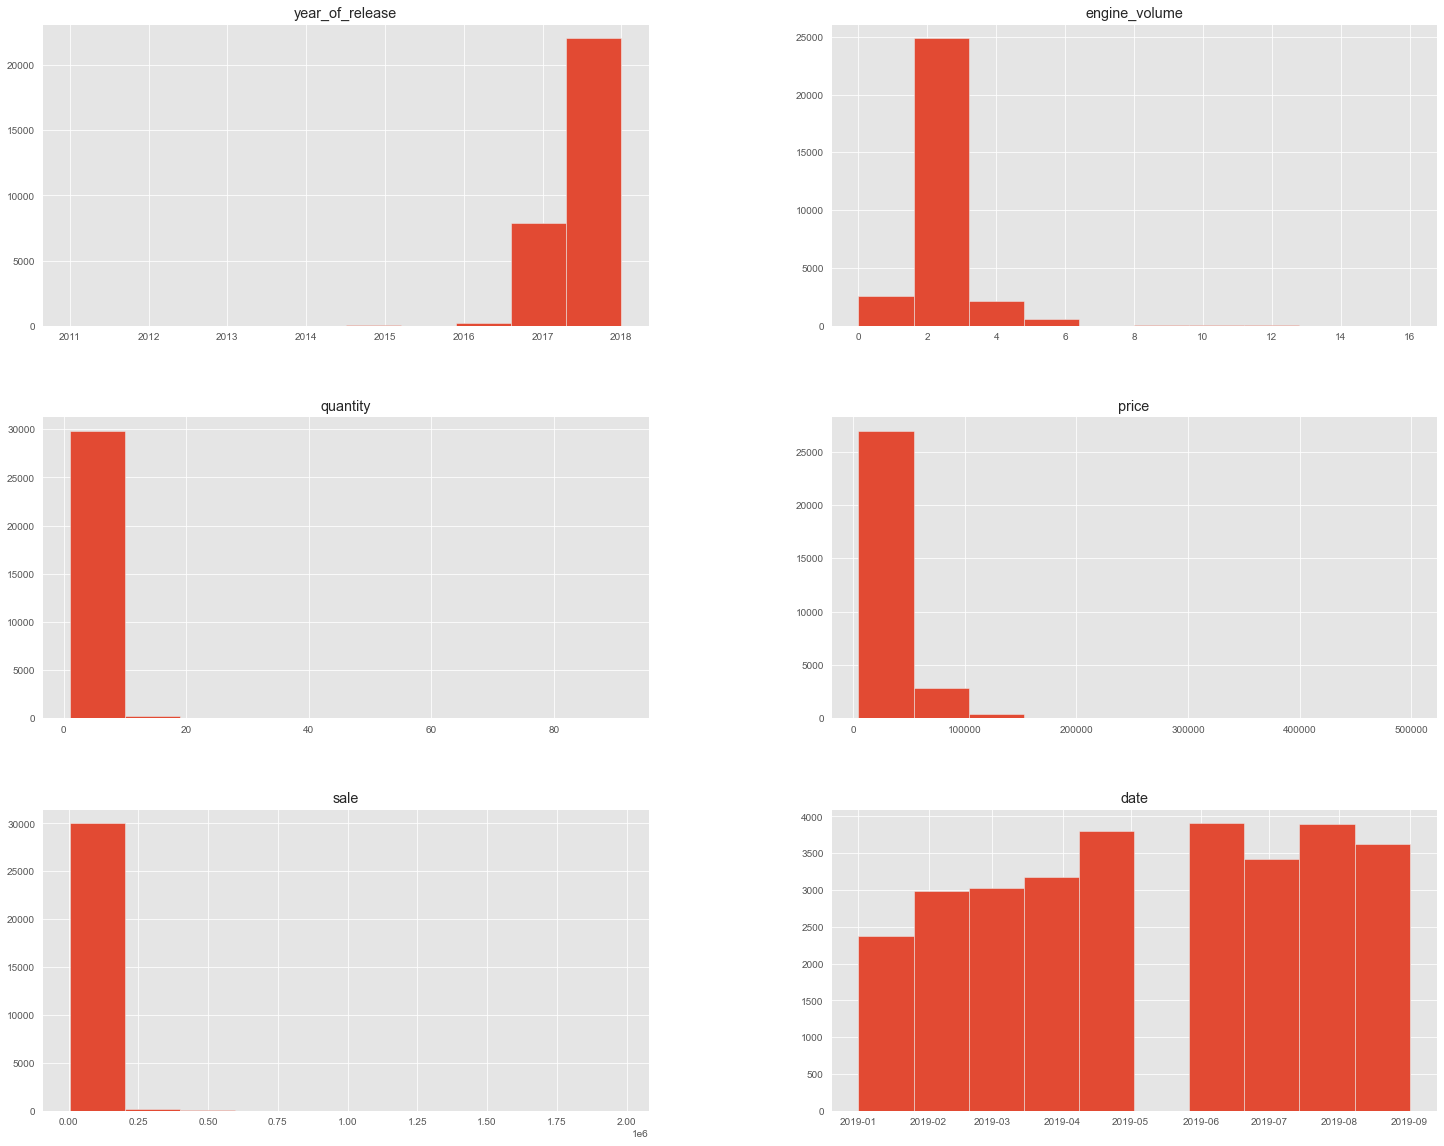

In [95]:
df.hist(figsize=(25,20));

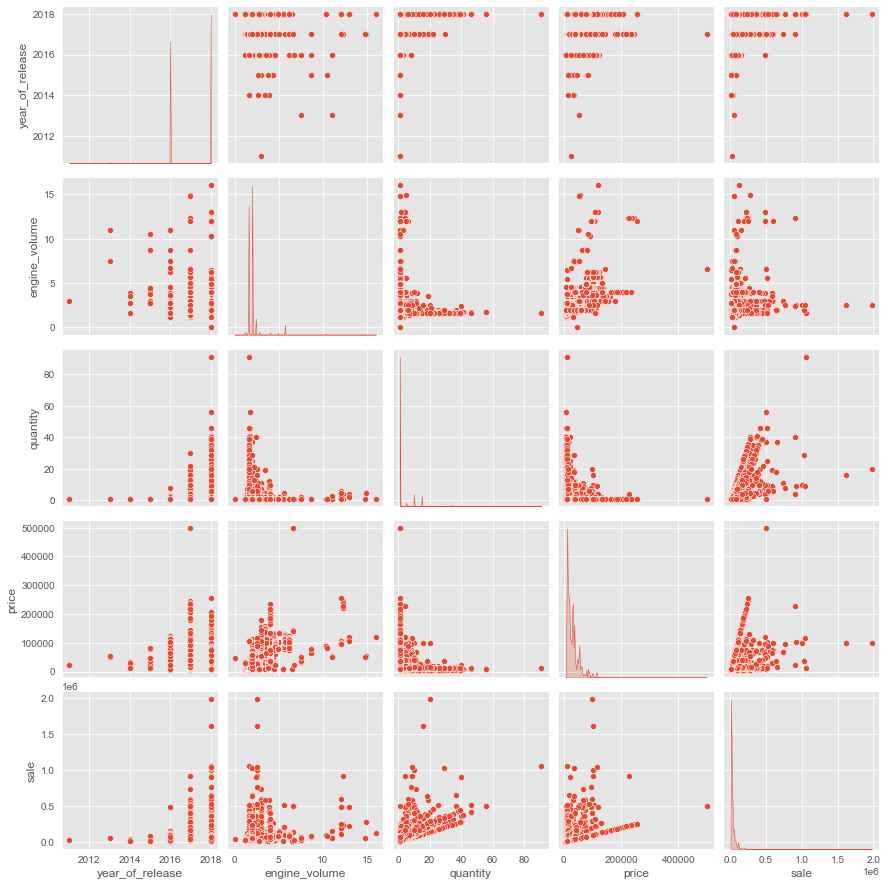

In [96]:

sns.pairplot(df, diag_kind="kde", diag_kws=dict(shade=True, bw_adjust=.05, vertical=False) )

plt.show();

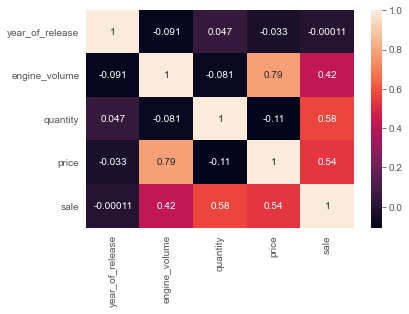

In [97]:
sns.heatmap(df.corr(), annot = True)
plt.show()

По матрице корреляций можно отметить зависимости цена-сумма прдажи.Цена,сумма подажи- количество.Что очевидно.По графикам корреляции также заметно,что чаще и больше продаются авто с небольшим объемом двигателя и недорогие.Также отметим, что чаще покупают одновременно 1-2 машины.Больше продается новых автомобилей(2018  г.выпуска) Посмотрим поподробнее.

### **Год выпуска `year_of_release`**

In [98]:
df['year_of_release'].value_counts()

2018    22095
2017     7874
2016      217
2015       21
2014        4
2013        2
2011        1
Name: year_of_release, dtype: int64

In [99]:
df['year_of_release'].value_counts(normalize=True)

2018    0.731284
2017    0.260608
2016    0.007182
2015    0.000695
2014    0.000132
2013    0.000066
2011    0.000033
Name: year_of_release, dtype: float64

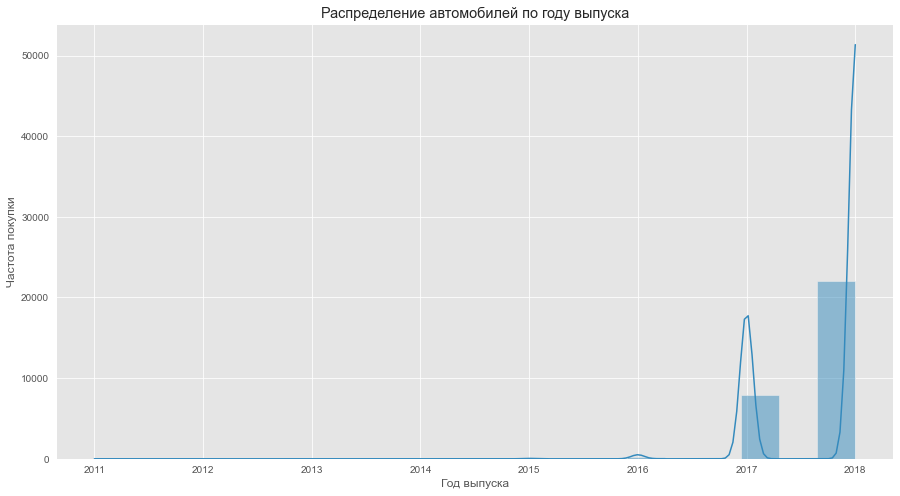

In [100]:
plt.subplots(figsize=(15,8))
sns.histplot(
    data=df,
    x='year_of_release',
    kde=True,
    bins=20)
plt.title('Распределение автомобилей по году выпуска')
# подписи осей
plt.xlabel('Год выпуска')
plt.ylabel('Частота покупки')
plt.show()

In [101]:
df.groupby(['segment']).agg({'segment':['count']}).reset_index()

segment       
                             count
0             Внедорожники   13550
1  Коммерческие автомобили    3130
2      Легковые автомобили   12668
3                  Минивэны     56
4                   Пикапы     810

In [102]:
df.query('year_of_release < 2017').groupby(['segment']).agg({'segment':['count']}).reset_index()

segment      
                            count
0             Внедорожники     55
1  Коммерческие автомобили    114
2      Легковые автомобили     37
3                  Минивэны    37
4                   Пикапы      2

Год выпуска продаваемых авто : от 2011 до 2018.Подавляюшее большинство-73% выпущены в 2018 году.26% - в  2017 году.Среди них преобладают внедорожники и легковые авто.Среди выпущенных до 2017 года  преобладают коммерческие автомобили.

### **Количество проданных автомобилей `quantity`**

In [103]:
df['quantity'].value_counts(normalize=True)

1.0     0.924406
2.0     0.029092
3.0     0.012875
4.0     0.007215
5.0     0.005097
6.0     0.003475
7.0     0.003144
8.0     0.001920
9.0     0.001324
11.0    0.001291
12.0    0.001258
10.0    0.001258
15.0    0.000827
16.0    0.000794
13.0    0.000761
14.0    0.000695
18.0    0.000629
21.0    0.000430
20.0    0.000430
17.0    0.000364
25.0    0.000298
19.0    0.000265
30.0    0.000265
29.0    0.000232
23.0    0.000232
22.0    0.000232
26.0    0.000165
40.0    0.000099
39.0    0.000099
28.0    0.000099
46.0    0.000066
34.0    0.000066
33.0    0.000066
24.0    0.000066
56.0    0.000066
31.0    0.000066
35.0    0.000066
37.0    0.000066
91.0    0.000033
41.0    0.000033
38.0    0.000033
27.0    0.000033
36.0    0.000033
32.0    0.000033
Name: quantity, dtype: float64

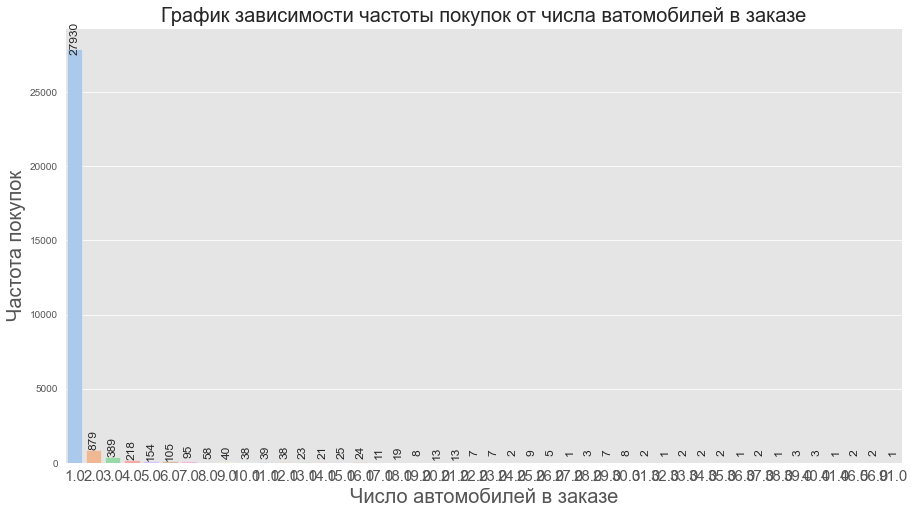

In [104]:
plt.subplots(figsize=(15,8))
ax = sns.countplot(df['quantity'].sort_values(),palette='pastel')

ax.set_title('График зависимости частоты покупок от числа ватомобилей в заказе',fontsize= 20)
ax.set_xlabel('Число автомобилей в заказе',fontsize= 20)
ax.set_ylabel('Частота покупок',fontsize= 20)
for bar in ax.patches:
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0,10),rotation = 90,
                   textcoords='offset points')

plt.xticks(fontsize= 15)
plt.show()

Подавляющее большинство покупает один автомобиль.Посмотрим на график покупок от 2 единиц.

In [105]:
df_q =df[df['quantity'] > 1]

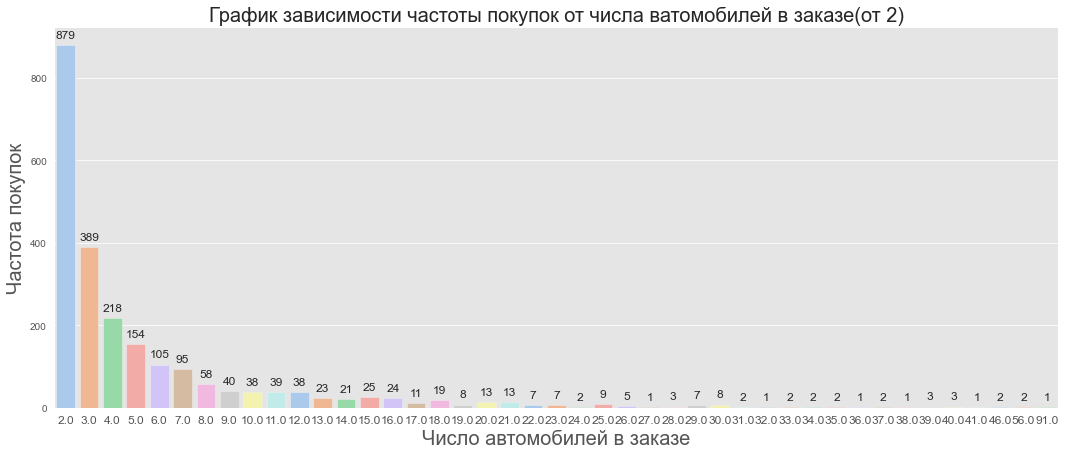

In [106]:

plt.subplots(figsize=(18, 7))
ax = sns.countplot(df_q['quantity'].sort_values(),palette='pastel')

ax.set_title('График зависимости частоты покупок от числа ватомобилей в заказе(от 2)',fontsize= 20)
ax.set_xlabel('Число автомобилей в заказе',fontsize= 20)
ax.set_ylabel('Частота покупок',fontsize= 20)
for bar in ax.patches:
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0,10),
                   textcoords='offset points')

plt.xticks(fontsize= 12)
plt.show()

In [107]:
df['quantity'].describe()

count    30214.000000
mean         1.348315
std          2.139295
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         91.000000
Name: quantity, dtype: float64

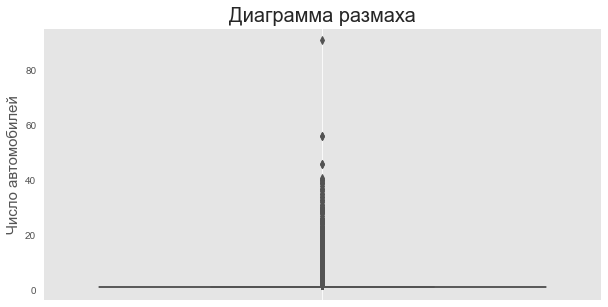

In [108]:
plt.figure(figsize=(10,5))
sns.boxplot(y='quantity', data=df)
plt.ylabel('Число автомобилей',fontsize=15)
plt.grid()
#plt.ylim(0,2)
plt.title('Диаграмма размаха',fontsize=20)
plt.show()

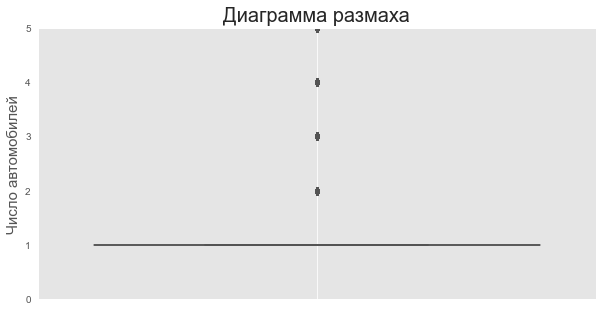

In [109]:
plt.figure(figsize=(10,5))
sns.boxplot(y='quantity', data=df)
plt.ylabel('Число автомобилей',fontsize=15)
plt.grid()
plt.ylim(0,5)
plt.title('Диаграмма размаха',fontsize=20)
plt.show()

In [110]:
df.query('quantity > 20')

,company,brand,model,year_of_release,country,fuel_type,engine_volume,transmission,drive_type,region,customer_type,quantity,price,sale,area,segment,class,date
11360,БИПЭК АВТО,Kia,Cerato,2018,KAZ,PET,2.0,автомат,FWD,Астана,неизвестно,37.0,17500.00,647500.00,г.Астана,Легковые автомобили,C класс,2019-09-01
11372,БИПЭК АВТО,Kia,Optima,2018,KAZ,PET,2.4,автомат,FWD,Астана,неизвестно,40.0,22600.00,904000.00,г.Астана,Легковые автомобили,D класс,2019-06-01
11441,БИПЭК АВТО,Kia,Rio,2018,KAZ,PET,1.6,автомат,FWD,Алматы,неизвестно,24.0,13500.00,324000.00,г.Алматы,Легковые автомобили,B класс,2019-05-01
11457,БИПЭК АВТО,Kia,Rio,2018,KAZ,PET,1.6,автомат,FWD,Алматы,неизвестно,26.0,13500.00,351000.00,г.Алматы,Легковые автомобили,B класс,2019-06-01
11495,БИПЭК АВТО,Kia,Rio,2018,RUS,PET,1.6,автомат,FWD,Алматы,неизвестно,37.0,13500.00,499500.00,г.Алматы,Легковые автомобили,B класс,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13662,БИПЭК АВТО,Lada,Vesta,2018,KAZ,PET,1.6,механика,FWD,Павлодар,неизвестно,22.0,11600.00,255200.00,Павлодарская область,Легковые автомобили,B класс,2019-09-01
16196,Nissan Manufacturing RUS,Nissan,Almera,2018,RUS,PET,1.6,автомат,FWD,Алматы,неизвестно,23.0,12716.13,292471.06,г.Алматы,Легковые автомобили,C класс,2019-08-01
16224,Nissan Manufacturing RUS,Nissan,Almera,2018,RUS,PET,1.6,автомат,FWD,Алматы,неизвестно,21.0,12378.19,259942.09,г.Алматы,Легковые автомобили,C класс,2019-09-01
20465,БИПЭК АВТО,Skoda,Superb B6,2018,KAZ,PET,2.0,автомат,FWD,Астана,неизвестно,29.0,35588.25,1032059.25,г.Астана,Легковые автомобили,E класс,2019-07-01


Посмотрим,какие марки продаюся в колличестае свыше 20

In [111]:
df.query('quantity > 20').groupby(['brand','model','customer_type']).agg({'quantity':'unique'}).sort_values(by='model', ascending=False).reset_index()

,brand,model,customer_type,quantity
0,Lada,Vesta,неизвестно,"[91.0, 23.0, 26.0, 22.0]"
1,Skoda,Superb B6,неизвестно,[29.0]
2,Kia,Sportage,неизвестно,"[25.0, 22.0]"
3,Kia,Rio,неизвестно,"[24.0, 26.0, 37.0]"
4,Kia,Optima,неизвестно,[40.0]
5,Lada,Largus,неизвестно,"[21.0, 22.0, 25.0, 34.0, 38.0, 30.0, 39.0, 46...."
6,Lada,Granta,неизвестно,"[22.0, 24.0, 25.0, 21.0, 23.0, 36.0, 39.0, 26...."
7,Kia,Cerato,неизвестно,[37.0]
8,Nissan,Almera,неизвестно,"[23.0, 21.0]"
9,Lada,4x4,неизвестно,"[30.0, 21.0, 31.0, 46.0, 23.0, 29.0, 40.0, 22...."


Также посмотрим, что это за покупка 91 авто.

In [112]:
df.query('quantity == 91')

,company,brand,model,year_of_release,country,fuel_type,engine_volume,transmission,drive_type,region,customer_type,quantity,price,sale,area,segment,class,date
13420,БИПЭК АВТО,Lada,Vesta,2018,KAZ,PET,1.6,механика,FWD,Караганда,неизвестно,91.0,11600.0,1055600.0,Карагандинская область,Легковые автомобили,B класс,2019-06-01


Посмотрим , действительно ли Ladа Vesta продают оптовикам или это единичный случай

In [113]:
df.query('quantity > 10 and model== "Vesta"')

,company,brand,model,year_of_release,country,fuel_type,engine_volume,transmission,drive_type,region,customer_type,quantity,price,sale,area,segment,class,date
13137,БИПЭК АВТО,Lada,Vesta,2018,KAZ,PET,1.6,механика,FWD,Костанай,неизвестно,12.0,11600.0,139200.0,Костанайская область,Легковые автомобили,B класс,2019-02-01
13185,БИПЭК АВТО,Lada,Vesta,2018,KAZ,PET,1.6,механика,FWD,Усть-Каменогорск,неизвестно,15.0,11600.0,174000.0,Восточно-Казахстанская область,Легковые автомобили,B класс,2019-03-01
13186,БИПЭК АВТО,Lada,Vesta,2018,KAZ,PET,1.6,механика,FWD,Уральск,неизвестно,11.0,11600.0,127600.0,Западно-Казахстанская область,Легковые автомобили,B класс,2019-03-01
13191,БИПЭК АВТО,Lada,Vesta,2018,KAZ,PET,1.6,механика,FWD,Павлодар,неизвестно,12.0,11600.0,139200.0,Павлодарская область,Легковые автомобили,B класс,2019-03-01
13238,БИПЭК АВТО,Lada,Vesta,2018,KAZ,PET,1.8,механика,FWD,Алматы,неизвестно,14.0,13800.0,193200.0,г.Алматы,Легковые автомобили,B класс,2019-04-01
13265,БИПЭК АВТО,Lada,Vesta,2018,KAZ,PET,1.6,механика,FWD,Усть-Каменогорск,неизвестно,11.0,11600.0,127600.0,Восточно-Казахстанская область,Легковые автомобили,B класс,2019-04-01
13336,БИПЭК АВТО,Lada,Vesta,2018,KAZ,PET,1.6,механика,FWD,Усть-Каменогорск,неизвестно,13.0,11600.0,150800.0,Восточно-Казахстанская область,Легковые автомобили,B класс,2019-05-01
13346,БИПЭК АВТО,Lada,Vesta,2018,KAZ,PET,1.6,механика,FWD,Караганда,неизвестно,18.0,11600.0,208800.0,Карагандинская область,Легковые автомобили,B класс,2019-05-01
13411,БИПЭК АВТО,Lada,Vesta,2018,KAZ,PET,1.6,механика,FWD,Усть-Каменогорск,неизвестно,15.0,11600.0,174000.0,Восточно-Казахстанская область,Легковые автомобили,B класс,2019-06-01
13416,БИПЭК АВТО,Lada,Vesta,2018,KAZ,PET,1.6,механика,FWD,Павлодар,неизвестно,12.0,11600.0,139200.0,Павлодарская область,Легковые автомобили,B класс,2019-06-01


Да,БИПЭК АВТО активно продает эту модель!

Таким образом, у нас в подавляющем большинстве покупается 1 автомобиль(92%) и скорее всего это частные лица.Частное лицо скорее всего покупает одновременно не более 2 авто.Так что то, что свыше видимо стоит считать оптовыми закупками.Свыше 20 закупаются относительно недорогие  модели легковых автомобилей,скорее всего для нужд такси.Максимум - 91 автомобиль Lada	Vesta(производство Казахстан) продан в Караганду,дилер-БИПЭК АВТО.В какой-то мере это можно считать выбросом,однако удалять ничего не будем.Наши данные таковы, что содержат информацию о розничных и оптовых покупках.

### **Цена автомобиля и сумма прдажи (`price` и `sale`)**

Признаки очевидным образом связаны между собой через количество.Посмотрим на разброс цен на продаваемые автомобили

In [114]:
df['price'].describe()

count     30214.000000
mean      28854.310214
std       21570.963252
min        4571.360000
25%       15096.910000
50%       22141.610000
75%       33318.940000
max      498787.510000
Name: price, dtype: float64

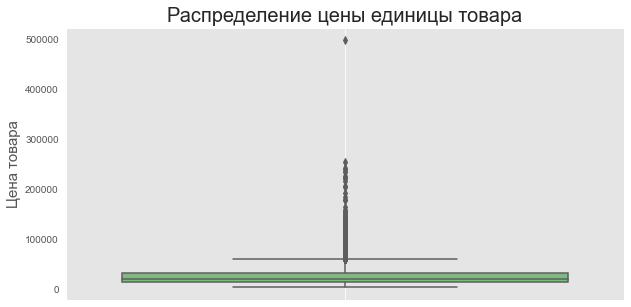

In [115]:
plt.figure(figsize=(10,5))
sns.boxplot(y='price', data=df, palette='Greens')
plt.ylabel('Цена товара',fontsize=15)
plt.grid()

plt.title('Распределение цены единицы товара',fontsize=20)
plt.show()

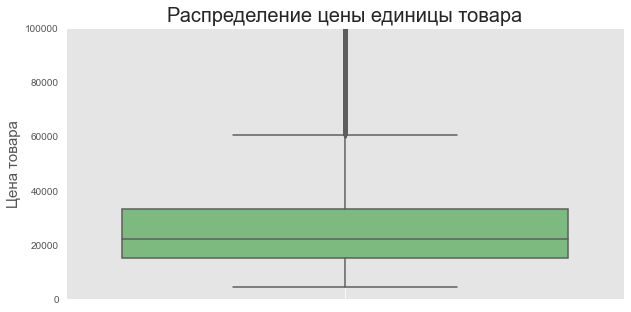

In [116]:
plt.figure(figsize=(10,5))
sns.boxplot(y='price', data=df, palette='Greens')
plt.ylabel('Цена товара',fontsize=15)
plt.grid()
plt.ylim(0,100000)
plt.title('Распределение цены единицы товара',fontsize=20)
plt.show()

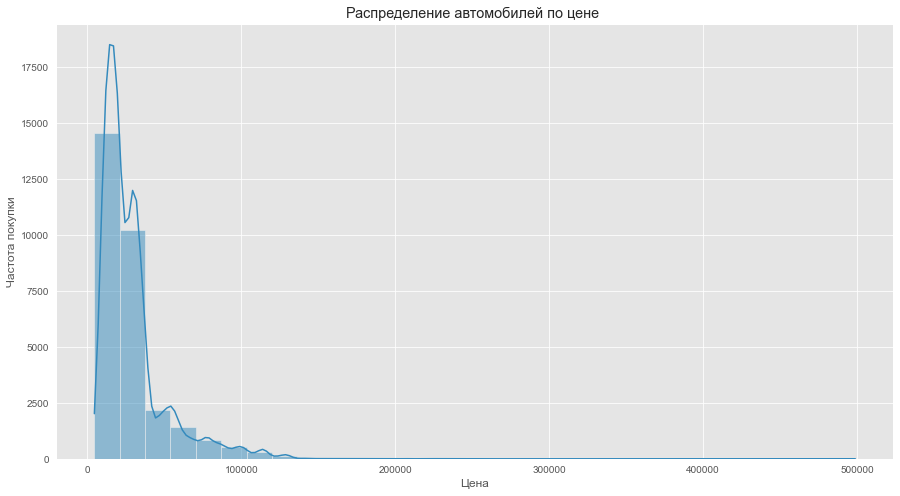

In [117]:
plt.figure(figsize=(15,8))
sns.histplot(
    data=df,
    x='price',
    kde=True,
    bins=30)
plt.title('Распределение автомобилей по цене ')
# подписи осей
plt.xlabel('Цена')
plt.ylabel('Частота покупки')
plt.show()

Распределение не является нормальным.Минимальная и максимальная цена различаются прктически в 100 раз!!!

Вполне очевидно,что чаще покупают недорогие авто до 33.3 тыс. USD.Есть явно сверхдорогие- дороже 200000 USD.

In [118]:
df.query('price > 200000 ')

,company,brand,model,year_of_release,country,fuel_type,engine_volume,transmission,drive_type,region,customer_type,quantity,price,sale,area,segment,class,date
7145,Astana Motors,Hyundai Truck & Bus,Universe,2017,KOR,DIZ,12.3,механика,2WD,Атырау,Юр. Лицо,1.0,243827.22,243827.22,Атырауская область,Коммерческие автомобили,Большие автобусы,2019-02-01
7146,Astana Motors,Hyundai Truck & Bus,Universe,2017,KAZ,DIZ,12.3,механика,2WD,Атырау,Юр. Лицо,1.0,222639.77,222639.77,Атырауская область,Коммерческие автомобили,Большие автобусы,2019-03-01
7147,Astana Motors,Hyundai Truck & Bus,Universe,2017,KAZ,DIZ,12.3,механика,2WD,Атырау,Юр. Лицо,1.0,222639.77,222639.77,Атырауская область,Коммерческие автомобили,Большие автобусы,2019-03-01
7148,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,Universe,2017,KAZ,DIZ,12.3,механика,2WD,Алматы,Юр. Лицо,1.0,239203.97,239203.97,г.Алматы,Коммерческие автомобили,Большие автобусы,2019-05-01
7149,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,Universe,2017,KOR,DIZ,12.3,механика,2WD,Алматы,Юр. Лицо,4.0,228003.97,912015.89,г.Алматы,Коммерческие автомобили,Большие автобусы,2019-07-01
15776,Autokapital,Mercedes-Benz Trucks,Tourismo,2018,TUR,DIZ,12.0,автомат,2WD,Атырау,неизвестно,1.0,254958.00,254958.00,Атырауская область,Коммерческие автомобили,Крупнотоннажные грузовики,2019-07-01
17146,Mercur Auto,Porsche,911 Carrera S,2018,DEU,PET,4.0,автомат,4WD,Алматы,Физ. Лицо,1.0,205962.37,205962.37,г.Алматы,Легковые автомобили,Спортивные автомобили,2019-04-01
17192,Mercur Auto,Porsche,Panamera,2017,DEU,PET,4.0,автомат,4WD,Алматы,Физ. Лицо,1.0,206882.07,206882.07,г.Алматы,Легковые автомобили,F класс,2019-01-01
17194,Mercur Auto,Porsche,Panamera,2017,DEU,PET,4.0,автомат,4WD,Алматы,Физ. Лицо,1.0,235378.95,235378.95,г.Алматы,Легковые автомобили,F класс,2019-02-01
17202,Mercur Auto,Porsche,Panamera,2017,DEU,PET,4.0,автомат,4WD,Алматы,Физ. Лицо,1.0,217042.36,217042.36,г.Алматы,Легковые автомобили,F класс,2019-07-01


Это все либо машины представительского класса(F класс) либо коммерческие транспортные средства.

In [119]:
df.query('brand == "Rolls Royce"')

,company,brand,model,year_of_release,country,fuel_type,engine_volume,transmission,drive_type,region,customer_type,quantity,price,sale,area,segment,class,date
32832,Автоцентр-Бавария,Rolls Royce,Ghost,2017,GBR,PET,6.6,автомат,4WD,Алматы,неизвестно,1.0,498787.51,498787.51,г.Алматы,Легковые автомобили,F класс,2019-08-01


Выделяется явно самый дорогой автомобиль -Rolls Royce Ghost(цена 498787.51 USD). Цена вполне реальна для машины такого класса.

In [120]:
q75, q25 = np.percentile(df['price'], [75 ,25])
iqr = q75 - q25
iqr

18222.030000000002

Посмотрим на верхнюю границу выбросов

In [121]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
fence_high

60651.98500000001

Посмотрим на 99.5 перцентиль

In [122]:
df['price'].quantile(0.995)

121830.64

In [123]:
perc = df["price"].quantile(0.995)
filt_df = df[df["price"] > perc]
filt_df
#plt.hist(filtered_df.A)
#plt.show()

,company,brand,model,year_of_release,country,fuel_type,engine_volume,transmission,drive_type,region,customer_type,quantity,price,sale,area,segment,class,date
54,Mercur Auto,Audi,A8,2018,DEU,PET,3.0,автомат,4WD,Алматы,Физ. Лицо,1.0,130887.00,130887.00,г.Алматы,Легковые автомобили,F класс,2019-05-01
55,Mercur Auto,Audi,A8,2018,DEU,PET,3.0,автомат,4WD,Алматы,Юр. Лицо,1.0,141185.07,141185.07,г.Алматы,Легковые автомобили,F класс,2019-06-01
56,Mercur Auto,Audi,A8,2018,DEU,PET,3.0,автомат,4WD,Алматы,Юр. Лицо,1.0,138661.81,138661.81,г.Алматы,Легковые автомобили,F класс,2019-06-01
57,Mercur Auto,Audi,A8,2018,DEU,PET,3.0,автомат,4WD,Алматы,Физ. Лицо,1.0,155705.61,155705.61,г.Алматы,Легковые автомобили,F класс,2019-08-01
58,Mercur Auto,Audi,A8,2018,DEU,PET,3.0,автомат,4WD,Алматы,Физ. Лицо,1.0,155705.61,155705.61,г.Алматы,Легковые автомобили,F класс,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17202,Mercur Auto,Porsche,Panamera,2017,DEU,PET,4.0,автомат,4WD,Алматы,Физ. Лицо,1.0,217042.36,217042.36,г.Алматы,Легковые автомобили,F класс,2019-07-01
17203,Mercur Auto,Porsche,Panamera,2017,DEU,PET,3.0,автомат,4WD,Алматы,Физ. Лицо,1.0,143026.07,143026.07,г.Алматы,Легковые автомобили,F класс,2019-07-01
32301,Sivi Finance Consulting,Cadillac,Escalade,2016,BLR,PET,6.2,автомат,4WD,Алматы,Физ. Лицо,1.0,123437.50,123437.50,г.Алматы,Внедорожники,Полноразмерные SUV,2019-01-01
32378,Toyota Motor Kazakhstan,Lexus,LC,2017,JPN,PET,5.0,автомат,FWD,Астана,Физ. Лицо,1.0,132471.21,132471.21,г.Астана,Легковые автомобили,F класс,2019-07-01


In [124]:
filt_df.groupby(['class']).agg({'class':['count']}).rename(columns={'class':'count'}).reset_index()


,class,count
,,count
0,A класс,0
1,B класс,0
2,C класс,0
3,D класс,0
4,E класс,3
5,F класс,29
6,Pick-ups,0
7,Большие автобусы,5
8,Компактвэн,0


Таким образом 0.5% автомобилей продаются по цене свыше 121 830 $ и это внедорожники,легковые автомобили F класса. Пока ничего с ними делать не будем.В дальнейшем их по необходимости можно отфильтровать

Как отмечалось выше,столбец с суммой продажи напрямую связан с со столбцом цены через количество.

### **Объем двигателя (`engine_volume`)**

In [125]:
df['engine_volume'].value_counts()

1.6     7760
2.0     6069
2.7     4547
2.5     3967
1.5     2187
4.6      795
1.8      782
1.7      746
3.5      622
2.4      561
4.0      473
5.7      404
3.0      323
1.2      283
4.4      121
2.8      111
4.9       70
1.4       64
3.9       38
10.3      34
2.2       31
1.3       30
3.8       27
6.2       27
4.2       25
8.7       24
5.6       24
3.6       11
3.7        9
5.0        8
12.0       7
12.3       5
2.3        5
11.0       4
13.0       3
7.5        3
6.6        3
3.3        2
16.0       1
10.5       1
0.0        1
6.5        1
14.8       1
4.5        1
6.7        1
5.5        1
14.9       1
Name: engine_volume, dtype: int64

In [126]:
df.engine_volume.nunique()

47

у нас присутствуют 47 значений объема двигателя.

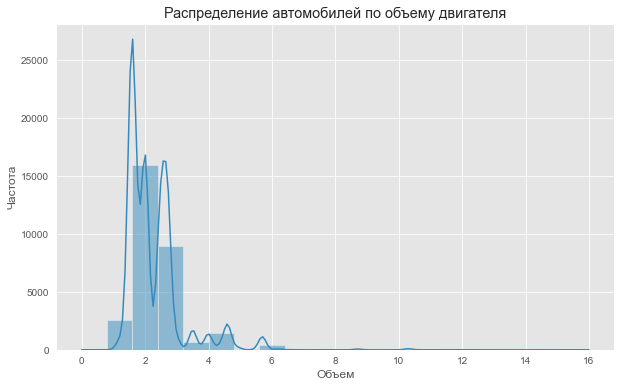

count    30214.000000
mean         2.266145
std          0.937776
min          0.000000
25%          1.600000
50%          2.000000
75%          2.700000
max         16.000000
Name: engine_volume, dtype: float64

In [127]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='engine_volume',
    kde=True,
    bins=20)
plt.title('Распределение автомобилей по объему двигателя')
# подписи осей
plt.xlabel('Объем')
plt.ylabel('Частота')
plt.show()
df['engine_volume'].describe()

По графику и описательным статистикам видно,что 50% автомобилей имеет двигатель от 1.6 до 2.7 л.

Класиффикация двигателей у легковых авто:

особо малый класс — объём двигателя до 1,2 литра
малый класс — объём двигателя до 1,2-1,8 литра
средний класс — объём двигателя до 1,8-3,5 литров
большой класс — объём двигателя свыше 3,5 литра


У нас в данных присутствуют помимо этого и автобусы и грузовики.Объмем двтгателей представлен в диапазоне от 0 до 16 л.Большая часть представлена двигателями малого и среднего объема.(от 1.2 до 3.5 л.)

Для удобства дальнейшего анализа можно добавить столбец с категориями двигателей

Разобьем их так:

очень малые____________ 0 до 1.2л

малые__________________ от 1,2 до 1,8 литра

средние________________ от 1,8 до 3,5 литров

большие________________ от 3,5 до 6.6 литра

очень большие__________ от 6.6 до 16 литров

In [128]:
volume_labels = ['little','small', 'average', 'large', 'huge']
volume_bins = [0, 1.2, 1.8, 3.5, 6.6,16]

In [129]:
df['volume_cat'] = pd.cut(df.engine_volume, bins=volume_bins, labels=volume_labels)


In [130]:
df.volume_cat = df.volume_cat.astype('category')

In [131]:
df['volume_cat'].value_counts()

average    16238
small      11569
large       2038
little       283
huge          85
Name: volume_cat, dtype: int64

In [132]:
df_v = df.groupby('volume_cat')['engine_volume'].count().reset_index().rename(columns={'engine_volume':'cars_number'})
df_v

,volume_cat,cars_number
0,little,283
1,small,11569
2,average,16238
3,large,2038
4,huge,85


То есть наиболее продаваемы автомобили с двигателлями малого и среднего объема

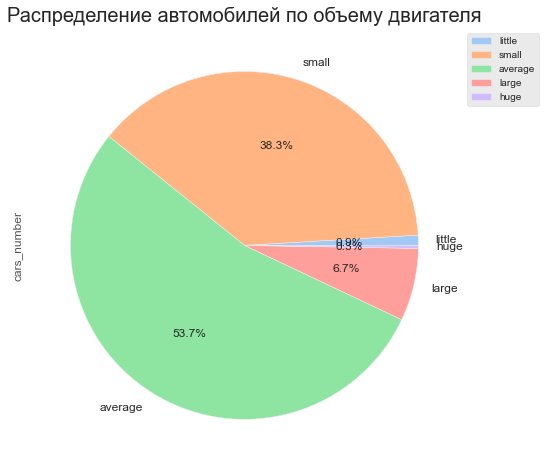

In [133]:
colors = sns.color_palette('pastel')[ 0:5 ]
df_v.plot(kind='pie',figsize=(8,8), y= 'cars_number', labels=df_v.volume_cat,autopct='%1.1f%%',fontsize = 12,colors=colors)

plt.title("Распределение автомобилей по объему двигателя",fontsize= 20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Построим аналогичный график с помощью библиотеки Plotly

In [134]:
fig = go.Figure()
data = [go.Pie(labels=df_v['volume_cat'], values=df_v['cars_number'])]

fig.add_trace(data[0])
fig.update_layout(title='Распределение автомобилей по объему двигателя')
#plotly.offline.iplot(fig, filename='pie-plot.html')
fig.update_traces(textposition='inside', textinfo='percent+value+label ')

Таким образом малые двигатели(от 1,2 до 1,8 л) составляют 38.3%

              средние(от 1,8 до 3,5 л) составляют 53.7%

 ### Зависимость числа продаваемых автомобилей от их цены и распределение суммы продажи в зависимости от числа машин в закакзе

Посмотрим, зависит ли число продаваемых автомобилей от их цены и как распределяется сумма продажи в зависимости от числа машин в закакзе

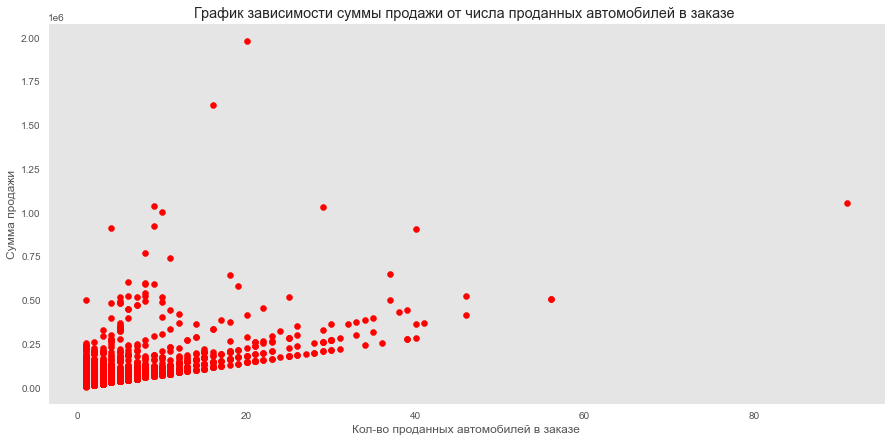

In [135]:

plt.figure(figsize=(15, 7))
plt.scatter(df['quantity'],df['sale'],color='red')
plt.grid()
plt.title('График зависимости суммы продажи от числа проданных автомобилей в заказе ')
plt.xlabel('Кол-во проданных автомобилей в заказе')
plt.ylabel('Сумма продажи')
plt.show()

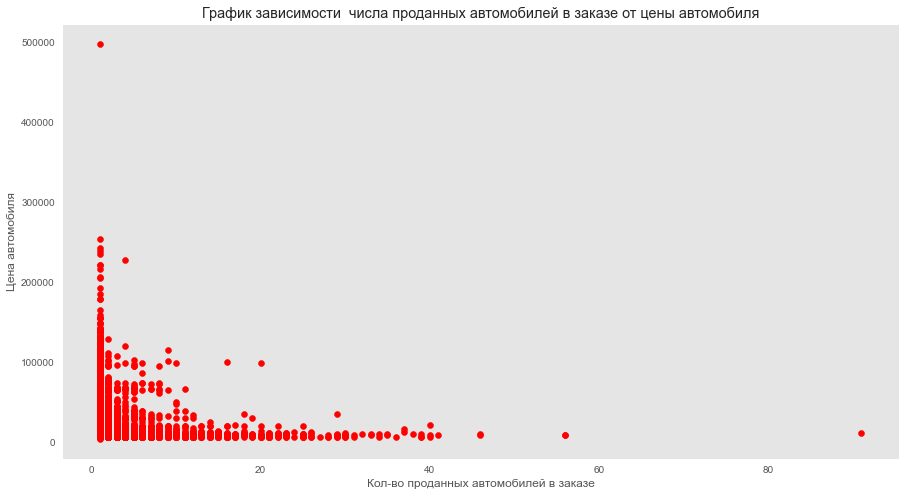

In [136]:
plt.figure(figsize=(15, 8))
plt.scatter(df['quantity'],df['price'],color='red')
plt.grid()
plt.title('График зависимости  числа проданных автомобилей в заказе от цены автомобиля')
plt.xlabel('Кол-во проданных автомобилей в заказе')
plt.ylabel('Цена автомобиля')
plt.show()

Отметим еще раз, что сумма продажи напрямую зависит о количества автомобилей в заказе,однако заметны единичные дорогие пркупки.И при этом недорогие машины покупают чаще.

## Анализ категориальных признаков

### **Тип топлива `fuel_type`**

In [137]:
df_f = df.groupby('fuel_type')['quantity'].count().sort_values(ascending=False).reset_index()
df_f

,fuel_type,quantity
0,PET,29535
1,DIZ,590
2,GAS,70
3,HYB,18
4,EL,1


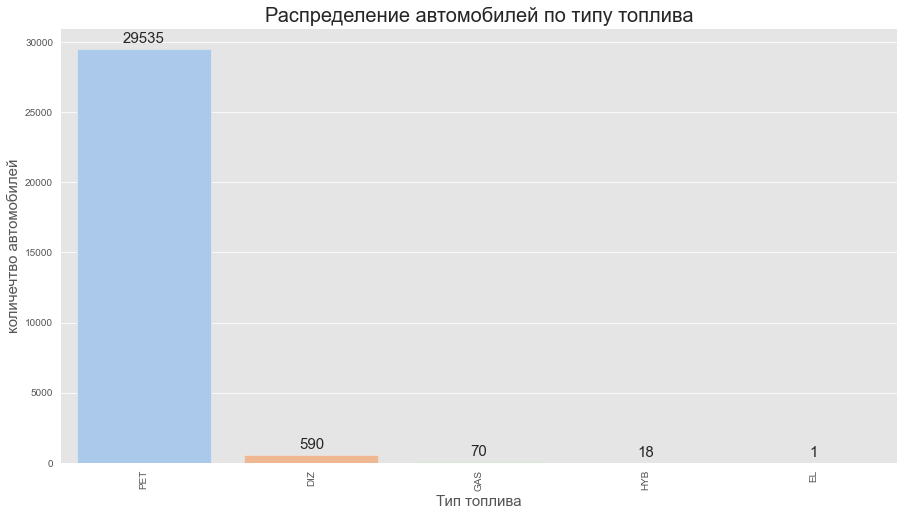

In [138]:
plt.subplots(figsize=(15,8))
ax = sns.countplot(x = 'fuel_type',
              data = df,
              order = df['fuel_type'].value_counts().index,palette='pastel')

ax.set_title('Распределение автомобилей по типу топлива',fontsize= 20)
ax.set_xlabel('Тип топлива',fontsize= 15)
ax.set_ylabel('количечтво автомобилей',fontsize= 15)
for bar in ax.patches:
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0,10),
                   textcoords='offset points')

plt.xticks(rotation=90)
plt.show()

Продублируем график круговой диаграммой Plotly

In [139]:
fig = go.Figure()
data = [go.Pie(labels=df_f['fuel_type'], values=df_f['quantity'])]

fig.add_trace(data[0])
fig.update_layout(title='Распределение автомобилей по типу топлива')
#plotly.offline.iplot(fig, filename='pie-plot.html')
fig.update_traces(textposition='inside', textinfo='percent+value+label ')

Подавляющее большинство - 97.8% имеют бннзиновый двигатель.1.95% -дизель.Остальное- газ,гибрид и электро.

### **Коробка передач `transmission`**

In [140]:
df_t = df.groupby('transmission')['quantity'].count().reset_index()
df_t

,transmission,quantity
0,автомат,20909
1,механика,9305


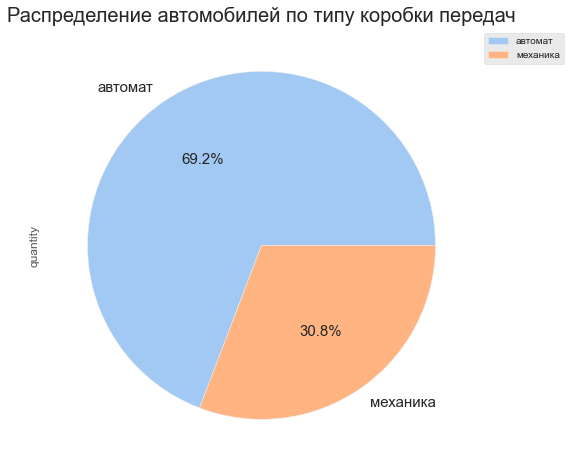

In [141]:
colors = sns.color_palette('pastel')[ 0:2 ]
df_t.plot(kind='pie',figsize=(8,8), y= 'quantity', labels=df_t.transmission,autopct='%1.1f%%',fontsize = 15,colors=colors)

plt.title("Распределение автомобилей по типу коробки передач",fontsize= 20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

На рынке Казахстана `69.2%` авто продается с коробкой-автоматом.`30.8%` - механика

### **Тип привода `drive_type`**


In [142]:
df_d = df.groupby('drive_type')['quantity'].count().reset_index()
df_d

,drive_type,quantity
0,2WD,6556
1,4WD,11783
2,FWD,9956
3,RWD,1919


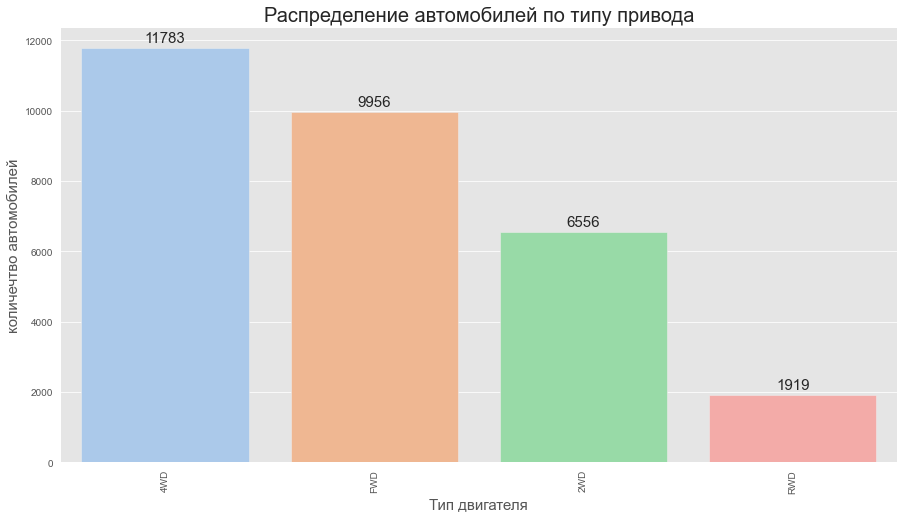

In [143]:
plt.subplots(figsize=(15,8))
ax = sns.countplot(x ='drive_type',
              data = df,
              order = df['drive_type'].value_counts().index,palette='pastel')
ax.set_title('Распределение автомобилей по типу привода',fontsize= 20)
ax.set_xlabel('Тип двигателя',fontsize= 15)
ax.set_ylabel('количечтво автомобилей',fontsize= 15)
for bar in ax.patches:
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0,10),
                   textcoords='offset points')

plt.xticks(rotation=90)
plt.show()

In [144]:
fig = go.Figure()
data = [go.Pie(labels=df_d['drive_type'], values=df_d['quantity'])]

fig.add_trace(data[0])
fig.update_layout(title='Распределение автомобилей по типу двигателя')
#plotly.offline.iplot(fig, filename='pie-plot.html')
fig.update_traces(textposition='inside', textinfo='percent+value+label ')

39% полноприводные 4WD

33% передний привод FWD

21.7% два ведущих колеса 2WD

6.3% задний привод RWD

### **Страна-изготовитель `country`**

In [145]:
df_c = df.groupby('country')['quantity'].count().sort_values(ascending=False).reset_index()
df_c

,country,quantity
0,KAZ,11079
1,RUS,10382
2,JPN,4958
3,TUR,1214
4,UZB,1176
5,THA,814
6,DEU,298
7,USA,162
8,GBR,71
9,SWE,22


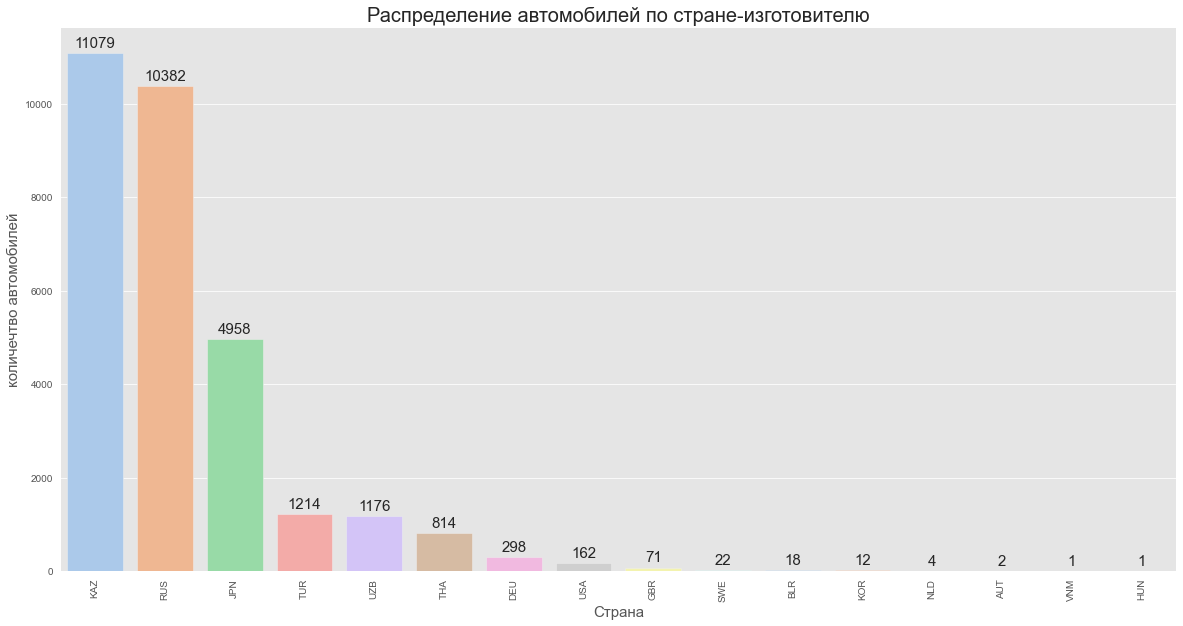

In [146]:
plt.subplots(figsize=(20,10))
ax = sns.countplot(x ='country',
              data = df,
              order = df['country'].value_counts().index,palette='pastel')
ax.set_title('Распределение автомобилей по стране-изготовителю',fontsize= 20)
ax.set_xlabel('Страна',fontsize= 15)
ax.set_ylabel('количечтво автомобилей',fontsize= 15)
for bar in ax.patches:
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0,10),
                   textcoords='offset points')

plt.xticks(rotation=90)
plt.show()

Подавляющее большинство автомобилей произведено в Казахстане и России.В дальнейшем рассмотрим это поподробнее.

In [147]:
df_a = df.query("country =='KAZ'" and "drive_type=='4WD'" and"transmission=='автомат'" and "fuel_type=='PET'" and ( "volume_cat=='average'" or "volume_cat=='smale'"))


In [148]:
df_a.groupby(['brand','model'],as_index=False)['quantity'].agg('sum')\
.sort_values(by='quantity', ascending=False).reset_index(drop=True).head(5)


,brand,model,quantity
0,Toyota,Camry,3410.0
1,Hyundai,Tucson,1875.0
2,Toyota,RAV4,1348.0
3,Toyota,LC Prado,1181.0
4,GAZ,3302,1099.0


Можно сделать вывод, что наиболее продаваемы автомобили произодимые в Казахстане ,автоматы с бензиновым двигателем малого и среднего объема , полноприводные .По этим признакам можно выявить лидера по числу проданных автомобилей - это **Toyotа Camry**

# Анализ рынка

## Топ-10 марок на рынке Казахстана: в денежном и натуральном выражении

In [149]:
df_top_10 = df.groupby('brand',as_index=False)['quantity'].agg('sum')\
.sort_values(by='quantity', ascending=False).reset_index(drop=True).head(10)
df_top_10

,brand,quantity
0,Lada,9638.0
1,Toyota,9374.0
2,Hyundai,5703.0
3,GAZ,2111.0
4,Kia,1815.0
5,Ravon,1727.0
6,Nissan,1648.0
7,UAZ,1063.0
8,Lexus,1051.0
9,Jac,985.0


In [150]:
fig = px.bar(df_top_10,
             x='brand',
             y='quantity',
             text='quantity',
             color='brand',
             height=500,
             width=800
             )
fig.update_layout(title = 'Топ-10 марок на рынке Казахстана по количеству проданных автомобилей',
                  xaxis_title = 'Количество проданных автомобилей',
                  yaxis_title = 'Название бренда',
                  showlegend = False)
fig.show()

In [151]:
df_top_10s = df.groupby('brand',as_index=False)['sale'].agg('sum')\
.sort_values(by='sale', ascending=False).reset_index(drop=True).head(10)
df_top_10s['sale'] = round(df_top_10s['sale'], 2)
df_top_10s

,brand,sale
0,Toyota,3.838752e+08
1,Hyundai,1.248472e+08
2,Lada,9.387062e+07
3,Lexus,8.328499e+07
4,GAZ,4.042060e+07
5,Nissan,3.698818e+07
6,Kia,3.675090e+07
7,BMW,2.331310e+07
8,Subaru,1.731155e+07
9,Ravon,1.714909e+07


In [152]:
fig = px.bar(df_top_10s,
             x='brand',
             y='sale',
             text='sale',
             color='brand',
             height=500,
             width=800
             )
fig.update_layout(title = 'Топ-10 марок на рынке Казахстана по общей сумме продажи',
                  xaxis_title = 'Сумма продажи,USD',
                  yaxis_title = 'Название бренда',
                  showlegend = False)
fig.show()

По числу продаваемых авто лидеры:
1 Lada -9638
    
2 Toyota -9374

3 Hyundai -5703

Однако в денежном эквиваленте немного другая картина:
    
1 Toyota    383875.2 тыс USD

2  Hyundai  124847.2 тыс USD

3  Lada     93870.6  тыс USD  

## Продажи на рынке Казахстана всех марок в денежном и натуральном выражении

In [153]:


print('Общая сумма продажи,USD:',df['sale'].sum())


Общая сумма продажи,USD: 1025957075.99


In [154]:
print('Общее число проданных автомобилей:',df['quantity'].sum())

Общее число проданных автомобилей: 40738.0


## Динамика продаж в целом по рынку: в денежном и натуральном выражении (помесячно)

In [155]:
df_2 = df.pivot_table(index='date', values='quantity', aggfunc='count').reset_index() # Создаем таблицу с группировкой данных по дате продажи
df_2.columns = ['date','quantity']
df_2['date'] = pd.to_datetime(df_2['date'], format='%Y-%m').dt.date
df_2

,date,quantity
0,2019-01-01,2372
1,2019-02-01,2993
2,2019-03-01,3025
3,2019-04-01,3173
4,2019-05-01,3805
5,2019-06-01,3908
6,2019-07-01,3420
7,2019-08-01,3895
8,2019-09-01,3623


In [156]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      9 non-null      object
 1   quantity  9 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 272.0+ bytes


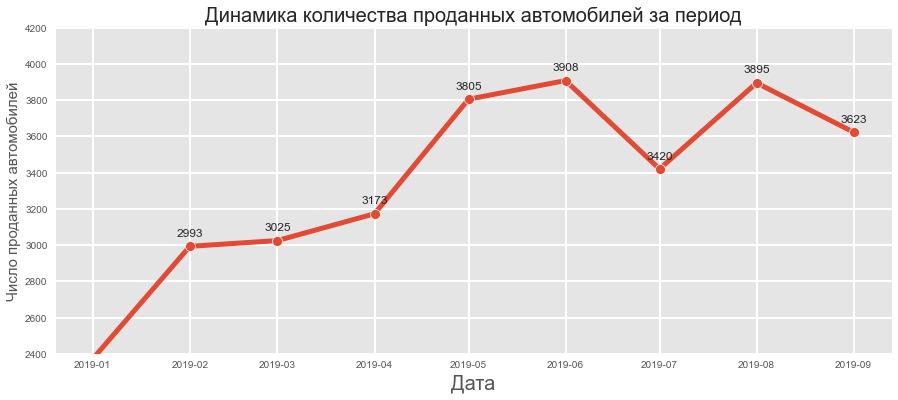

In [157]:
df_2['date'] = pd.to_datetime(df_2['date'], format='%Y-%m').dt.date
plt.subplots(figsize = (15,6))
sns.lineplot(x='date', y='quantity', data = df_2,marker='o',markersize=10,linewidth=5)
# Добавляем текстовую подпись над каждой точкой
for index, row in df_2.iterrows():
    plt.annotate(f"{int(row['quantity'])}", (row['date'], row['quantity']), xytext=(0, 10),
                 textcoords='offset points', ha='center', fontsize=12)

plt.title('Динамика количества проданных автомобилей за период',fontsize=20)
plt.ylabel('Число проданных автомобилей',fontsize=15)
plt.xlabel('Дата',fontsize=20)
plt.grid(visible=True, color='white', linestyle='-', linewidth=2)
plt.ylim(2400, 4200)
plt.show()

По числу продаваемых автомобилей : наблюдается рост продаж с апреля,максимум приходится на июнь.Далее происходит небодьшой спад в июле .Затем рост в августе и к осени начинается спад.

In [158]:
df_3 = df.pivot_table(index='date', values='sale', aggfunc='sum').reset_index()# Создаем таблицу с группировкой данных по дате продажи
df_3.columns = ['date','sale']
df_3

,date,sale
0,2019-01-01,7.465368e+07
1,2019-02-01,9.374722e+07
2,2019-03-01,9.104490e+07
3,2019-04-01,1.046993e+08
4,2019-05-01,1.305454e+08
5,2019-06-01,1.406231e+08
6,2019-07-01,1.289916e+08
7,2019-08-01,1.323273e+08
8,2019-09-01,1.293245e+08


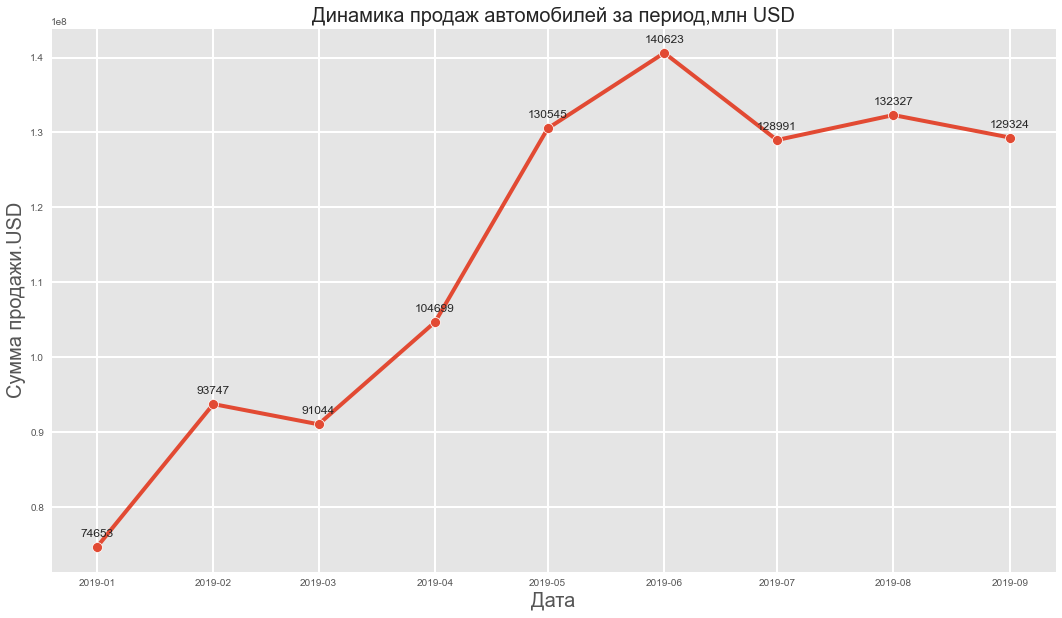

In [159]:
plt.subplots(figsize = (18,10))
sns.lineplot(x='date', y='sale', data = df_3,marker='o',markersize=10,linewidth=4)
# Добавляем текстовую подпись над каждой точкой
for index, row in df_3.iterrows():
    plt.annotate(f"{int(row['sale'] / 1000)}", (row['date'], row['sale']), xytext=(0, 10),
                 textcoords='offset points', ha='center', fontsize=12)
plt.title('Динамика продаж автомобилей за период,млн USD',fontsize=20)
plt.ylabel('Сумма продажи.USD',fontsize=20)
plt.xlabel('Дата',fontsize=20)
plt.grid(visible=True, color='white', linestyle='-', linewidth=2)

plt.show()

По сумме примерно та же динамика.Максимум продаж наблюдается в июне- 140632 тыс. Минимум в январе- 74653 тыс.USD

## Динамика продаж по категориям (помесячно): тип топлива, класс, сегмент

### Тип топлива(`fuel_type`)

In [160]:
df_d1=df.pivot_table(index=['fuel_type','date'], values=['sale'], aggfunc={'sale':'sum'}).\
reset_index().sort_values(by='sale', ascending=False)
df_d1['sale'] = round(df_d1['sale'], 2)
df_d1.head()

,fuel_type,date,sale
41,PET,2019-06-01,1.363179e+08
40,PET,2019-05-01,1.250199e+08
43,PET,2019-08-01,1.247170e+08
44,PET,2019-09-01,1.245801e+08
42,PET,2019-07-01,1.168665e+08


К сожалению,линейные множественные графики Seaborn в данном случае плохо читаемы.Поэтому используем столбчатую диаграмму и библиотеку Plotly

In [161]:
fig = px.bar(df_d1,
             x='date',
             y='sale',
             text='sale',
             labels={'date': 'Дата', 'sale': 'Сумма', 'fuel_type': 'Тип двигателя'},
             color='fuel_type',barmode='group')

fig.update_layout(title='Динамика продаж автомобилей за период в завимимости от типа двигателя',

                   xaxis_title='Дата',
                   yaxis_title='Сумма,USD',
                   template='plotly_dark')
fig.show()

Для наглядности создадим сводную тваблицу и попробуем линейный график Plotly

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> можно и линейную, плотли чем удобно - там лишнее можно отключить на графике + бары не используются для динамики, по классике идут линейные графики (бары сравнение в моменте, например, по категориям за год)</div>

In [162]:
df_d12 =df.pivot_table(index='date', columns='fuel_type',
                             values='sale', aggfunc='sum')
df_d12

fuel_type,DIZ,EL,GAS,HYB,PET
date,,,,,
2019-01-01,3742427.66,0.00,0.0,65201.19,7.084605e+07
2019-02-01,4141039.82,0.00,0.0,112627.97,8.949356e+07
2019-03-01,3820875.27,0.00,0.0,0.00,8.722402e+07
2019-04-01,4551553.79,0.00,0.0,214425.61,9.993331e+07
2019-05-01,5460546.87,0.00,0.0,65004.72,1.250199e+08
2019-06-01,3577494.45,47131.64,0.0,680632.00,1.363179e+08
2019-07-01,6165184.67,0.00,5413492.0,546494.93,1.168665e+08
2019-08-01,7434480.67,0.00,0.0,175824.35,1.247170e+08
2019-09-01,4530379.80,0.00,0.0,214000.98,1.245801e+08


In [163]:

fig = px.line(df_d12)
fig.update_xaxes(title_text='Дата')
fig.update_yaxes(title_text='Продажи')
fig.update_layout(title_text='График продаж по типам топлива')

fig.show()

Безусловно, график продаж авто с бензиновым двигателем (они занимают почти 98% всего рынка)повторяет в динамике график общих продаж.В случае с другими типами двигателя- такой закономерности нет.На линейном графике есть возможность настроить фильтр и посмотреть подробнее.

### Сегмент(`segment`)

In [164]:
df_d2=df.pivot_table(index=['segment','date'], values=['sale'], aggfunc={'sale':'sum'}).\
reset_index().sort_values(by='sale', ascending=False)
df_d2['sale'] = round(df_d2['sale'], 2)
df_d2.head()

,segment,date,sale
8,Внедорожники,2019-09-01,78677979.89
7,Внедорожники,2019-08-01,76441259.10
5,Внедорожники,2019-06-01,75201635.20
6,Внедорожники,2019-07-01,67302996.86
4,Внедорожники,2019-05-01,66788975.78


Используем также Plotly

In [165]:
fig = px.bar(df_d2,
             x='date',
             y='sale',
             text='sale',
             labels={'date': 'Дата', 'sale': 'Сумма', 'segment': 'Cегмент'},
             color='segment',barmode='group')

fig.update_layout(title='Динамика продаж автомобилей за период в завимимости от сегмента',
                   xaxis_title='Дата',
                   yaxis_title='Сумма,USD',
                   template='plotly_dark')
fig.show()

И можно продублировать линейным графиком и сводной таблицей

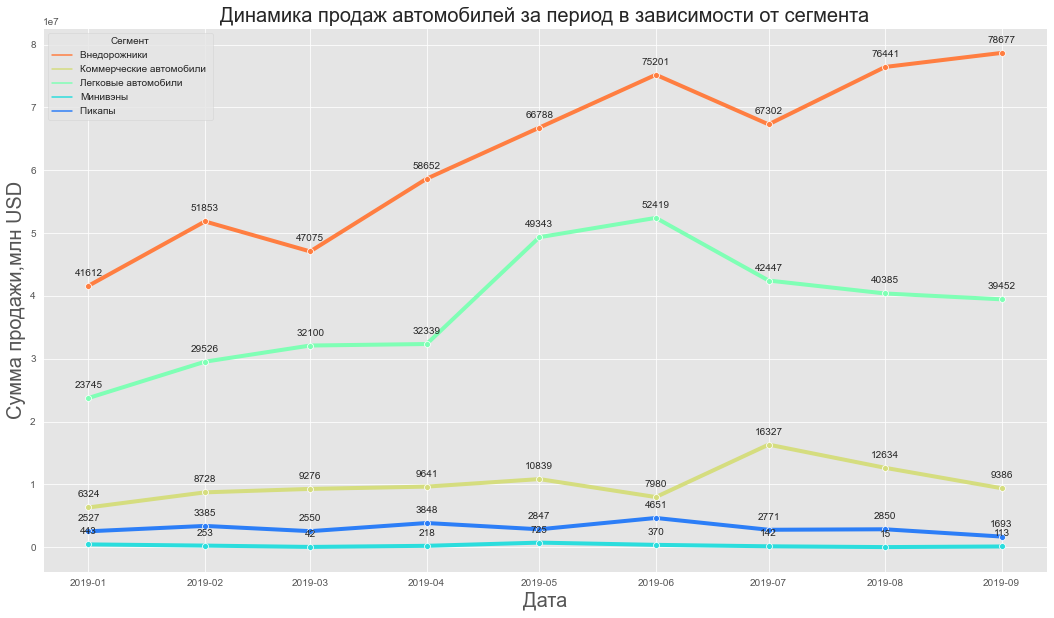

In [166]:
plt.subplots(figsize = (18,10))
sns.lineplot(x='date', y='sale', hue = 'segment', data = df_d2,marker='o',linewidth=4,palette='rainbow_r')
plt.legend(title='Сегмент', loc='upper left')
plt.title('Динамика продаж автомобилей за период в зависимости от сегмента',fontsize=20)
plt.ylabel('Сумма продажи,млн USD',fontsize=20)
plt.xlabel('Дата',fontsize=20)
# Добавляем текстовую подпись над каждой точкой
for index, row in df_d2.iterrows():
    plt.annotate(f"{int(row['sale'] / 1000)}", (row['date'], row['sale']), xytext=(0, 10),
                 textcoords='offset points', ha='center', fontsize=10)
plt.show()

In [167]:
df_d22 =df.pivot_table(index='date', columns='segment',
                             values='sale', aggfunc='sum')
df_d22

segment,Внедорожники,Коммерческие автомобили,Легковые автомобили,Минивэны,Пикапы
date,,,,,
2019-01-01,4.161241e+07,6324458.96,2.374532e+07,443630.92,2527863.55
2019-02-01,5.185356e+07,8728025.66,2.952641e+07,253269.72,3385955.88
2019-03-01,4.707594e+07,9276203.32,3.210015e+07,42376.39,2550224.76
2019-04-01,5.865248e+07,9641016.50,3.233911e+07,218552.15,3848137.78
2019-05-01,6.678898e+07,10839673.49,4.934387e+07,725689.04,2847223.07
2019-06-01,7.520164e+07,7980142.57,5.241951e+07,370525.42,4651298.53
2019-07-01,6.730300e+07,16327932.34,4.244704e+07,142262.70,2771393.65
2019-08-01,7.644126e+07,12634316.97,4.038597e+07,15180.93,2850564.29
2019-09-01,7.867798e+07,9386422.80,3.945295e+07,113694.00,1693469.19


Среди лидеров- внедорожники и легковые автомобили

### Класс(`class`)

In [168]:
df_d3=df.pivot_table(index=['class','date'], values=['sale'], aggfunc={'sale':'sum'}).\
reset_index().sort_values(by='sale', ascending=False)
df_d3['sale'] = round(df_d3['sale'], 2)
df_d3

,class,date,sale
41,E класс,2019-06-01,23968124.17
40,E класс,2019-05-01,22943588.34
125,Полноразмерные SUV,2019-09-01,21340722.95
88,Компактные SUV,2019-08-01,20629141.71
185,Стандартные SUV,2019-06-01,19509124.25
...,...,...,...
72,Компактвэн,2019-01-01,0.00
74,Компактвэн,2019-03-01,0.00
179,Средние автобусы,2019-09-01,0.00
173,Средние автобусы,2019-03-01,0.00


In [169]:
fig = px.bar(df_d3,
             x='date',
             y='sale',
             text='sale',
             labels={'date': 'Дата', 'sale': 'Сумма', 'class': 'Класс'},
             color='class',barmode='group')

fig.update_layout(title='Динамика продаж автомобилей за период в завимимости от класса',
                   xaxis_title='Дата',
                   yaxis_title='Сумма,USD',
                   template='plotly_dark')
fig.show()

Можно выдедить Топ-10 классов по общей сумме прдажи.

In [170]:
df_top_cl = df.groupby('class',as_index=False)['sale'].agg('sum')\
.sort_values(by='sale', ascending=False).reset_index(drop=True).head(10)
df_top_cl

,class,sale
0,Полноразмерные SUV,1.409094e+08
1,Компактные SUV,1.377048e+08
2,B класс,1.311192e+08
3,E класс,1.309989e+08
4,Стандартные SUV,1.285397e+08
5,Среднеразмерные SUV,1.010813e+08
6,C класс,6.478360e+07
7,Субкомпактные SUV,5.537212e+07
8,Малотоннажные грузовики,4.155283e+07
9,Pick-ups,2.712613e+07


## Продажи по регионам

In [171]:
df_r = df.groupby('region',as_index=False)['sale','quantity'].agg('sum')\
.sort_values(by='sale', ascending=False).reset_index(drop=True)
df_r['sale'] = round(df_r['sale'], 2)
df_r

,region,sale,quantity
0,Алматы,3.282458e+08,10577.0
1,Астана,2.268264e+08,7628.0
2,Атырау,6.733085e+07,3091.0
3,Шымкент,5.574821e+07,2684.0
4,Костанай,5.428157e+07,2553.0
5,Караганда,4.914833e+07,2390.0
6,Усть-Каменогорск,3.607996e+07,1794.0
7,Уральск,3.547596e+07,1657.0
8,Актау,3.537570e+07,1713.0
9,Актобе,3.294658e+07,1462.0


In [172]:
df_r1 = df.groupby('region',as_index=False)['quantity'].agg('sum')\
.sort_values(by='quantity', ascending=False).reset_index(drop=True)

df_r1

,region,quantity
0,Алматы,10577.0
1,Астана,7628.0
2,Атырау,3091.0
3,Шымкент,2684.0
4,Костанай,2553.0
5,Караганда,2390.0
6,Усть-Каменогорск,1794.0
7,Актау,1713.0
8,Уральск,1657.0
9,Павлодар,1503.0


In [173]:
fig = px.bar(df_r,
             x='region',
             y='quantity',
             text='quantity',
             color='region',
             height=500,
             width=800
             )
fig.update_layout(title = 'Продажи автомобилей по регионам Казахстана,шт',
                  xaxis_title = 'Количество автомобилей,шт',
                  yaxis_title = 'Название региона',
                  showlegend = False)
fig.show()

In [174]:
fig = px.bar(df_r,
             x='region',
             y='sale',
             text='sale',
             color='region',
             height=500,
             width=800
             )
fig.update_layout(title = 'Продажа автомобилей по регионам Казахстана,USD',
                  xaxis_title = 'Сумма продажи,USD',
                  yaxis_title = 'Название региона',
                  showlegend = False)
fig.show()

Посмотрим продажи по городам в динамике

In [175]:
df_r1 =df.pivot_table(index='date', columns='region',
                             values='sale', aggfunc='sum')
df_r1

region,Аксай,Актау,Актобе,Алматы,Астана,Атырау,Караганда,Кокшетау,Костанай,Кызылорда,Павлодар,Петропавловск,Риддер,Рудный,Семей,Талдыкорган,Тараз,Уральск,Усть-Каменогорск,Шымкент,Щучинск,ЭКСПОРТ,Экибастуз
date,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,2317901.06,2890871.37,23251448.02,15002965.44,5349407.58,3240971.23,485508.44,5258709.60,1348784.97,2231054.28,1089634.33,164836.04,43091.46,513241.51,230854.39,545053.99,3118877.81,2562806.47,3889702.13,9778.65,913183.11,195000.0
2019-02-01,NaN,3623498.39,3082844.90,29485779.40,18627092.20,7356355.27,4496353.04,1092990.86,4849306.77,1528010.11,3200892.10,1444005.40,95325.58,52736.61,517039.24,490428.99,508291.84,3651064.02,3528721.45,5025483.52,NaN,965204.81,125800.0
2019-03-01,NaN,4260184.67,3251497.52,28988585.13,17246885.78,6170480.30,4532692.06,809592.00,4985665.16,1142897.30,2852642.09,1434258.57,144014.21,22756.66,2111946.02,304462.00,626803.07,3508635.29,3023229.47,4610213.96,NaN,894955.74,122500.0
2019-04-01,NaN,3091207.46,2528326.88,33586404.43,22821538.28,6190188.83,5859313.12,1222203.48,6596785.99,1436133.07,2381124.87,1347659.24,94355.90,86204.44,668258.85,400191.98,690771.30,3793904.35,4790887.06,5229129.94,NaN,1637799.70,246900.0
2019-05-01,NaN,4360726.02,3978603.62,42085493.76,27459815.64,9649113.80,6245623.64,1057410.59,9038411.97,1771552.31,3945565.30,1404102.64,18596.81,12187.24,519936.43,505632.17,1151098.25,4217099.13,4791016.32,6121223.09,NaN,2072625.55,139600.0
2019-06-01,NaN,4715290.29,4427134.12,46902066.69,31464038.71,8166180.02,7784963.82,1014497.21,6586206.88,1876348.54,4836796.30,1227446.80,43129.60,47595.80,718321.03,1493633.58,1196639.09,4664626.49,4616133.78,6646068.54,NaN,2017797.62,178200.0
2019-07-01,NaN,5053963.69,4779617.01,37593411.44,32024692.94,7607950.49,5485944.85,1143274.37,5317188.79,1797999.62,4819536.84,1553385.99,NaN,69699.66,724229.30,453169.20,1302525.35,3951476.15,4855817.07,8216528.17,NaN,1977612.68,263600.0
2019-08-01,274153.11,4150684.30,4006802.85,45077128.15,28067203.78,7812911.41,5896610.54,911805.15,6268185.41,1700548.76,3869763.40,1609178.81,NaN,67205.04,1134879.55,415298.71,767920.45,4795545.83,4359386.47,9253566.57,66717.68,1662396.28,159400.0
2019-09-01,NaN,3802246.63,4000877.83,41275480.28,34112213.12,9028263.95,5605861.47,1012296.25,5381108.79,1071268.44,3614526.36,1196664.03,NaN,43612.68,1368876.48,390028.34,531694.83,3774726.04,3551958.63,6756292.76,NaN,2604621.48,201900.0


In [176]:
fig = go.Figure(data=go.Heatmap(
    x=df_r1.columns,
    y=df_r1.index,
    z=df_r1.values,
    colorscale='Viridis'))

fig.update_layout(
    title='Продажи по регионам',
    xaxis_title='Регион',
    yaxis_title='Дата',
    width=800,
    height=600)

fig.show()

Лидеры по городам:
    
1   Алматы	  328245.8 тыс USD	       10577 шт

2	Астана	  226826.4 тыс USD	        7628 шт

3	Атырау	  67330.8  тыс USD	        3091 шт

4	Шымкент	  557482.1 тыс USD	        2684 шт

5	Костанай  542815.7 тыс USD	        2553 шт

6	Караганда 491483.3 тыс USD          2390 шт

## Продажи по автоцентрам(`company`)

In [177]:
df_c = df.groupby('company',as_index=False)['sale','quantity'].agg('sum')\
.sort_values(by='sale', ascending=False).reset_index(drop=True)
df_c['sale'] = round(df_c['sale'])
df_c['%sale'] = (df_c['sale']/df_c['sale'].sum() * 100).round(3)
df_c['%quantity'] = (df_c['quantity']/df_c['quantity'].sum() * 100).round(2)
df_c

,company,sale,quantity,%sale,%quantity
0,Toyota Motor Kazakhstan,467160156.0,10425.0,45.534,25.59
1,БИПЭК АВТО,151241688.0,12510.0,14.742,30.71
2,Astana Motors,128815367.0,5779.0,12.556,14.19
3,Вираж,58116987.0,3358.0,5.665,8.24
4,Nissan Manufacturing RUS,43263539.0,1739.0,4.217,4.27
5,Allur Auto,28064063.0,1304.0,2.735,3.20
6,Mercur Auto,24323357.0,723.0,2.371,1.77
7,Автоцентр-Бавария,24235302.0,388.0,2.362,0.95
8,Subaru Kazakhstan,17311553.0,520.0,1.687,1.28
9,УзАвто-Казахстан,17149091.0,1727.0,1.672,4.24


Топ-10 Автоцентров по сумме продажи

In [178]:
df_c_top = df_c.head(10)
df_c_top

,company,sale,quantity,%sale,%quantity
0,Toyota Motor Kazakhstan,467160156.0,10425.0,45.534,25.59
1,БИПЭК АВТО,151241688.0,12510.0,14.742,30.71
2,Astana Motors,128815367.0,5779.0,12.556,14.19
3,Вираж,58116987.0,3358.0,5.665,8.24
4,Nissan Manufacturing RUS,43263539.0,1739.0,4.217,4.27
5,Allur Auto,28064063.0,1304.0,2.735,3.20
6,Mercur Auto,24323357.0,723.0,2.371,1.77
7,Автоцентр-Бавария,24235302.0,388.0,2.362,0.95
8,Subaru Kazakhstan,17311553.0,520.0,1.687,1.28
9,УзАвто-Казахстан,17149091.0,1727.0,1.672,4.24


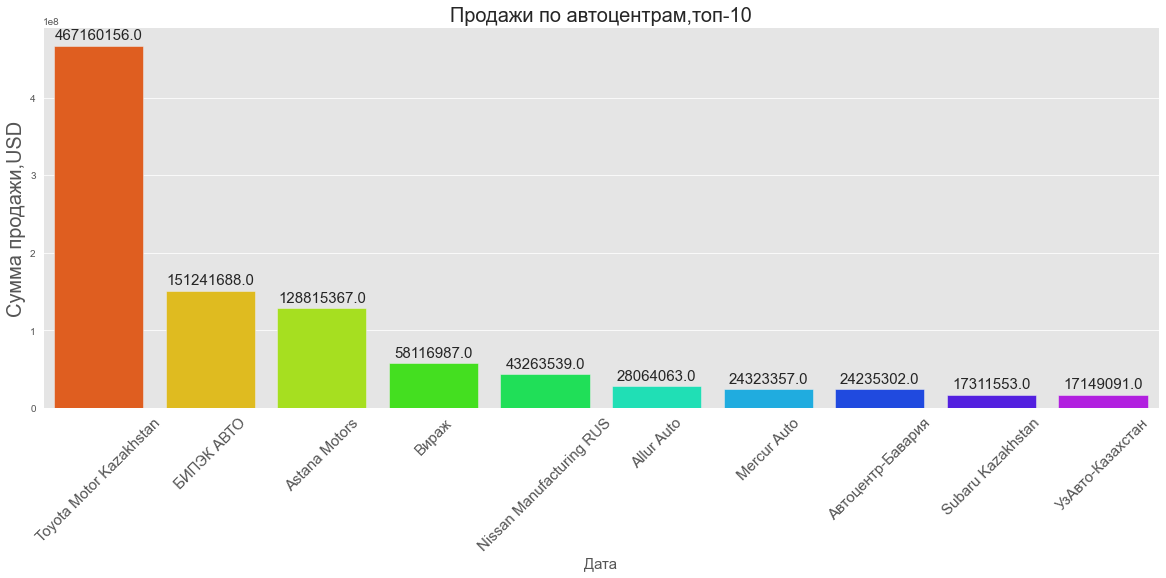

In [179]:
plt.figure(figsize=[20,7])
ax=sns.barplot(data=df_c_top, x="company", y="sale",palette='gist_rainbow')
ax.axes.set_title('Продажи по автоцентрам,топ-10',fontsize=20)
ax.set_xlabel('Дата',fontsize=15)
ax.set_ylabel('Сумма продажи,USD',fontsize=20)
for bar in ax.patches:
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0,10),
                   textcoords='offset points')
plt.xticks(rotation=45,fontsize=15)
ax.yaxis.grid(True)

In [180]:
df_c_top1 = df.groupby('company',as_index=False)['quantity'].agg('sum')\
.sort_values(by='quantity', ascending=False).reset_index(drop=True).head(10)
df_c_top1

,company,quantity
0,БИПЭК АВТО,12510.0
1,Toyota Motor Kazakhstan,10425.0
2,Astana Motors,5779.0
3,Вираж,3358.0
4,Nissan Manufacturing RUS,1739.0
5,УзАвто-Казахстан,1727.0
6,Allur Auto,1304.0
7,Mercur Auto,723.0
8,Renault Россия,633.0
9,Лифан Моторс Рус,566.0


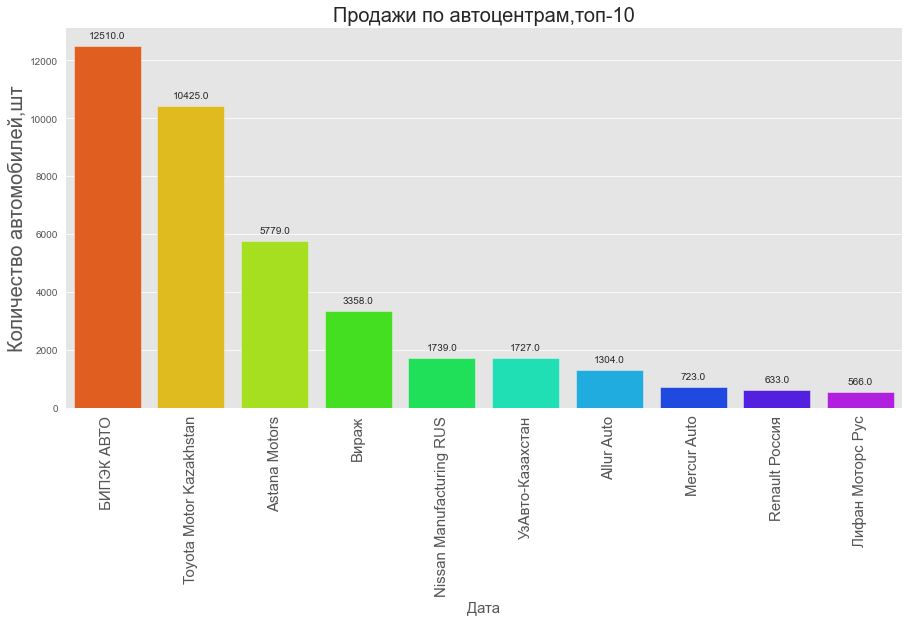

In [181]:
plt.figure(figsize=[15,7])
ax=sns.barplot(data=df_c_top1, x="company", y="quantity",palette='gist_rainbow')
ax.axes.set_title('Продажи по автоцентрам,топ-10',fontsize=20)
ax.set_xlabel('Дата',fontsize=15)
ax.set_ylabel('Количество автомобилей,шт',fontsize=20)
for bar in ax.patches:
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0,10),
                   textcoords='offset points')
plt.xticks(rotation=90,fontsize=15)
ax.yaxis.grid(True)

In [182]:
df_10 =df.pivot_table(index='date', columns='company',
                             values='sale', aggfunc='sum')
df_10

company,Allur Auto,Astana Motors,Autokapital,Daewoo Bus Kazakhstan,Eurasia Motor Premium,Hyundai Com Trans Kazakhstan,Jaguar Land Rover,Mercur Auto,Nissan Manufacturing RUS,Renault Россия,SMC,Scandinavian Motors,Scania Central Asia,Sivi Finance Consulting,Subaru Kazakhstan,Toyota Motor Kazakhstan,Автоцентр-Бавария,Алматы АТО,БИПЭК АВТО,Вираж,Каспиан Моторс,Лифан Моторс Рус,ММС Рус,СВС,ТК Рос-Авто,УзАвто-Казахстан,Хино Моторс Казахстан
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1974426.84,6151454.02,238344.59,NaN,NaN,NaN,NaN,1984518.71,2532576.59,NaN,NaN,NaN,NaN,415625.0,1223049.51,35666692.72,2006906.54,14886.53,11121641.25,4206827.09,120318.03,540305.38,854980.34,333189.40,NaN,4827456.88,440482.46
2019-02-01,2012318.79,13230003.61,369225.30,922949.27,184376.00,NaN,NaN,1643826.99,3548581.14,NaN,NaN,NaN,NaN,NaN,1601183.86,39987145.66,2523779.21,NaN,13982829.50,5809734.75,225965.74,633938.98,615669.50,440131.38,93906.25,5148555.43,773103.14
2019-03-01,1946033.24,13655173.24,171909.78,1562220.24,116932.65,NaN,NaN,1646161.65,4961260.40,1489268.76,NaN,217242.41,NaN,NaN,1441420.99,30992037.86,2764653.99,NaN,15521629.50,6497630.92,748131.24,892880.37,1991849.00,82632.41,33873.05,3862437.66,449517.64
2019-04-01,2784132.64,11291382.30,331005.02,1000837.62,197088.02,NaN,NaN,3625123.68,3366085.21,1099165.79,NaN,214843.93,NaN,NaN,2472130.58,44704567.29,2979873.32,NaN,17689006.00,7393254.46,1295416.44,808960.64,1075690.22,NaN,53595.62,2115423.25,201707.14
2019-05-01,2820538.09,18531921.67,687670.89,2081492.10,114283.97,685978.11,91915.49,3801603.16,4170266.52,1610123.42,NaN,NaN,NaN,NaN,1977996.52,64737257.55,2612705.33,NaN,15682770.75,6970520.25,428556.39,1102618.49,1535179.90,NaN,33060.07,709487.44,159488.17
2019-06-01,1793822.03,16810648.28,1477896.16,409529.57,302985.08,1281867.41,NaN,3937746.58,6021104.34,1581789.72,NaN,380137.47,NaN,NaN,1663949.08,71756817.75,3615615.63,NaN,19361782.75,6183472.33,165970.66,1290409.12,2117115.01,NaN,NaN,314555.98,155899.96
2019-07-01,7805218.08,15125329.36,2028595.34,288845.80,429855.07,2054737.29,NaN,1628563.35,4921278.21,NaN,NaN,432861.09,826438.15,NaN,2774130.71,59034762.80,2530136.47,NaN,20616106.50,5848687.18,135014.28,668775.85,1382823.44,NaN,113513.97,158992.71,186957.96
2019-08-01,6214737.04,16193491.21,2747962.84,492577.03,389256.22,1331468.77,NaN,2441936.33,5970230.07,1332931.07,22127.19,173656.45,215670.10,NaN,2341532.94,59289275.30,3724234.14,NaN,18055215.70,8340190.94,59863.02,1165993.38,1741322.16,NaN,NaN,12181.16,71439.19
2019-09-01,712836.74,17825963.29,2064753.13,2471167.53,463911.86,NaN,NaN,3613876.80,7772156.86,1222965.55,NaN,73614.81,NaN,NaN,1816159.26,60991599.42,1477396.96,NaN,19210706.25,6866669.35,22790.06,835128.30,1807132.22,NaN,NaN,NaN,75690.00


In [183]:
fig = go.Figure(data=go.Heatmap(
    x=df_10.columns,
    y=df_10.index,
    z=df_10.values,
    colorscale='Viridis'))

fig.update_layout(
    title='Продажи по автоцентрам',
    xaxis_title='Регион',
    yaxis_title='Дата',
    width=950,
    height=700)

fig.show()

На рынке Казахстана стоит выделить тройку лидеров :

|Дилер|Сумма продажи,USD|Кол-во авто|Доля продаж по сумме %|Доля продаж по количеству|
|----------------------:|-------------:|:------------|:--------------|:--------------|
|Toyota Motor Kazakhstan|467160156.0|10425|45.53|25.59|
|БИПЭК АВТО|151241688.0|12510|14.74|30.71|
|Astana Motors|128815367.0|5779|12.55|14.19|
|Вираж|58116987.0|3358|5.665|8.24|
|Nissan Manufacturing RUS|43263539.0|1739|4.217|4.27|
|Allur Auto|28064063.0|1304|2.735|3.20|
|Mercur Auto|24323357.0|723|2.371|1.77|
|Автоцентр-Бавария|24235302.0|388|2.362|0.95|

Меркур Авто  на 7 месте по сумме продаж и  по числу проданых авто

## Сводные таблицы:  объем продаж по бренду и классу авто

In [184]:
df_br1 =df.pivot_table(index='class', columns='brand',
                             values='sale', aggfunc='sum').reset_index()
df_br1

brand,class,ANKAI,Audi,BMW,Cadillac,Chevrolet,Daewoo,Ford,GAZ,Hino,Hyundai,Hyundai Truck & Bus,Infiniti,Isuzu,Iveco,Jac,Kia,Lada,Land Rover,Lexus,Lifan,MAN,Mercedes-Benz,Mercedes-Benz Trucks,Mini,Mitsubishi,Nissan,Peugeot,Porsche,Ravon,Renault,Rolls Royce,Scania,Skoda,SsangYong,Subaru,Suzuki,Toyota,UAZ,Volkswagen,Volvo,МАЗ
0,A класс,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21800.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1432832.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.0
1,B класс,0.0,0.00,47131.64,0.0,1040600.00,0.00,469870.60,0.00,0.00,22485824.65,0.00,0.00,0.00,0.00,0.00,6169500.0,72639615.45,0.00,0.00,2406833.11,0.00,0.00,0.00,69859.96,0.00,0.00,1528874.35,0.00,14908025.88,1557105.87,0.00,0.00,2015500.00,0.00,0.00,0.00,0.000000e+00,0.00,5780446.55,0.00,0.0
2,C класс,0.0,92276.95,66987.59,0.0,0.00,0.00,1062419.47,0.00,0.00,22713012.39,0.00,0.00,0.00,0.00,0.00,4673500.0,0.00,0.00,0.00,809015.53,0.00,0.00,0.00,0.00,0.00,6085221.69,0.00,0.00,808231.73,1023299.23,0.00,0.00,3122900.00,0.00,0.00,0.00,2.270110e+07,0.00,1625634.79,0.00,0.0
3,D класс,0.0,48343.98,587240.02,0.0,0.00,0.00,204543.27,0.00,0.00,0.00,0.00,634400.00,0.00,0.00,0.00,1988800.0,0.00,0.00,0.00,297173.12,0.00,196120.58,0.00,0.00,0.00,0.00,26568.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,334473.01,0.00,0.000000e+00,0.00,244696.64,0.00,0.0
4,E класс,0.0,2472570.48,3380971.69,0.0,0.00,0.00,0.00,0.00,0.00,730326.10,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2392058.53,0.00,0.00,576993.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5231472.75,0.00,0.00,0.00,1.158829e+08,0.00,0.00,331634.39,0.0
5,F класс,0.0,1160348.75,2293255.40,0.0,0.00,0.00,0.00,0.00,0.00,103249.23,0.00,0.00,0.00,0.00,0.00,92000.0,0.00,0.00,1442228.15,0.00,0.00,529379.33,0.00,0.00,0.00,0.00,0.00,2085443.49,0.00,0.00,498787.51,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.0
6,Pick-ups,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,773320.78,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.493188e+07,1137966.35,282967.58,0.00,0.0
7,Большие автобусы,5413492.0,0.00,0.00,0.0,0.00,9229619.16,0.00,0.00,0.00,0.00,1840326.62,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.0
8,Компактвэн,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,128400.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.0
9,Компактные SUV,0.0,0.00,10857870.18,0.0,0.00,0.00,1067277.37,0.00,0.00,50180886.17,0.00,778935.36,0.00,0.00,12745344.99,14138100.0,0.00,48189.99,20316348.36,0.00,0.00,1304767.32,0.00,353559.12,863537.21,10952899.04,56915.15,758665.05,0.00,6039074.77,0.00,0.00,0.00,158237.68,4159394.12,28150.00,0.000000e+00,0.00,2837790.27,58819.12,0.0


In [185]:
df_br1_long = df_br1.melt(id_vars='class', var_name='brand', value_name='sale')
df_br1_long['sale'] =df_br1_long['sale'].astype(int)
fig = go.Figure(data=go.Scatter(
    x=df_br1_long['brand'],
    y=df_br1_long['class'],
    mode='markers',
    text=df_br1_long['sale'],
    marker=dict(
        size=df_br1_long['sale'],
        sizemode='area',
        sizeref=2. * max(df_br1_long['sale']) / (40. ** 2),
        sizemin=4,
        color=df_br1_long['sale'],
        colorscale='rainbow',
        showscale=True
    )
))

fig.update_layout(
    title='Объем продаж по бренду и классу авто',
    xaxis_title='Бренд',
    yaxis_title='Класс',
    width=1000,
    height=700
)

fig.show()

По объему продаж по бренду и классу авто отметить безусловных лидеров:Toyota E класс,Lada  Вкласс и Toyota Полноразмерные и стпндартные SUV



### **ВЫВОДЫ:**

**бренды**

- По числу продаваемых авто лидеры:
1 Lada -9638

2 Toyota -9374

3 Hyundai -5703

- Однако в денежном эквиваленте немного другая картина:

1 Toyota 383875.2 тыс USD

2 Hyundai 124847.2 тыс USD

3 Lada 93870.6 тыс USD

- Общая сумма продажи за рассматриваемый период,USD: 1025957075.99

- Общее число проданных автомобилей: 40738 шт

**Динамика продаж**

- По числу продаваемых автомобилей : наблюдается рост продаж с апреля,максимум приходится на июнь.Далее происходит небодьшой спад в июле .Затем рост в августе и к осени начинается спад.По сумме примерно та же динамика.Максимум продаж наблюдается в июне- 140632 тыс. Минимум в январе- 74653 тыс.USD
- график продаж авто с бензиновым двигателем (они занимают почти 98% всего рынка)повторяет в динамике график общих продаж.В случае с другими типами двигателя- такой закономерности нет.На линейном графике есть возможность настроить фильтр и посмотреть подробнее.

- Среди лидеров по сегменту- внедорожники и легковые автомобили

- Определены Топ-10 классов по общей сумме прдажи.(см п.5.4.3)

 **Лидеры по городам:**
    
1   Алматы	  328245.8 тыс USD	       10577 шт

2	Астана	  226826.4 тыс USD	        7628 шт

3	Атырау	  67330.8  тыс USD	        3091 шт

4	Шымкент	  557482.1 тыс USD	        2684 шт

5	Костанай  542815.7 тыс USD	        2553 шт

6	Караганда 491483.3 тыс USD          2390 шт

- На рынке Казахстана среди дилеров стоит выделить тройку лидеров :

|Дилер|Сумма продажи,USD|Кол-во авто|Доля продаж по сумме %|Доля продаж по количеству|
|----------------------:|-------------:|:------------|:--------------|:--------------|
|Toyota Motor Kazakhstan|467160156.0|10425|45.53|25.59|
|БИПЭК АВТО|151241688.0|12510|14.74|30.71|
|Astana Motors|128815367.0|5779|12.55|14.19|

Меркур Авто  на 6 месте по сумме продаж и на 7 по числу проданых авто

- По объему продаж по бренду и классу авто отметить безусловных лидеров:Toyota E класс,Lada  Вкласс и Toyota Полноразмерные и стандартные SUV

**В результате анализа можно назвать безусловным лидером бренд Toyota,дилер-Toyota Motor Kazakhstan,город-Алматы .Ближайшие конуренты - БИПЭК АВТО и Astana Motors с брендами Lada и Hyundai**

# Расчет показателей для Меркур Авто

Выделим в отдельный датафрейм данные по дилеру Mercur Auto

In [186]:
df_merc = df.query('company=="Mercur Auto"')
df_merc

,company,brand,model,year_of_release,country,fuel_type,engine_volume,transmission,drive_type,region,customer_type,quantity,price,sale,area,segment,class,date,volume_cat
1,Mercur Auto,Audi,A3,2018,DEU,PET,1.4,автомат,FWD,Алматы,Физ. Лицо,1.0,30581.00,30581.00,г.Алматы,Легковые автомобили,C класс,2019-05-01,small
2,Mercur Auto,Audi,A3,2018,DEU,PET,1.4,автомат,FWD,Алматы,Физ. Лицо,1.0,35087.72,35087.72,г.Алматы,Легковые автомобили,C класс,2019-06-01,small
3,Mercur Auto,Audi,A3,2017,DEU,PET,1.4,автомат,FWD,Алматы,Физ. Лицо,1.0,26608.23,26608.23,г.Алматы,Легковые автомобили,C класс,2019-07-01,small
4,Mercur Auto,Audi,A4,2017,DEU,PET,2.0,автомат,4WD,Алматы,Юр. Лицо,1.0,48343.98,48343.98,г.Алматы,Легковые автомобили,D класс,2019-07-01,average
5,Mercur Auto,Audi,A5,2017,DEU,PET,2.0,автомат,4WD,Алматы,Юр. Лицо,1.0,52760.74,52760.74,г.Алматы,Легковые автомобили,Спортивные автомобили,2019-06-01,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32007,Mercur Auto,Volkswagen,Touareg,2017,DEU,PET,3.0,автомат,4WD,Алматы,Физ. Лицо,2.0,56970.76,113941.51,г.Алматы,Внедорожники,Стандартные SUV,2019-04-01,average
32008,Mercur Auto,Volkswagen,Touareg,2017,DEU,DIZ,3.0,автомат,4WD,Алматы,Физ. Лицо,1.0,56380.09,56380.09,г.Алматы,Внедорожники,Стандартные SUV,2019-05-01,average
32009,Mercur Auto,Volkswagen,Touareg,2017,DEU,DIZ,3.0,автомат,4WD,Алматы,Юр. Лицо,1.0,56684.85,56684.85,г.Алматы,Внедорожники,Стандартные SUV,2019-05-01,average
32010,Mercur Auto,Volkswagen,Touareg,2018,DEU,DIZ,3.0,автомат,4WD,Алматы,Физ. Лицо,1.0,55046.42,55046.42,г.Алматы,Внедорожники,Стандартные SUV,2019-06-01,average


Предварительно посмотрим,какой тип клиента преобладает у Меркур Авто

In [187]:
df_merc['customer_type'].value_counts()

Физ. Лицо     514
Юр. Лицо       76
неизвестно      7
Name: customer_type, dtype: int64

Есть небольшое число "неизвестных" продаж.Посмотрим что это

In [188]:

df_merc.query("customer_type == 'неизвестно'")

,company,brand,model,year_of_release,country,fuel_type,engine_volume,transmission,drive_type,region,customer_type,quantity,price,sale,area,segment,class,date,volume_cat
31258,Mercur Auto,Volkswagen,Jetta,2017,RUS,PET,1.6,автомат,2WD,Караганда,неизвестно,1.0,24301.43,24301.43,Карагандинская область,Легковые автомобили,C класс,2019-01-01,small
31374,Mercur Auto,Volkswagen,Polo,2017,RUS,PET,1.6,автомат,2WD,Караганда,неизвестно,1.0,17423.66,17423.66,Карагандинская область,Легковые автомобили,B класс,2019-01-01,small
31377,Mercur Auto,Volkswagen,Polo,2017,RUS,PET,1.6,автомат,2WD,Караганда,неизвестно,1.0,17026.28,17026.28,Карагандинская область,Легковые автомобили,B класс,2019-01-01,small
31379,Mercur Auto,Volkswagen,Polo,2017,RUS,PET,1.6,автомат,2WD,Караганда,неизвестно,2.0,16353.79,32707.58,Карагандинская область,Легковые автомобили,B класс,2019-01-01,small
31386,Mercur Auto,Volkswagen,Polo,2017,RUS,PET,1.6,механика,2WD,Караганда,неизвестно,1.0,14886.53,14886.53,Карагандинская область,Легковые автомобили,B класс,2019-01-01,small
31390,Mercur Auto,Volkswagen,Polo,2017,RUS,PET,1.6,механика,2WD,Караганда,неизвестно,1.0,14366.88,14366.88,Карагандинская область,Легковые автомобили,B класс,2019-01-01,small
31879,Mercur Auto,Volkswagen,Tiguan,2017,RUS,PET,2.0,автомат,4WD,Караганда,неизвестно,1.0,36375.72,36375.72,Карагандинская область,Внедорожники,Компактные SUV,2019-01-01,average


In [189]:
df_merc.query('brand=="Volkswagen"').groupby(['brand','model','customer_type']).agg({'quantity':['count','unique',mode]}).sort_values(by='model', ascending=False).reset_index()

brand               model customer_type quantity  \
                                                    count   
0   Volkswagen  Transporter Kasten      Юр. Лицо        1   
1   Volkswagen             Touareg      Юр. Лицо        1   
2   Volkswagen             Touareg     Физ. Лицо        4   
3   Volkswagen              Tiguan    неизвестно        1   
4   Volkswagen              Tiguan      Юр. Лицо        8   
5   Volkswagen              Tiguan     Физ. Лицо       61   
6   Volkswagen                Polo      Юр. Лицо       19   
7   Volkswagen                Polo    неизвестно        5   
8   Volkswagen                Polo     Физ. Лицо      254   
9   Volkswagen           Passat B8      Юр. Лицо        2   
10  Volkswagen           Passat B8     Физ. Лицо        3   
11  Volkswagen            Multivan      Юр. Лицо        1   
12  Volkswagen            Multivan     Физ. Лицо        2   
13  Volkswagen               Jetta    неизвестно        1   
14  Volkswagen               Jetta      Юр. Лицо       16   
15  Volkswagen               Jetta     Физ. Лицо       51   
16  Volkswagen              Amarok      Юр. Лицо        2   
17  Volkswagen              Amarok     Физ. Лицо        3   

                                                                      
                                              unique            mode  
0                                              [1.0]    ([1.0], [1])  
1                                              [1.0]    ([1.0], [1])  
2                                         [1.0, 2.0]    ([1.0], [3])  
3                                              [1.0]    ([1.0], [1])  
4                                              [1.0]    ([1.0], [8])  
5                                    [1.0, 6.0, 4.0]   ([1.0], [59])  
6   [1.0, 8.0, 2.0, 10.0, 5.0, 7.0, 6.0, 18.0, 20.0]    ([1.0], [9])  
7                                         [1.0, 2.0]    ([1.0], [4])  
8                          [1.0, 2.0, 3.0, 6.0, 5.0]  ([1.0], [240])  
9                                         [2.0, 1.0]    ([1.0], [1])  
10                                        [1.0, 2.0]    ([1.0], [2])  
11                                             [2.0]    ([2.0], [1])  
12                                             [1.0]    ([1.0], [2])  
13                                             [1.0]    ([1.0], [1])  
14                              [1.0, 3.0, 4.0, 5.0]   ([1.0], [13])  
15                                        [1.0, 2.0]   ([1.0], [50])  
16                                             [1.0]    ([1.0], [2])  
17                                             [1.0]    ([1.0], [3])

И хотя аналогичные продажи,как видим совершают и юр.лица и физ.лица.Чаще это все-таки физические лица.Отнесем неизвестных к ним.Стоит заметить,что дилер продает некоторые модели больше 1 физ.лицам и наоборот есть и продажи по 1 автомобилю юр.лицу.Поэтому я считаю не стоит смотреть продажи дилера в разрезе типа клиента.

In [190]:
df_merc = df_merc.replace({'customer_type':{'неизвестно':'Физ. Лицо'}})

In [191]:
df_cus = df_merc.groupby('customer_type')['sale'].sum().sort_values(ascending=False).reset_index()
df_cus

,customer_type,sale
0,Физ. Лицо,20047210.30
1,Юр. Лицо,4276146.95


In [192]:
fig = go.Figure()
data = [go.Pie(labels=df_cus['customer_type'], values=df_cus['sale'])]

fig.add_trace(data[0])
fig.update_layout(title='Продажи по типам клиентов')
#plotly.offline.iplot(fig, filename='pie-plot.html')
fig.update_traces(textposition='inside', textinfo='percent+value+label ')

У Меркур Авто 82.4% подаж приходится на продажи физ.лицам. 17.6% соответственно юр.лицам.

Додавим столбец с прибылью

**По информации от заказчика:доход дилера от Порше и Ауди процента 3 с машины
Вольксваген - 5**



In [193]:
df_merc['profit'] = df_merc.apply(lambda row: row['sale'] * 0.05 if row['brand'] == 'Volkswagen' else row['sale'] * 0.03, axis=1)
df_merc['profit'] = (df_merc['profit']).round(2)

In [194]:
df_merc.head()

,company,brand,model,year_of_release,country,fuel_type,engine_volume,transmission,drive_type,region,customer_type,quantity,price,sale,area,segment,class,date,volume_cat,profit
1,Mercur Auto,Audi,A3,2018,DEU,PET,1.4,автомат,FWD,Алматы,Физ. Лицо,1.0,30581.00,30581.00,г.Алматы,Легковые автомобили,C класс,2019-05-01,small,917.43
2,Mercur Auto,Audi,A3,2018,DEU,PET,1.4,автомат,FWD,Алматы,Физ. Лицо,1.0,35087.72,35087.72,г.Алматы,Легковые автомобили,C класс,2019-06-01,small,1052.63
3,Mercur Auto,Audi,A3,2017,DEU,PET,1.4,автомат,FWD,Алматы,Физ. Лицо,1.0,26608.23,26608.23,г.Алматы,Легковые автомобили,C класс,2019-07-01,small,798.25
4,Mercur Auto,Audi,A4,2017,DEU,PET,2.0,автомат,4WD,Алматы,Юр. Лицо,1.0,48343.98,48343.98,г.Алматы,Легковые автомобили,D класс,2019-07-01,average,1450.32
5,Mercur Auto,Audi,A5,2017,DEU,PET,2.0,автомат,4WD,Алматы,Юр. Лицо,1.0,52760.74,52760.74,г.Алматы,Легковые автомобили,Спортивные автомобили,2019-06-01,average,1582.82


## Прибыль и выручка

### За период: общая прибыль, прибыль по брендам, средняя стоимость продажи за период, средняя стоимость в разбивке по маркам



In [195]:
print('Общая сумма продажи,USD:',df_merc['sale'].sum())

Общая сумма продажи,USD: 24323357.25


In [196]:
print('Средняя стоимость продажи за период,USD:',round(df_merc['sale'].mean(),2))

Средняя стоимость продажи за период,USD: 40742.64


!!!Продажа в моем понимании- это одна покупка,одним клиентом.И она может содержать от 1 до нескольких автомобилей.

In [197]:
print('Средняя стоимость автомобиля за период,USD:',round(df_merc['price'].mean(),2))

Средняя стоимость автомобиля за период,USD: 36680.71


In [198]:


print('Общая прибыль за период,USD:',round(df_merc['profit'].sum(),2))

Общая прибыль за период,USD: 958718.83


In [199]:
df_mb1 = (df_merc
         .pivot_table(index='brand', values='sale', aggfunc=('count','sum','mean'))
         .reset_index()
         .sort_values(by='count', ascending=False)
        )
#переименуем столбцы
df_mb1.columns = ['brand', 'count_sale', 'mean_sale','sum_sale']
df_mb1['mean_sale'] = (df_mb1['mean_sale']).round(2)
df_mb1['%']= (df_mb1['sum_sale']/df_mb1['sum_sale'].sum()* 100).round(2)
df_mb1

,brand,count_sale,mean_sale,sum_sale,%
2,Volkswagen,435,26323.91,11450900.37,47.08
0,Audi,102,62010.52,6325072.56,26.00
1,Porsche,60,109123.07,6547384.32,26.92


In [200]:
df_mb2 = (df_merc
         .pivot_table(index='brand', values='profit', aggfunc=('count','sum','mean'))
         .reset_index()
         .sort_values(by='count', ascending=False)
        )
#переименуем столбцы
df_mb2.columns = ['brand', 'count_sale', 'mean_profit','profit']
df_mb2['mean_profit'] = (df_mb2['mean_profit']).round(2)
df_mb2['%']= (df_mb2['profit']/df_mb2['profit'].sum()* 100).round(2)

df_mb2

,brand,count_sale,mean_profit,profit,%
2,Volkswagen,435,1316.20,572545.09,59.72
0,Audi,102,1860.32,189752.21,19.79
1,Porsche,60,3273.69,196421.53,20.49


In [201]:
df_mb12 = (df_merc
         .pivot_table(index='brand', values='quantity', aggfunc=('count','sum'))
         .reset_index()
         .sort_values(by='count', ascending=False)
        )
df_mb12

,brand,count,sum
2,Volkswagen,435,558.0
0,Audi,102,105.0
1,Porsche,60,60.0


Дилер торгует тремя марками:Volkswagen,Audi,Porsche
    
- 47.08% продаж приходится на Volkswagen, остальное почти поровну на 2 другие марки.
Однако прибыль 59.72% поступает от Volkswagen и оставшиеся делят такзе 2 другие марки.

### Помесячно: ежемесячная, ежемемесячная прибыль по брендам, ежемесячная средняя стоимость продажи, ежемесячная стоимость продажи в разбивке по маркам

#### Ежемесячные продажи и ежемесячная средняя стоимость продажи

In [202]:
df_m3 =df_merc.pivot_table(index='date',
                             values='sale', aggfunc=('count','sum','mean')).reset_index().sort_values(by='date', ascending=True)

#переименуем столбцы
df_m3.columns = ['date', 'count_sale', 'mean_sale','sale']
df_m3['mean_sale'] = (df_m3['mean_sale']).round(2)

df_m3

,date,count_sale,mean_sale,sale
0,2019-01-01,52,38163.82,1984518.71
1,2019-02-01,22,74719.41,1643826.99
2,2019-03-01,46,35786.12,1646161.65
3,2019-04-01,103,35195.38,3625123.68
4,2019-05-01,89,42714.64,3801603.16
5,2019-06-01,85,46326.43,3937746.58
6,2019-07-01,20,81428.17,1628563.35
7,2019-08-01,59,41388.75,2441936.33
8,2019-09-01,121,29866.75,3613876.80


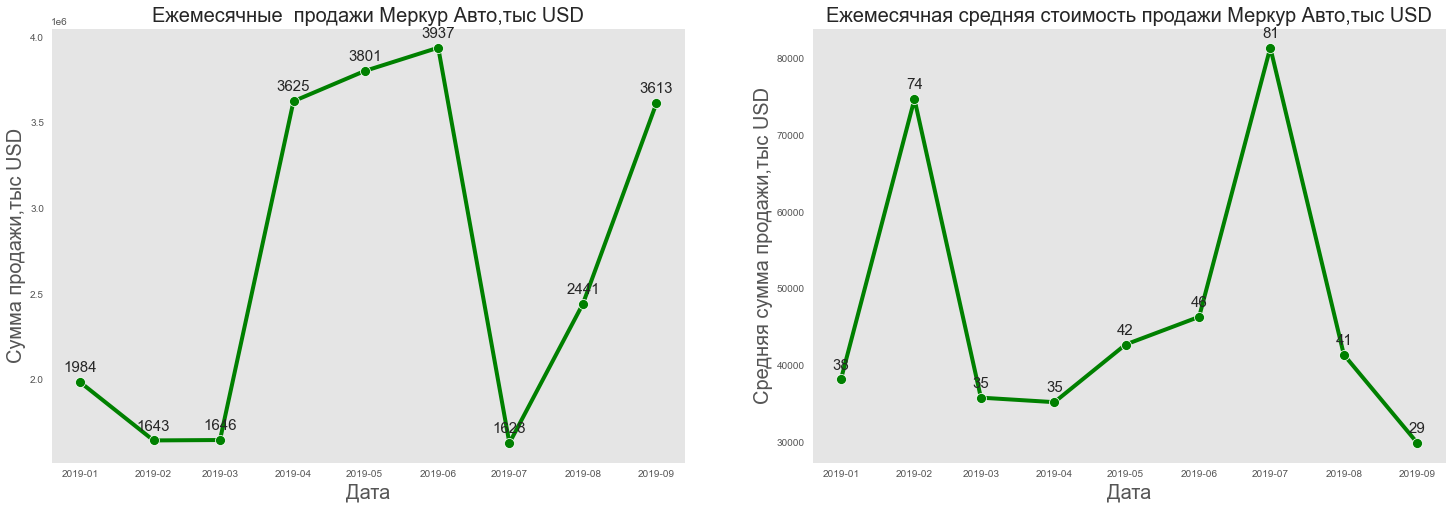

In [203]:
#plt.figure(figsize=(25,10)) # Задаем размер графиков

#fig, ax = plt.subplots(1,2)
plt.subplots(figsize = (25,8))
sns.lineplot(x="date",
             y="sale",
             data = df_m3,marker='o',linewidth=4,markersize=10,color='green',
             ax=plt.subplot(1,2,1))
# Добавляем текстовую подпись над каждой точкой
for index, row in df_m3.iterrows():
    plt.annotate(f"{int(row['sale'] / 1000)}", (row['date'], row['sale']), xytext=(0, 10),
                 textcoords='offset points', ha='center', fontsize=15)
plt.title('Eжемесячные  продажи Меркур Авто,тыс USD',fontsize=20)
plt.ylabel('Сумма продажи,тыс USD',fontsize=20)
plt.xlabel('Дата',fontsize=20)
plt.grid()
sns.lineplot(x="date",
             y="mean_sale",
             data= df_m3,marker='o',linewidth=4,markersize=10,color='green',ax=plt.subplot(1,2,2))
# Добавляем текстовую подпись над каждой точкой
for index, row in df_m3.iterrows():
    plt.annotate(f"{int(row['mean_sale'] / 1000)}", (row['date'], row['mean_sale']), xytext=(0, 10),
                 textcoords='offset points', ha='center', fontsize=15)
plt.title('Eжемесячная средняя стоимость продажи Меркур Авто,тыс USD',fontsize=20)
plt.ylabel('Средняя сумма продажи,тыс USD',fontsize=20)
plt.xlabel('Дата',fontsize=20)
plt.grid()
plt.show()

По графикам явно  видно,что падали общие продажи в январе-феврале.Но при этом в феврале была высокая  сумма средней продажи(74719 USD).Также например, в июне общие продажи достигли максимума(3937746.58USD),а при этом средняя сумма продажи относительно невысока( 46326.43 USD).Это можно обяснить тем, что в разные месяцы совершалось разное число продаж, среди них могли быть как оптовые ,так и розничные продажи.А также могло продаваться больше/ меньше недорогих автомобилей.Посмотрим на продажи в разрезе брендов.

#### Ежемесячная стоимость продажи в разбивке по маркам

In [204]:
df_m4 =df_merc.pivot_table(index='date', columns='brand',
                             values='sale', aggfunc='sum')
df_m4

brand,Audi,Porsche,Volkswagen
date,,,
2019-01-01,689924.22,352163.16,942431.33
2019-02-01,858705.53,785121.46,NaN
2019-03-01,570077.00,293340.58,782744.07
2019-04-01,418282.39,514618.41,2692222.88
2019-05-01,320652.00,983217.10,2497734.06
2019-06-01,849739.75,973679.18,2114327.65
2019-07-01,445641.07,1162297.64,20624.64
2019-08-01,1134417.76,655893.72,651624.85
2019-09-01,1037632.84,827053.07,1749190.89


В таблице видно, что в феврале не было у Volkswagen.Возможно были перебои с поставками.При этом выросли продажи других марок.

In [205]:
fig = go.Figure(data=go.Heatmap(
    x=df_m4.columns,
    y=df_m4.index,
    z=df_m4.values,
    colorscale='inferno'))

fig.update_layout(
    title='Ежемесячные продажи Меркур Авто  в разбивке по брендам,USD',
    xaxis_title='Бренд',
    yaxis_title='Дата',
    )

fig.show()

#### Ежемесячная прибыль

In [206]:
df_m6 =df_merc.pivot_table(index='date',
                             values='profit', aggfunc=('count','sum','mean')).reset_index().sort_values(by='date', ascending=True)

#переименуем столбцы
df_m6.columns = ['date', 'count_sale', 'mean_profit','profit']
df_m6['mean_profit'] = (df_m6['mean_profit']).round(2)

df_m6

,date,count_sale,mean_profit,profit
0,2019-01-01,52,1507.39,78384.14
1,2019-02-01,22,2241.58,49314.81
2,2019-03-01,46,1413.91,65039.71
3,2019-04-01,103,1578.62,162598.23
4,2019-05-01,89,1842.73,164002.76
5,2019-06-01,85,1887.28,160418.97
6,2019-07-01,20,2463.47,49269.40
7,2019-08-01,59,1462.55,86290.62
8,2019-09-01,121,1185.13,143400.19


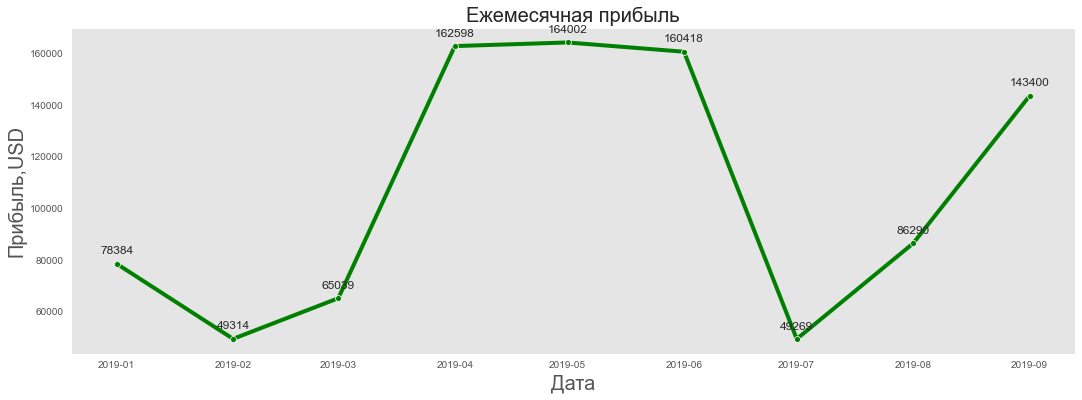

In [207]:
plt.subplots(figsize = (18,6))
sns.lineplot(x='date', y='profit', data = df_m6,marker='o',linewidth=4,color='green')
# Добавляем текстовую подпись над каждой точкой
for index, row in df_m6.iterrows():
    plt.annotate(f"{int(row['profit'])}", (row['date'], row['profit']), xytext=(0, 10),
                 textcoords='offset points', ha='center', fontsize=12)
plt.title('Ежемесячная прибыль',fontsize=20)
plt.ylabel('Прибыль,USD',fontsize=20)
plt.xlabel('Дата',fontsize=20)
plt.grid()
plt.show()

Пик по общей прибыли был достигнут и составил в :

 апреле 162598.23 USD
    
 мае   164002.76 USD

 июне   60418.97 USD

#### Ежемесячная прибыль по брендам

In [208]:
df_m7 =df_merc.pivot_table(index='date', columns='brand',
                             values='profit', aggfunc='sum')
df_m7

brand,Audi,Porsche,Volkswagen
date,,,
2019-01-01,20697.72,10564.89,47121.53
2019-02-01,25761.17,23553.64,NaN
2019-03-01,17102.31,8800.22,39137.18
2019-04-01,12548.49,15438.55,134611.19
2019-05-01,9619.56,29496.51,124886.69
2019-06-01,25492.19,29210.39,105716.39
2019-07-01,13369.24,34868.93,1031.23
2019-08-01,34032.54,19676.81,32581.27
2019-09-01,31128.99,24811.59,87459.61


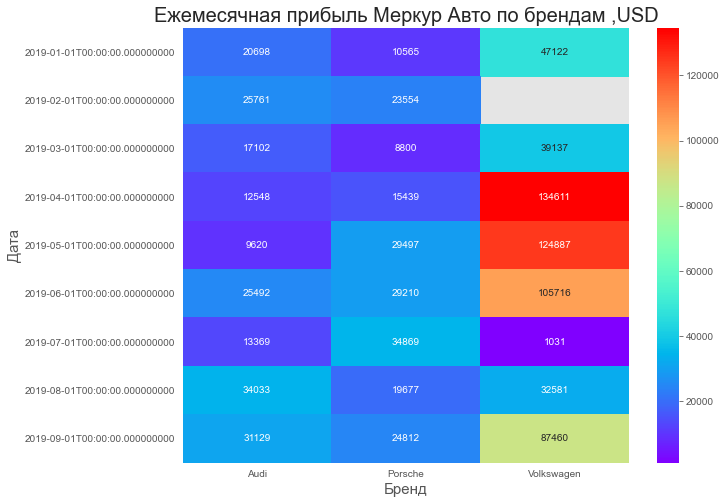

In [209]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_m7, annot=True, fmt=".0f", cmap="rainbow")
plt.title("Ежемесячная прибыль Меркур Авто по брендам ,USD",fontsize=20)
plt.xlabel("Бренд",fontsize=15)
plt.ylabel("Дата",fontsize=15)
plt.show()

Максимальная ежемесячная прибыль в разрезе по брендам наблюдалась у Volkswagen в апреле - мае 2019 г.Они и повлияли на прибыль компании.Вероятные проблемы с Volkswagen привели к падению общей прибыли.

## Рынок


### Емкость рынка

In [210]:
print('Емкость рынка,USD:',df['sale'].sum())

Емкость рынка,USD: 1025957075.99


In [211]:
print('Емкость рынка,шт авто:',df['quantity'].sum())

Емкость рынка,шт авто: 40738.0


### Емкость сегментов рынка (по маркам и типам авто)

In [212]:
df_s =df.pivot_table(index='segment', columns='brand',
                             values='sale', aggfunc='sum')
df_s

brand,ANKAI,Audi,BMW,Cadillac,Chevrolet,Daewoo,Ford,GAZ,Hino,Hyundai,Hyundai Truck & Bus,Infiniti,Isuzu,Iveco,Jac,Kia,Lada,Land Rover,Lexus,Lifan,MAN,Mercedes-Benz,Mercedes-Benz Trucks,Mini,Mitsubishi,Nissan,Peugeot,Porsche,Ravon,Renault,Rolls Royce,Scania,Skoda,SsangYong,Subaru,Suzuki,Toyota,UAZ,Volkswagen,Volvo,МАЗ
segment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Внедорожники,0.0,2498771.66,16835842.73,1990142.8,9572660.39,0.00,1170934.38,0.00,0.00,7.845524e+07,0.00,5640956.34,0.00,0.00,12820896.64,23805300.0,20961000.00,91915.49,79450700.39,4425988.75,0.00,3786852.36,0.00,353559.12,13121761.79,30902961.31,56915.15,3979421.94,0.00,6128625.74,0.00,0.00,2120000.00,215420.51,16977080.44,71727.19,2.188277e+08,5007310.36,3176813.90,1160721.77,0.0
Коммерческие автомобили,5413492.0,0.00,0.00,0.0,0.00,9229619.16,294258.14,40420595.18,2514285.66,0.000000e+00,8995359.52,0.00,0.00,6892029.64,862325.98,0.0,270000.00,0.00,0.00,0.00,82632.41,0.00,5028017.78,0.00,0.00,0.00,69541.08,0.00,0.00,0.00,0.00,1042108.25,0.00,0.00,0.00,0.00,0.000000e+00,9662375.02,34694.49,0.00,326858.3
Легковые автомобили,0.0,3826300.90,6477252.27,0.0,1040600.00,0.00,1736833.34,0.00,0.00,4.603241e+07,0.00,634400.00,0.00,0.00,0.00,12945600.0,72639615.45,0.00,3834286.68,3513021.76,0.00,1302492.91,0.00,69859.96,0.00,6085221.69,1555442.38,2567962.38,17149090.51,2580405.10,498787.51,0.00,10369872.75,0.00,334473.01,0.00,1.385840e+08,0.00,7650777.98,331634.39,0.0
Минивэны,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,3.595442e+05,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,128400.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.531590e+06,0.00,305646.42,0.00,0.0
Пикапы,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.00,0.00,773320.78,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.493188e+07,1137966.35,282967.58,0.00,0.0


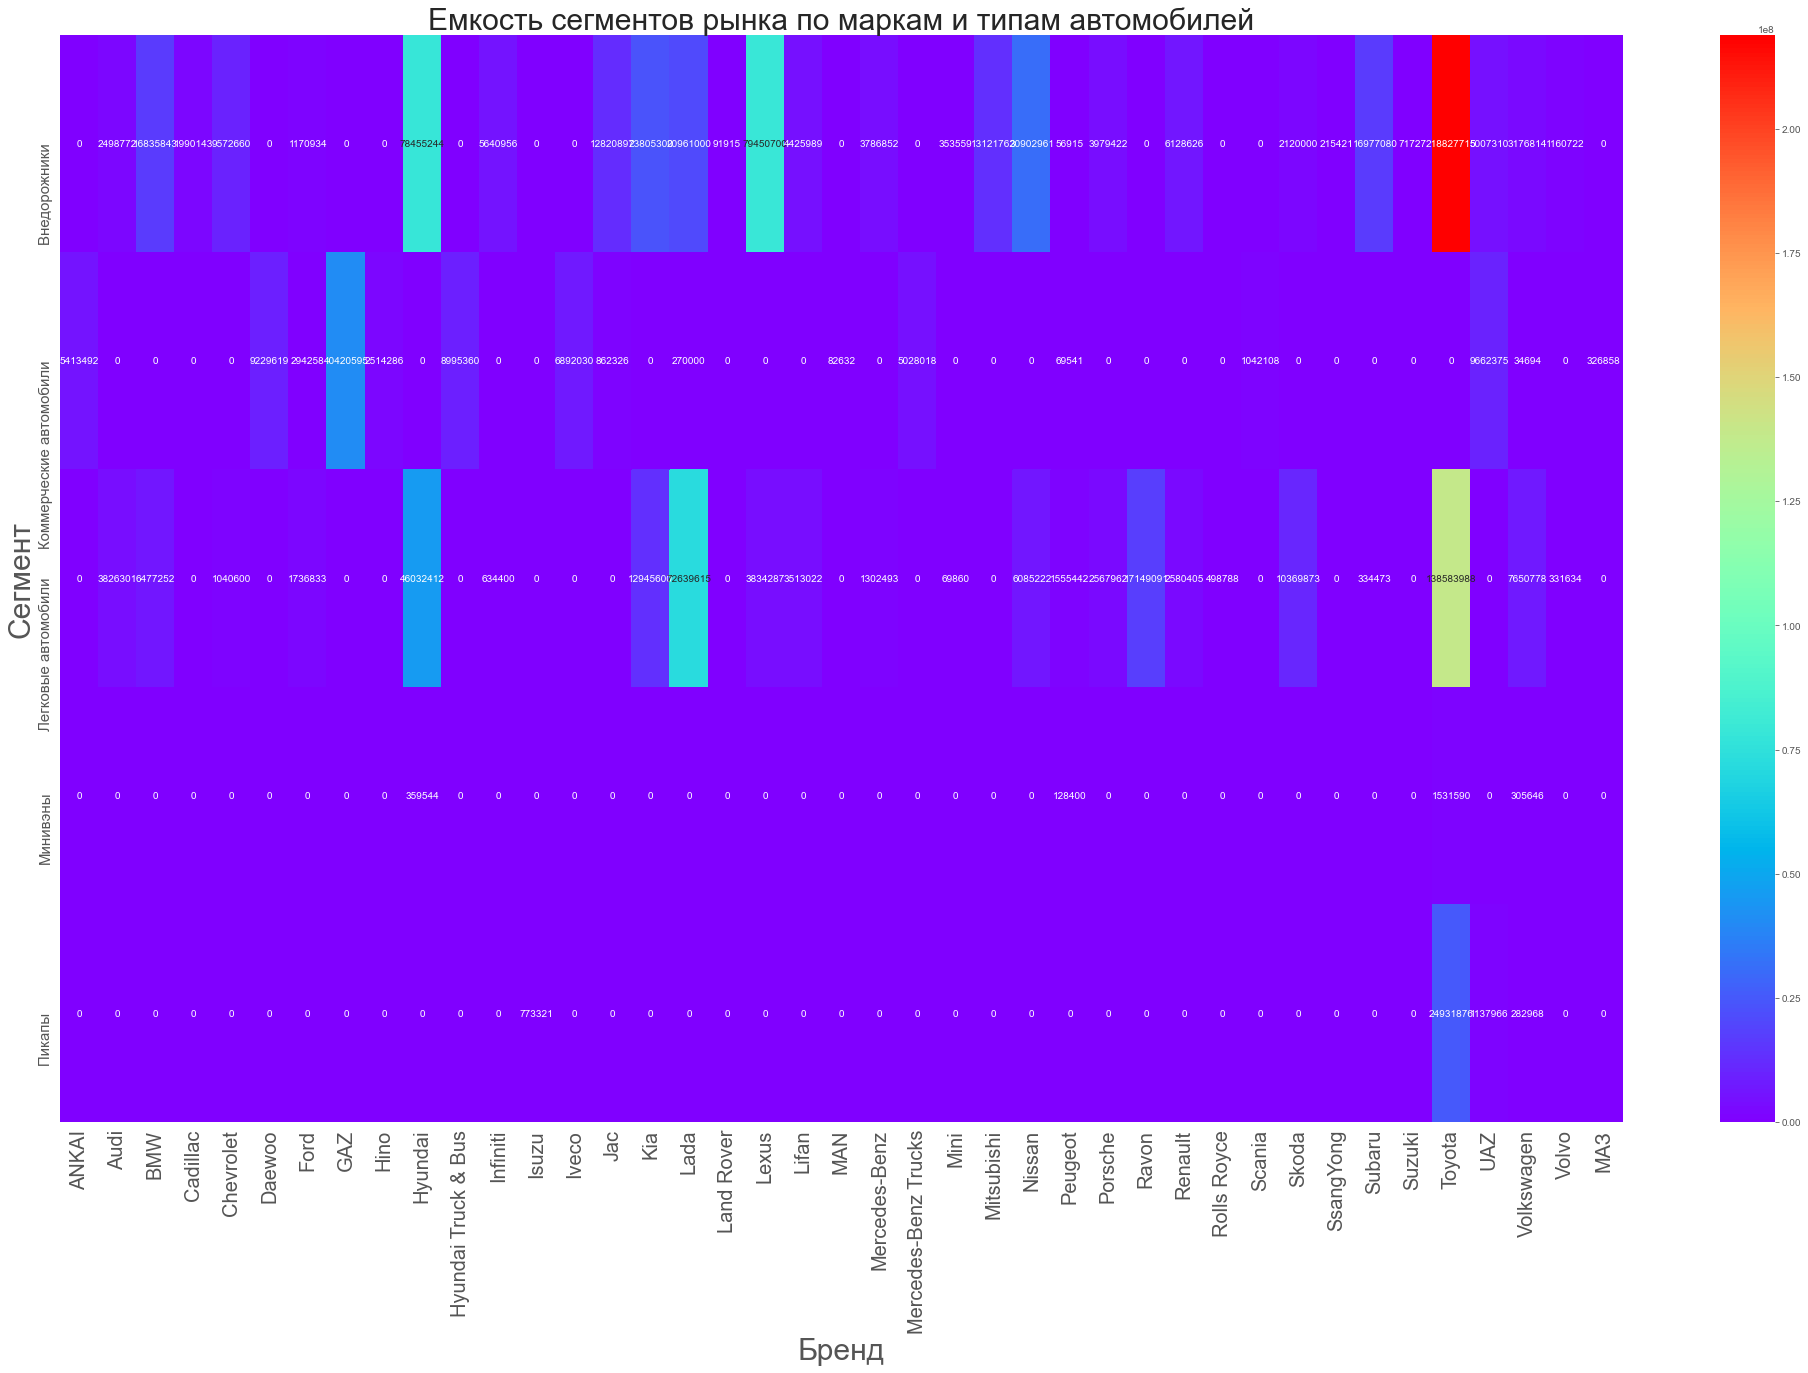

In [213]:
plt.figure(figsize=(35,20))
sns.heatmap(df_s, annot=True, fmt=".0f", cmap="rainbow")
plt.title("Емкость сегментов рынка по маркам и типам автомобилей",fontsize=30)
plt.xlabel("Бренд",fontsize=30)
plt.ylabel("Сегмент",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15,rotation=90)
plt.show()

Наиболее продаваемы  в Казахстане легковые автомобили и внедорожники в сочетании с брендом Toyota

### Продажи Меркур Авто по сегментам

Посмотрим, в каких сегментах продает Меркур Авто

In [214]:
df_m8 =df_merc.pivot_table(index='segment', columns='brand',
                             values='sale', aggfunc='sum')
df_m8

brand,Audi,Porsche,Volkswagen
segment,,,
Внедорожники,2498771.66,3979421.94,3176813.90
Коммерческие автомобили,0.00,0.00,34694.49
Легковые автомобили,3826300.90,2567962.38,7650777.98
Минивэны,0.00,0.00,305646.42
Пикапы,0.00,0.00,282967.58


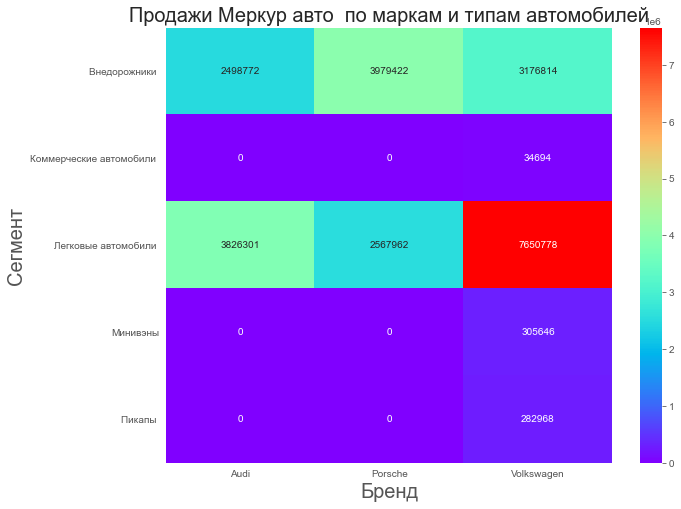

In [215]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_m8, annot=True, fmt=".0f", cmap="rainbow")
plt.title("Продажи Меркур авто  по маркам и типам автомобилей",fontsize=20)
plt.xlabel("Бренд",fontsize=20)
plt.ylabel("Сегмент",fontsize=20)
plt.show()

Volkswagen представлен во всех сегментах.А Audi и Porsche только в сегментах Коммерческих и легковых автомобилей.

## Доля рынка


### Посчитать общую долю рынка дилера: в количественном и стоимостном выражении

In [216]:
df_merc['sale'].sum()

24323357.25

In [217]:
print('Доля рынка Меркур Авто по сумме продаж %:',(df_merc['sale'].sum()/df['sale'].sum()*100).round(2))

Доля рынка Меркур Авто по сумме продаж %: 2.37


In [218]:
df_merc['quantity'].sum()

723.0

In [219]:
print('Доля рынка Меркур Авто по числу проданых авто %:',(df_merc['quantity'].sum()/df['quantity'].sum()*100).round(2))

Доля рынка Меркур Авто по числу проданых авто %: 1.77


### Посчитать долю рынка дилера по маркам

In [220]:
df.query('brand=="Audi"')['sale'].sum()

6325072.56

In [221]:
df_merc.query('brand=="Audi"')['sale'].sum()

6325072.56

In [222]:
df.groupby('brand',as_index=False)['sale'].agg('sum')\
.sort_values(by='sale', ascending=False).reset_index(drop=True)

,brand,sale
0,Toyota,3.838752e+08
1,Hyundai,1.248472e+08
2,Lada,9.387062e+07
3,Lexus,8.328499e+07
4,GAZ,4.042060e+07
5,Nissan,3.698818e+07
6,Kia,3.675090e+07
7,BMW,2.331310e+07
8,Subaru,1.731155e+07
9,Ravon,1.714909e+07


In [223]:
df.query('brand=="Porsche"')['sale'].sum()

6547384.32

In [224]:
df_merc.query('brand=="Porsche"')['sale'].sum()

6547384.32

In [225]:
df.query('brand=="Volkswagen"')['sale'].sum()

11450900.370000001

In [226]:
df_merc.query('brand=="Volkswagen"')['sale'].sum()

11450900.370000001

Таким образом из расчетов видно что Audi,Porsche и Volkswagen продает только Меркур Авто.Можно сказать, что они занимают 100% долю рынка по маркам.


### Посчитать долю рынка дилера по типам машин

In [227]:
df_seg = df.groupby('segment',as_index=False)['sale'].agg('sum')\
.sort_values(by='sale', ascending=False).reset_index(drop=True)
df_seg

,segment,sale
0,Внедорожники,5.636072e+08
1,Легковые автомобили,3.417603e+08
2,Коммерческие автомобили,9.113819e+07
3,Пикапы,2.712613e+07
4,Минивэны,2.325181e+06


In [228]:
df_seg_m = df_merc.groupby('segment',as_index=False)['sale'].agg('sum')\
.sort_values(by='sale', ascending=False).reset_index(drop=True)
df_seg_m['% внутри центра'] = (df_seg_m['sale']/df_seg_m['sale'].sum() * 100).round(2)
df_seg_m['% ое рынка'] = (df_seg_m['sale']/df_seg['sale'].sum() * 100).round(2)
df_seg_m

,segment,sale,% внутри центра,% ое рынка
0,Легковые автомобили,14045041.26,57.74,1.37
1,Внедорожники,9655007.50,39.69,0.94
2,Минивэны,305646.42,1.26,0.03
3,Пикапы,282967.58,1.16,0.03
4,Коммерческие автомобили,34694.49,0.14,0.00


Среди продаваемых автомобилей дилером:

57.74% - Легковые автомобили(что составляет 1.37%  от всех продаж на рынке в этом сегменте)

39.69% -  Внедорожники(0.94% от  от всех продаж на рынке в этом сегменте)

В остальных сегментах доля Меркур Авто незначительна.




## Конкуренты


### Лидеры рынка

Посмотрим на лидеров рынка

In [229]:

df_c_top

,company,sale,quantity,%sale,%quantity
0,Toyota Motor Kazakhstan,467160156.0,10425.0,45.534,25.59
1,БИПЭК АВТО,151241688.0,12510.0,14.742,30.71
2,Astana Motors,128815367.0,5779.0,12.556,14.19
3,Вираж,58116987.0,3358.0,5.665,8.24
4,Nissan Manufacturing RUS,43263539.0,1739.0,4.217,4.27
5,Allur Auto,28064063.0,1304.0,2.735,3.20
6,Mercur Auto,24323357.0,723.0,2.371,1.77
7,Автоцентр-Бавария,24235302.0,388.0,2.362,0.95
8,Subaru Kazakhstan,17311553.0,520.0,1.687,1.28
9,УзАвто-Казахстан,17149091.0,1727.0,1.672,4.24


По объему продаж выделяется первая тройка:Toyota Motor Kazakhstan,БИПЭК АВТО,Astana Motors.
Mercur Auto находится на 7 месте.Ближайшими конкурентами можно назвать: Вираж,Nissan Manufacturing RUS,Allur Auto, Автоцентр-Бавария

### Ближайшие конкуренты дилера (тот же регион, та же марка, тот же класс машин)

Посмотрим в какие регионы продает дилер.

In [230]:
df_merc['region'].unique()

array(['Алматы', 'Костанай', 'Атырау', 'Астана', 'Караганда', 'Уральск'],
      dtype=object)

In [231]:
list_r = list(df_merc['region'].unique())
list_r

['Алматы', 'Костанай', 'Атырау', 'Астана', 'Караганда', 'Уральск']

И какие классы представлены

In [232]:
list_c = list(df_merc['class'].unique())
list_c

['C класс ',
 'D класс ',
 'Спортивные автомобили ',
 'E класс ',
 'F класс ',
 'Среднеразмерные SUV ',
 'Стандартные SUV ',
 'Компактные SUV ',
 'Pick-ups',
 'Полноразмерный Минивэн ',
 'B класс ',
 'Микроавтобусы ']

Прсмотрим на конкурентов с учетом этих регионов и классов машин

In [233]:
df[df['region'].isin(list_r) & df['class'].isin(list_c)]['company'].value_counts()

Toyota Motor Kazakhstan     7123
Astana Motors               3446
БИПЭК АВТО                  1368
УзАвто-Казахстан             851
Allur Auto                   744
Nissan Manufacturing RUS     619
Mercur Auto                  597
Renault Россия               508
Subaru Kazakhstan            351
Лифан Моторс Рус             304
ММС Рус                      289
Вираж                        232
Каспиан Моторс               179
Автоцентр-Бавария            172
Autokapital                   56
СВС                           23
Scandinavian Motors           11
Eurasia Motor Premium          7
Jaguar Land Rover              2
Алматы АТО                     1
Sivi Finance Consulting        1
Name: company, dtype: int64

In [234]:
df_con =df[df['region'].isin(list_r) & df['class'].isin(list_c)]
df_con.head()

,company,brand,model,year_of_release,country,fuel_type,engine_volume,transmission,drive_type,region,customer_type,quantity,price,sale,area,segment,class,date,volume_cat
1,Mercur Auto,Audi,A3,2018,DEU,PET,1.4,автомат,FWD,Алматы,Физ. Лицо,1.0,30581.00,30581.00,г.Алматы,Легковые автомобили,C класс,2019-05-01,small
2,Mercur Auto,Audi,A3,2018,DEU,PET,1.4,автомат,FWD,Алматы,Физ. Лицо,1.0,35087.72,35087.72,г.Алматы,Легковые автомобили,C класс,2019-06-01,small
3,Mercur Auto,Audi,A3,2017,DEU,PET,1.4,автомат,FWD,Алматы,Физ. Лицо,1.0,26608.23,26608.23,г.Алматы,Легковые автомобили,C класс,2019-07-01,small
4,Mercur Auto,Audi,A4,2017,DEU,PET,2.0,автомат,4WD,Алматы,Юр. Лицо,1.0,48343.98,48343.98,г.Алматы,Легковые автомобили,D класс,2019-07-01,average
5,Mercur Auto,Audi,A5,2017,DEU,PET,2.0,автомат,4WD,Алматы,Юр. Лицо,1.0,52760.74,52760.74,г.Алматы,Легковые автомобили,Спортивные автомобили,2019-06-01,average


Посмотрим на конкурентов с учетом их доли продаж в регионах и сегментах связанных с Меркур Авто

In [235]:
df_c1 = df_con.groupby('company',as_index=False)['sale','quantity'].agg('sum')\
.sort_values(by='sale', ascending=False).reset_index(drop=True)
df_c1['sale'] = round(df_c1['sale'], 2)
df_c1['%sale'] = (df_c1['sale']/df_c1['sale'].sum() * 100).round(3)
df_c1['%quantity'] = (df_c1['quantity']/df_c1['quantity'].sum() * 100).round(2)
df_c1

,company,sale,quantity,%sale,%quantity
0,Toyota Motor Kazakhstan,2.685789e+08,7123.0,48.157,32.59
1,Astana Motors,7.672305e+07,3446.0,13.757,15.76
2,БИПЭК АВТО,7.206370e+07,5484.0,12.921,25.09
3,Nissan Manufacturing RUS,2.695944e+07,1099.0,4.834,5.03
4,Mercur Auto,2.432336e+07,723.0,4.361,3.31
5,Автоцентр-Бавария,2.152472e+07,345.0,3.859,1.58
6,ММС Рус,1.227480e+07,336.0,2.201,1.54
7,Subaru Kazakhstan,1.170388e+07,351.0,2.099,1.61
8,Allur Auto,1.059013e+07,744.0,1.899,3.40
9,УзАвто-Казахстан,8.567930e+06,851.0,1.536,3.89


Ближайшими конкурентами Mercur Auto являются:
Nissan Manufacturing RUS

Автоцентр-Бавария

ММС Рус

Subaru Kazakhstan

Allur Auto

# Выводы и рекомендации

**В результате анализа для  Меркур Авто расчитаны следующие показатели и  сделаны следующие выводы:**

- Общая сумма продажи,USD: 24323357.25
    
- Средняя стоимость продажи за период,USD: 40742.64
    
- Средняя стоимость автомобиля за период,USD: 36680.71
    
- Общая прибыль за период,USD: 958718.83
    
    
Дилер торгует тремя марками:Volkswagen,Audi,Porsche
    
- 47.08% продаж приходится на Volkswagen, остальное почти поровну на 2 другие марки.

- Однако прибыль 59.72% поступает от Volkswagen и оставшиеся делят такзе 2 другие марки.  


- Ежемесячные продажи и ежемесячная средняя стоимость продажи:

По графикам явно видно,что падали общие продажи в январе-феврале.Но при этом в феврале была высокая сумма средней продажи(74719 USD).Также например, в июне общие продажи достигли максимума(3937746.58USD),а при этом средняя сумма продажи относительно невысока( 46326.43 USD).Это можно обяснить тем, что в разные месяцы совершалось разное число продаж, среди них могли быть как оптовые ,так и розничные продажи.А также могло продаваться больше/ меньше недорогих автомобилей.Посмотрим на продажи в разрезе брендов.

- Ежемесячная стоимость продажи в разбивке по маркам:

В таблице видно, что в феврале не было у Volkswagen.Возможно были перебои с поставками.При этом выросли продажи других марок.

- Ежемесячная прибыль
Пик по общей прибыли был достигнут и составил в :

апреле 162598.23 USD

мае 164002.76 USD

июне 60418.97 USD

- Максимальная ежемесячная прибыль в разрезе по брендам наблюдалась у Volkswagen в апреле - мае 2019 г.Они и повлияли на прибыль компании.Вероятные проблемы с Volkswagen привели к падению общей прибыли.

- Емкость рынка  ,USD: 1025957075.99;Емкость рынка,шт авто: 40738

- Наиболее продаваемы в Казахстане легковые автомобили и внедорожники в сочетании с брендом Toyota

- У Меркур Авто : Volkswagen представлен во всех сегментах.А Audi и Porsche только в сегментах Коммерческих и легковых автомобилей.

- Доля рынка Меркур Авто по сумме продаж %: 2.37

- Доля рынка Меркур Авто по числу проданых авто %: 1.77

-  Audi,Porsche и Volkswagen продает только Меркур Авто.Можно сказать, что они занимают 100% долю рынка по маркам.

- Среди продаваемых автомобилей дилером:

57.74% - Легковые автомобили(что составляет 1.37% от всех продаж на рынке в этом сегменте)

39.69% - Внедорожники(0.94% от от всех продаж на рынке в этом сегменте)

В остальных сегментах доля Меркур Авто незначительна.

- По общему объему продаж выделяется первая тройка:Toyota Motor Kazakhstan,БИПЭК АВТО,Astana Motors.(это лидеры) Mercur Auto находится на 7 месте.
- Продажи идут в городах:'Алматы', 'Костанай', 'Атырау', 'Астана', 'Караганда', 'Уральск'
  и в основном сегменте:
  C класс ',
 'D класс ',
 'Спортивные автомобили ',
 'E класс ',
 'F класс ',
 'Среднеразмерные SUV ',
 'Стандартные SUV ',
 'Компактные SUV ',
 'Pick-ups',
 'Полноразмерный Минивэн ',
 'B класс ',
 'Микроавтобусы '

- Ближайшими конкурентами Mercur Auto являются:

Nissan Manufacturing RUS

Автоцентр-Бавария

ММС Рус

Subaru Kazakhstan

Allur Auto

**Рекомендации:**

- С точки зрения предлагаемых марок- у Меркур Авто нет конкурентов.Это неплохо.Они занимают свою нишу, что обеспечивает некую стабильность.Однако тут могут таиться и проблемы:при форс-мажоре (перебои с поставками) может возникнуть вакуум в конкретном сегменте- и как результат потеря прибыли.Возможно стоит рассмотреть другие марки в плюс к существующим.

- Может быть стоит расширить географию продаж, проанализировать ближайших конкурентов.

- Стоит обратить внимание на конкурирующие модели легковых автомобилей и внедорожников в недорогой комлектации.

